In [37]:
import pandas as pd
from datetime import datetime, timedelta
import numpy
from gurobipy import *


In [2]:
import numpy as np
import pandas as pd

In [3]:
lower_data = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_lower")
upper_data = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_upper")

In [4]:
age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79', 'age_group_80_plus']
old_age_groups = ['age_group_50_59', 'age_group_60_69', 'age_group_70_79', 'age_group_80_plus']
econ_activities = ['transport', 'leisure', 'other']
cont = [ 'S', 'E', 'I', 'R', 'N', 'Ia', 'Ips', \
           'Ims', 'Iss', 'Rq', 'H', 'ICU', 'D' ]

In [5]:
data = pd.read_csv("donnees-hospitalieres-classe-age-covid19-2020-10-28-19h00.csv", sep=";")
data.head()

reg  cl_age90        jour  hosp  rea  rad  dc
0    1         0  2020-03-18     0    0    0   0
1    1         9  2020-03-18     0    0    0   0
2    1        19  2020-03-18     0    0    0   0
3    1        29  2020-03-18     0    0    0   0
4    1        39  2020-03-18     0    0    0   0

In [6]:
google = pd.read_csv("2020_FR_Region_Mobility_Report.csv")
google = google[google['sub_region_1']=="Île-de-France"]
google = google[pd.isnull(google['sub_region_2'])]

In [7]:
initial_work = ((google["workplaces_percent_change_from_baseline"]+100)/100).values
google_days = [datetime.strptime(google["date"].values[i], '%Y-%m-%d').weekday() for i in range(len(google["date"]))]
new_work = []
for i in range(len(initial_work)):
    if google_days[i]<=4:
        new_work.append(initial_work[i])
    elif google_days[i]==5:
        numbers_for_mean = []
        for k in range(i-5,i):
            if k>=0 and k<len(initial_work):
                numbers_for_mean.append(initial_work[k])
        for k in range(i+2,i+7):
            if k>=0 and k<len(initial_work):
                numbers_for_mean.append(initial_work[k])
        new_work.append(np.mean(numbers_for_mean))
    elif google_days[i]==6:
        numbers_for_mean = []
        for k in range(i-6,i-1):
            if k>=0 and k<len(initial_work):
                numbers_for_mean.append(initial_work[k])
        for k in range(i+1,i+6):
            if k>=0 and k<len(initial_work):
                numbers_for_mean.append(initial_work[k])
        new_work.append(np.mean(numbers_for_mean))


In [8]:
google['work'] = new_work
google['transport'] = (google["transit_stations_percent_change_from_baseline"]+100)/100
google['other'] = 0.33*(google["retail_and_recreation_percent_change_from_baseline"]+100)/100+0.67*(google["grocery_and_pharmacy_percent_change_from_baseline"]+100)/100
google['leisure'] = 0.33*(google["parks_percent_change_from_baseline"]+100)/100+0.67*(google["retail_and_recreation_percent_change_from_baseline"]+100)/100
google = google.reset_index()
google.to_csv('smoothed.csv')



In [39]:
google

index country_region_code country_region   sub_region_1 sub_region_2  \
0    13858                  FR         France  Île-de-France          NaN   
1    13859                  FR         France  Île-de-France          NaN   
2    13860                  FR         France  Île-de-France          NaN   
3    13861                  FR         France  Île-de-France          NaN   
4    13862                  FR         France  Île-de-France          NaN   
..     ...                 ...            ...            ...          ...   
247  14105                  FR         France  Île-de-France          NaN   
248  14106                  FR         France  Île-de-France          NaN   
249  14107                  FR         France  Île-de-France          NaN   
250  14108                  FR         France  Île-de-France          NaN   
251  14109                  FR         France  Île-de-France          NaN   

     metro_area iso_3166_2_code  census_fips_code        date  \
0           NaN          FR-IDF               NaN  2020-02-15   
1           NaN          FR-IDF               NaN  2020-02-16   
2           NaN          FR-IDF               NaN  2020-02-17   
3           NaN          FR-IDF               NaN  2020-02-18   
4           NaN          FR-IDF               NaN  2020-02-19   
..          ...             ...               ...         ...   
247         NaN          FR-IDF               NaN  2020-10-19   
248         NaN          FR-IDF               NaN  2020-10-20   
249         NaN          FR-IDF               NaN  2020-10-21   
250         NaN          FR-IDF               NaN  2020-10-22   
251         NaN          FR-IDF               NaN  2020-10-23   

     retail_and_recreation_percent_change_from_baseline  \
0                                                -12.0    
1                                                 -6.0    
2                                                 -2.0    
3                                                 -1.0    
4                                                 -7.0    
..                                                 ...    
247                                              -28.0    
248                                              -33.0    
249                                              -32.0    
250                                              -29.0    
251                                              -34.0    

     grocery_and_pharmacy_percent_change_from_baseline  \
0                                                -10.0   
1                                                 -6.0   
2                                                 -3.0   
3                                                 -2.0   
4                                                 -9.0   
..                                                 ...   
247                                               -7.0   
248                                              -11.0   
249                                               -9.0   
250                                               -9.0   
251                                               -8.0   

     parks_percent_change_from_baseline  \
0                                   5.0   
1                                  -8.0   
2                                  11.0   
3                                  15.0   
4                                  -5.0   
..                                  ...   
247                               -13.0   
248                               -41.0   
249                               -21.0   
250                               -15.0   
251                               -26.0   

     transit_stations_percent_change_from_baseline  \
0                                              4.0   
1                                              4.0   
2                                            -11.0   
3                                             -8.0   
4                                            -10.0   
..                                             ...  

In [9]:
# Extract days 
data = data[data['jour']<='2020-10-21']
days = data[data['reg']==11][data['cl_age90']==0].jour.values

/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data

reg  cl_age90        jour  hosp  rea  rad  dc
0        1         0  2020-03-18     0    0    0   0
1        1         9  2020-03-18     0    0    0   0
2        1        19  2020-03-18     0    0    0   0
3        1        29  2020-03-18     0    0    0   0
4        1        39  2020-03-18     0    0    0   0
...    ...       ...         ...   ...  ...  ...  ..
42961   94        59  2020-10-21     7    0   48   2
42962   94        69  2020-10-21     8    3   52   4
42963   94        79  2020-10-21    13    5   77  17
42964   94        89  2020-10-21    11    0   47  31
42965   94        90  2020-10-21     3    0   25  14

[42966 rows x 7 columns]

In [11]:
beds_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].hosp.values for i in range(0,9)
}
beds_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].hosp.values
beds_real['total']=data[data['reg']==11][data['cl_age90']==0].hosp.values

icus_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].rea.values for i in range(0,9)
}
icus_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].rea.values
icus_real['total']=data[data['reg']==11][data['cl_age90']==0].rea.values

deaths_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].dc.values for i in range(0,9)
}
deaths_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].dc.values
deaths_real['total']=data[data['reg']==11][data['cl_age90']==0].dc.values


/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/sergioacamelogomez/opt/anaconda3/lib/pyth

In [30]:
import yaml
from inspect import getsourcefile
import os.path
import sys
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import argparse
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parentdir = os.path.dirname(current_dir)
sys.path.insert(0,parentdir) 
sys.path.insert(0, parentdir+"/heuristics")
sys.path.insert(0, parentdir+"/heuristics/LP-Models")
sys.path.insert(0, parentdir+"/fast_gradient")


from fast_group import FastDynamicalModel
from aux import *

%matplotlib inline

In [13]:
start_smooth = datetime.strptime("2020-09-01", '%Y-%m-%d')
end_smooth = datetime.strptime("2020-10-01", '%Y-%m-%d')
for ag in beds_real:
    new_series = []
    for i in range(len(beds_real[ag])):
        day = datetime.strptime(days[i], '%Y-%m-%d')
        lower = (day-start_smooth).days
        upper = (end_smooth-day).days
        if lower>=0 and upper>=0:
            n_days_before = min(lower,3)
            n_days_after = min(upper,3)
            avg_value = np.mean(beds_real[ag][(i-n_days_before):(i+1+n_days_after)])
            new_series.append(avg_value)
        else:
            new_series.append(beds_real[ag][i])
    beds_real[ag] = np.array(new_series)
        


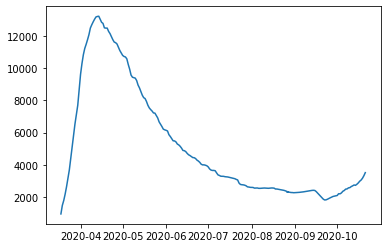

In [14]:

plt.figure(1)
plt.plot([datetime.strptime(d, '%Y-%m-%d') for d in days],beds_real["total"])


In [15]:
mult_deaths = np.sum(data[data['reg']==11][data['cl_age90']==0].hosp.values)/np.sum(data[data['reg']==11][data['cl_age90']==0].dc.values)
print(mult_deaths)
mult_icus = np.sum(data[data['reg']==11][data['cl_age90']==0].hosp.values)/np.sum(data[data['reg']==11][data['cl_age90']==0].rea.values)
print(mult_icus)


0.7791072263244828
7.194862933913178


/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
region = "Ile-de-France"

In [17]:
# Read group parameters
with open("../parameters/"+region+".yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    universe_params = yaml.load(file, Loader=yaml.FullLoader)
    
# Read initialization
with open("../initialization/patient_zero.yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    original_initialization = yaml.load(file, Loader=yaml.FullLoader)

# Read econ parameters
with open("../parameters/econ.yaml") as file:
    econ_params = yaml.load(file, Loader=yaml.FullLoader)

experiment_params = {
    'delta_schooling':0.5,
    'xi':0,
    'icus':3000,
}

In [18]:
date_1 = datetime.strptime("2020-03-17", '%Y-%m-%d')
date_2 = datetime.strptime("2020-05-11", '%Y-%m-%d')
date_3 = datetime.strptime("2020-06-01", '%Y-%m-%d')
date_4 = datetime.strptime("2020-07-01", '%Y-%m-%d')
date_5 = datetime.strptime("2020-09-01", '%Y-%m-%d')
final_date = datetime.strptime("2020-10-21", '%Y-%m-%d')

vacation_start = date_4
vacation_end = date_5
days_vacation_start = (vacation_start - date_1).days
days_vacation_end = (vacation_end - date_1).days

first_day_google = datetime.strptime("2020-02-15", '%Y-%m-%d')
days_between_google = (date_1-first_day_google).days

In [19]:
(final_date-date_1).days+140

358

In [20]:
from copy import deepcopy

In [21]:
original_beta = universe_params['seir-groups']["age_group_0_9"]["parameters"]["beta"]
original_beta_vacation = original_beta
#original_beta_vacation = universe_params['seir-groups']["age_group_0_9"]["parameters"]["beta_vacation"]
t_days_beta = 730

for ag in universe_params['seir-groups']:
    universe_params['seir-groups'][ag]["parameters"]["beta"] = (
        [(original_beta if (t<days_vacation_start or t>= days_vacation_end) else original_beta_vacation) for t in range(t_days_beta) ]
    )


In [22]:
# Create model
mixing_method = {}
dynModel = FastDynamicalModel(universe_params, econ_params, experiment_params, 1, mixing_method, 1e9, 0, 0)


In [23]:
params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params", index_col = 0)
initial_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_lower", index_col = 0)
lower_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_upper", index_col = 0)
upper_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

In [24]:
# Construct the windows for the parameters to move
windows = {}
for p in initial_params:
    windows[p] = (
        np.min(upper_params[p]/initial_params[p]),
        np.max(lower_params[p]/initial_params[p]),
    )
    
windows['beta_mixing'] = (0.1,2.0)
windows['alpha_mixing'] = (0.1,2.0)
windows['gamma_mixing'] = (0.5,2.0)
windows['work_l'] = (0.2,0.3)
windows['other_l'] = (0,0.1)
windows['school_l'] = (0,0.1)
windows['leisure_l'] = (0,0.1)
windows['transport_l'] = (0.2,0.3)
windows['transmission'] = (0.5,2.0)

In [25]:
# Generate samples
np.random.seed(0)
n_samples = 10
samples = 1+np.random.randn(n_samples,(final_date-date_1).days+150, 5)*0.05/2/np.sqrt(3)

In [26]:
import copy
import math
import matplotlib.dates as mdates
best_v = 0
best_error = float('inf')
validation_date = datetime.strptime("2020-10-21", '%Y-%m-%d')

def error(v):
    
    vector_upper_model_data = []
    vector_errors = []
    
    for n_sample in range(n_samples):
        days_ahead = v[0]
        alpha_mixing_home = v[1]
        alpha_mixing_work = v[1]
        alpha_mixing_transport = v[1]
        alpha_mixing_school = v[1]
        alpha_mixing_other = v[1]
        alpha_mixing_leisure = v[1]
        
        mix_1 = v[3]
        mix_2 = v[4]
        
        alphas_d = {
            'work':alphrrereea_mixing_work,
            'transport':alpha_mixing_transport,
            'school':alpha_mixing_school,
            'other':alpha_mixing_other,
            'leisure':alpha_mixing_leisure,
            'home':alpha_mixing_home,
        }

        gamma_mixing_before = 1.0
        gamma_mixing_after = 1.0


        upper_bound_home = 1.0
        upper_bound_leisure = 1.0
        upper_bound_other = 1.0
        upper_bound_school = 1.0
        upper_bound_work = 1.0
        upper_bound_transport = 1.0

        school_lockdown = v[5]
        school_may = v[6]
        school_jun_jul_aug = v[7]
        school_sep_oct = v[8]

        beta_normal = original_beta
        beta_vacation = beta_normal*v[2]

        days_change_model = 0


        google['other'] = mix_1*(google["retail_and_recreation_percent_change_from_baseline"]+100)/100+(1-mix_1)*(google["grocery_and_pharmacy_percent_change_from_baseline"]+100)/100
        google['leisure'] = mix_2*(google["parks_percent_change_from_baseline"]+100)/100+(1-mix_2)*(google["retail_and_recreation_percent_change_from_baseline"]+100)/100


        # Number of days
        days_before_date_1 = int(days_ahead)
        days_between_dates_1_2 = (date_2-date_1).days
        days_between_dates_2_3 = (date_3-date_2).days
        days_between_dates_3_4 = (date_4-date_3).days
        days_between_dates_4_5 = (date_5-date_4).days
        days_after_date_5 = (final_date-date_5).days
        total_days = days_before_date_1 + days_between_dates_1_2 + days_between_dates_2_3 + days_between_dates_3_4 + days_between_dates_4_5+ days_after_date_5
        days_denom = days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5


        # Some additional calculations
        validation_days = days_before_date_1 + (validation_date-date_1).days
        vacation_start_days = days_before_date_1 + (vacation_start-date_1).days
        vacation_end_days = days_before_date_1 + (vacation_end-date_1).days


        # Construct initialization
        initialization = copy.deepcopy(original_initialization)
        for i,group in enumerate(age_groups):
            if group == "age_group_40_49":
                initialization[group]["I"] = initialization[group]["I"] + 1
                initialization[group]["S"] = initialization[group]["S"] - 1
            initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]


        # Alphas
        a_before_google = {
            'home':upper_bound_home,
            'leisure':upper_bound_leisure,
            'other':upper_bound_other,
            'school':upper_bound_school,
            'transport':upper_bound_transport,
            'work':upper_bound_work
        }



        # Determine mixing method
        #     mixing_method_before = {
        #         "name":"mult",
        #         "param_alpha":alpha_mixing_before,
        #         "param_beta":alpha_mixing_before,
        #     }

        #     # Determine mixing method
        #     mixing_method_after = {
        #         "name":"mult",
        #         "param_alpha":alpha_mixing_after,
        #         "param_beta":alpha_mixing_after,
        #     }
        #dynModel.mixing_method = mixing_method_after




        # Calculate alphas
        alphas_vec = []
        for t in range(days_before_date_1-days_between_google):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = a_before_google
            alphas_vec.append(alphas)

        counter = 0
        for t in range(days_between_google):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':1.0,
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_1_2):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_lockdown*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_2_3):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_may*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_3_4):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_may*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_4_5):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_jun_jul_aug*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_after_date_5):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_sep_oct*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)
            counter += 1




        #     mixing_vec = []
        #     for t in range(int(vacation_start_days+days_change_model)):
        #         mixing_vec.append(mixing_method_before)
        #     for t in range(int(vacation_start_days+days_change_model),total_days):
        #         mixing_vec.append(mixing_method_after)




        # Calculate tests
        tests = np.zeros(len(age_groups))


        # Run model
        model_data_beds = {ag:[] for ag in age_groups+["total"]}
        model_data_icus = {ag:[] for ag in age_groups+["total"]}
        model_data_deaths = {ag:[] for ag in age_groups+["total"]}

        state = state_to_matrix(initialization)
        t_beds = 0
        t_icus = 0
        t_deaths = 0
        for i,ag in enumerate(age_groups):
            state_H = state[i,cont.index("H")]
            state_ICU = state[i,cont.index("ICU")]
            state_D = state[i,cont.index("D")]
            model_data_beds[ag].append(state_H)
            model_data_icus[ag].append(state_ICU)
            model_data_deaths[ag].append(state_D)
            t_beds+= state_H
            t_icus+= state_ICU
            t_deaths+= state_D
        model_data_beds["total"].append(t_beds)
        model_data_icus["total"].append(t_icus)
        model_data_deaths["total"].append(t_deaths)

        recalc_days = [0,
                     days_before_date_1,
                     days_before_date_1+days_between_dates_1_2,
                     days_before_date_1+days_between_dates_1_2+days_between_dates_2_3,
                     days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4,
                     days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5,
                    int(vacation_start_days)
                    ]

        dynModel.beta = np.zeros((len(age_groups),len(dynModel.groups[age_groups[0]].parameters["beta"])))
        for i in range(len(age_groups)):
            for j in range(len(dynModel.groups[age_groups[0]].parameters["beta"])):
                if j < int(vacation_start_days+days_change_model):
                    dynModel.beta[i,j] = beta_normal
                else:
                    dynModel.beta[i,j] = beta_vacation

        for t in range(total_days):
            current_date = date_1+timedelta(days=t-days_before_date_1)
            day_of_week = current_date.weekday()

            if t in recalc_days:
                update_contacts = True
            else:
                update_contacts = False

            if day_of_week <= 4:
                season = "old"
                dynModel.mixing_method = {
                    "name":"mult",
                    "param_alpha":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                    "param_beta":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                }
            else:
                season = "old"
                dynModel.mixing_method = {
                    "name":"mult",
                    "param_alpha":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                    "param_beta":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                }

            #dynModel.mixing_method = mixing_vec[t]

            state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), t, season, update_contacts=update_contacts)
            t_beds = 0
            t_icus = 0
            t_deaths = 0
            for i,ag in enumerate(age_groups):
                state_H = state[i,cont.index("H")]
                state_ICU = state[i,cont.index("ICU")]
                state_D = state[i,cont.index("D")]
                model_data_beds[ag].append(state_H)
                model_data_icus[ag].append(state_ICU)
                model_data_deaths[ag].append(state_D)
                t_beds+= state_H
                t_icus+= state_ICU
                t_deaths+= state_D
            #print(t_beds)
            model_data_beds["total"].append(t_beds)
            model_data_icus["total"].append(t_icus)
            model_data_deaths["total"].append(t_deaths)


        initial_date = date_1-timedelta(days=days_before_date_1)

        # Calculate the days of the model
        days_model = [initial_date+timedelta(days = t) for t in range(total_days + 1)]

        # Indices where to put the real data
        indices = [(datetime.strptime(d, '%Y-%m-%d') - initial_date).days for d in days]

        # Real data
        real_data_beds = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
        real_data_icus = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
        real_data_deaths = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}

        for k,ind in enumerate(indices):
            for ag in age_groups+["total"]:
                real_data_beds[ag][ind] = beds_real[ag][k]
                real_data_icus[ag][ind] = icus_real[ag][k]
                real_data_deaths[ag][ind] = deaths_real[ag][k]


        error_constant = 1.0
        error_beds = 0
        error_icus = 0
        error_deaths = 0
        error_beds_total = 0
        for ag in old_age_groups:
            error_beds += np.nanmean((np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag]))/np.array(real_data_beds[ag]))[0:validation_days-1])
            #error_beds += error_constant*np.nanmean((np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag]))/np.array(real_data_beds[ag]))[validation_days-1:validation_days])
            #error_icus += np.nanmean(np.abs(np.array(model_data_icus[ag])-np.array(real_data_icus[ag])))
            #error_deaths += np.nanmean(np.abs(np.array(model_data_deaths[ag])-np.array(real_data_deaths[ag])))
        error_beds_total += np.nanmean((np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"]))/np.array(real_data_beds["total"]))[0:validation_days-1])
        error_beds_total += error_constant*np.nanmean((np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"]))/np.array(real_data_beds["total"]))[validation_days-1:validation_days])
        #error_icus_total = np.nanmean(np.abs(np.array(model_data_icus["total"])-np.array(real_data_icus["total"])))
        #error_deaths_total = np.nanmean(np.abs(np.array(model_data_deaths["total"])-np.array(real_data_deaths["total"])))




        #diff = np.array(model_data_beds["total"])-np.array(real_data_beds["total"])
        #error_beds_above = np.nanmean([max(d,0) for d in diff])
        #error_beds_below = -np.nanmean([min(d,0) for d in diff])

        #cumm_beds_model = [sum([model_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(model_data_beds["total"]))]
        #cumm_beds_real = [sum([real_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(real_data_beds["total"]))]
        #diff_cumm = np.array(cumm_beds_model)-np.array(cumm_beds_real)
        #error_cumm_above = np.nanmean([max(d,0) for d in diff_cumm])
        #error_cumm_below = -np.nanmean([min(d,0) for d in diff_cumm])



        #     error = error_beds_total
        #     error = mult_icus*error_icus_total
        #     error = mult_deaths*error_deaths_total
        upper_model_data = model_data_beds["total"]
        upper_days_model = days_model
        upper_real_data = real_data_beds["total"]
        error = error_beds+5*error_beds_total

        vector_errors.append(error)
        vector_upper_model_data.append(upper_model_data)
        

    error = np.mean(vector_errors)

    
    global best_error
    global best_v
    if error<best_error:
        best_error = error
        print("best_error:",best_error)
        print("vector:",vector_errors)
        best_v = v
        print(v)

        plt.figure(1)
        for n_sample in range(n_samples):
            plt.plot(upper_days_model, vector_upper_model_data[n_sample], label="Prediction")
        plt.plot(upper_days_model, upper_real_data, label="Real")
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m"))
        plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter("%m"))
        plt.show()
        

    return error





/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:494: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)


best_error: 72.59782869688398
vector: [73.11561498284419, 72.85570565139068, 73.68876544152013, 71.93399735430862, 72.46930686583218, 73.09046344840893, 72.26715359047559, 71.69913953833301, 72.83765522063584, 72.02048487509069]
[5.14086006e+01 1.85296486e+00 1.71766597e+00 1.93089302e-01
 5.28978309e-01 5.23579627e-03 2.87181547e-01 4.16253199e-02
 5.87893824e-01]
best_error: 73.11641195593981
vector: [73.33366514503871, 73.2724607593268, 73.70128383339633, 72.72469981042073, 72.93185643589425, 73.48364193224992, 72.61742391891991, 72.88762681678557, 73.26001412197837, 72.95144678538762]
[6.02953992e+01 1.03222608e+00 1.93215508e+00 9.88374168e-01
 8.22115911e-01 1.95033284e-02 2.06121637e-02 5.01151409e-02
 8.55895628e-01]
best_error: 31.58053786137649
vector: [31.777695567104963, 31.481906044125036, 32.204357271579816, 31.936258732595775, 31.063003655478276, 32.00938572600597, 31.61631289395194, 31.009230323341143, 31.088047759185848, 31.61918064039615]
[7.64646645e+01 6.70777534e-0

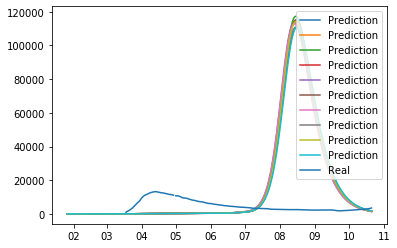

vector: [31.691321663631097, 31.69297524495669, 31.68528972771966, 31.67885951571589, 31.696491908788754, 31.684918405601717, 31.687276318482187, 31.69597828729305, 31.69436220158188, 31.684209566359787]
[1.02941532e+02 9.95511156e-01 1.27303969e+00 7.31446829e-01
 5.69420513e-01 4.06902169e-02 1.42203428e-01 1.02222733e-01
 9.62577045e-01]
best_error: 34.58426565750757
vector: [34.58637576446686, 34.58798981145755, 34.58035185433168, 34.57395609352664, 34.591700341683236, 34.57986504079415, 34.58223088058228, 34.59122708582815, 34.589579443395124, 34.579380259009994]
[1.05868270e+02 2.78385458e-01 8.19392899e-01 5.56639163e-02
 8.19578320e-02 5.81789221e-02 6.01338404e-01 9.86773777e-02
 8.31296360e-01]


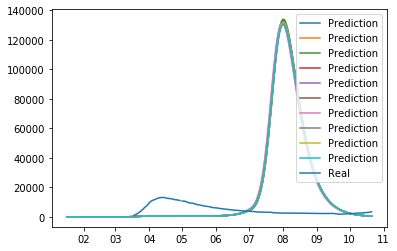

best_error: 33.104181503441474
vector: [33.104486395187536, 33.10470357685236, 33.10381003064404, 33.10298641013058, 33.104970881122036, 33.10376388118215, 33.10392570452874, 33.10494780168583, 33.1046816483948, 33.103538704686706]
[1.12691881e+02 1.63428763e+00 9.83471576e-01 7.84345273e-01
 6.59831238e-01 5.56349765e-02 5.62586613e-01 1.74461786e-01
 6.88648807e-01]
best_error: 34.4106177528413
vector: [34.410496713200644, 34.41083028752533, 34.409631537989654, 34.408890131123314, 34.41215674516726, 34.40953316607114, 34.410649399239546, 34.41193615060078, 34.41189366906049, 34.41015972843481]
[1.10371110e+02 1.34553825e-01 1.58774787e+00 9.80858377e-01
 4.78974318e-01 5.55167464e-02 6.61745055e-02 1.00211929e-01
 7.27102297e-01]
best_error: 33.83538505542159
vector: [33.835767214259775, 33.83594884581487, 33.83487957458739, 33.834042080927816, 33.83632992951316, 33.83484290483317, 33.83497979549202, 33.83635203066435, 33.83609975481575, 33.834608423307685]
[1.09081105e+02 1.72937233

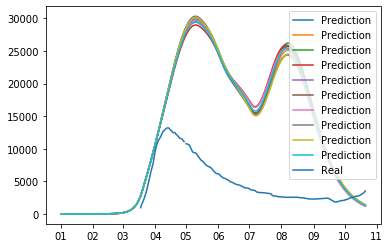

best_error: 21.99503366751969
best_error: 22.600866745487153
vector: [21.995041679867843, 21.995040970391344, 21.995015283207234, 21.995003563342564, 21.995059204654506, 21.995016576334674, 21.995021450602234, 21.995061738022898, 21.99506122083301, 21.995014987940603]
vector: [22.60106523973738, 22.60113481983283, 22.600786797380245, 22.600414348300248, 22.60111667418056, 22.600765636702633, 22.600699047883502, 22.60113090137296, 22.60098677199148, 22.600567217489704]
[1.29386453e+02 2.02055152e-01 6.51315228e-01 8.87219709e-01
 5.79050254e-01 8.00202123e-02 7.08965310e-01 1.60059202e-02
 9.80815423e-01][1.28911348e+02 1.24296217e+00 1.84405903e+00 2.04987328e-02
 3.01930066e-01 4.33939618e-02 4.63866097e-01 6.09399451e-03
 7.93856331e-01]



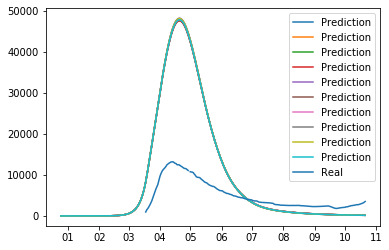

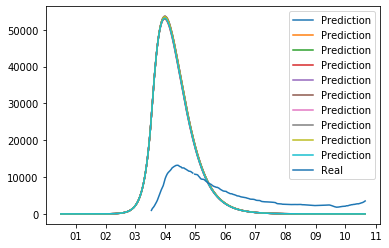

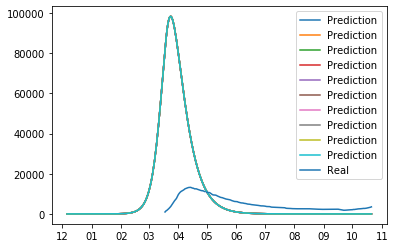

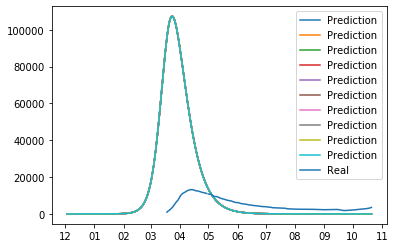

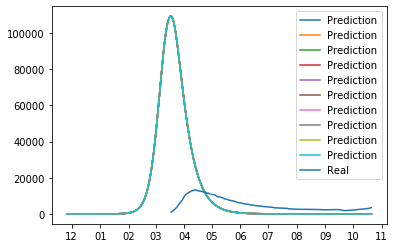

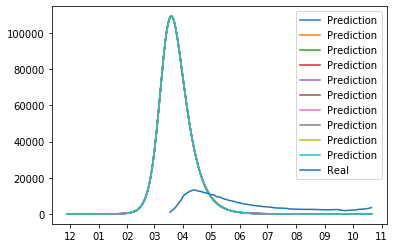

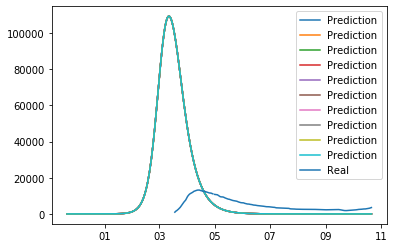

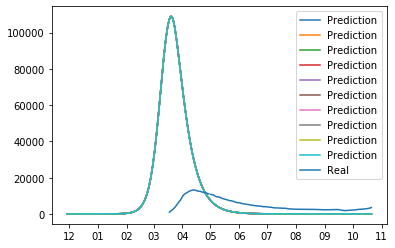

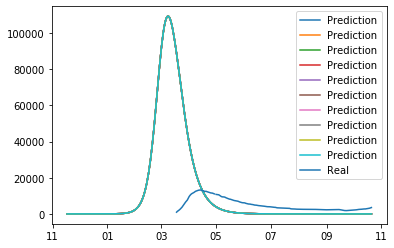

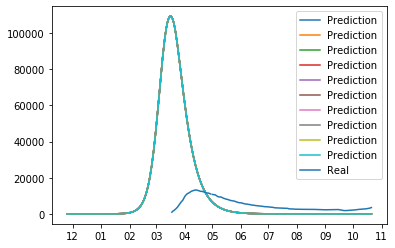

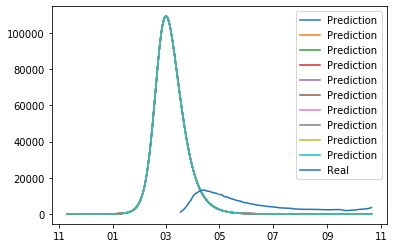

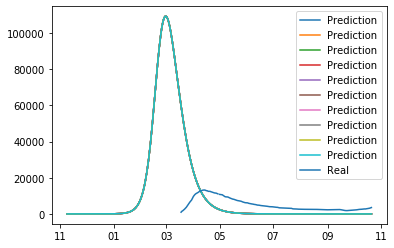

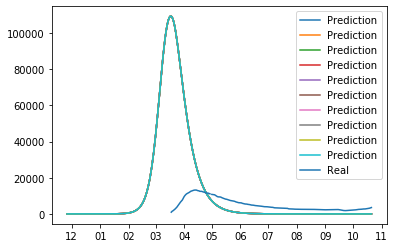

best_error: 49.20272581661819
vector: [49.16359816894504, 49.65368006296488, 50.97188288103401, 48.024941324187914, 49.352956286527835, 50.04513346225484, 48.83698115676964, 48.53103981838233, 49.29037692851773, 48.156668076597754]
[7.57086329e+01 1.80836199e+00 1.49303043e+00 8.03659597e-01
 5.51683623e-01 2.62268935e-02 9.33873390e-01 1.66931542e-01
 8.64061028e-01]
best_error: 28.23184452696018
vector: [28.232027137285183, 28.232148006588375, 28.23154239028348, 28.231027165749772, 28.232421728475856, 28.23151474488307, 28.23166052382524, 28.23241391950247, 28.232270910317588, 28.231418742690757]
[1.20735779e+02 4.42464983e-01 8.30163697e-01 6.17036165e-01
 1.33915239e-02 9.12062234e-02 1.07972792e-01 1.24264729e-01
 5.63230639e-01]
best_error: 19.682284222336005
vector: [19.743259655840376, 19.751837740141777, 19.639099796849905, 19.558762553192043, 19.751430212535652, 19.641192196662004, 19.6255497655869, 19.782367211447557, 19.71725795001207, 19.61208514109176]
[9.03111551e+01 1.1

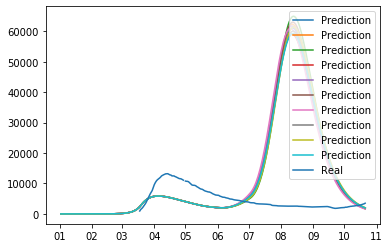

best_error: 17.75033491035009
vector: [17.87412166866223, 17.895695679919548, 17.700205519531153, 17.52474417870856, 17.86134154262174, 17.692997856336312, 17.645807756108212, 17.901269579946838, 17.792283815389474, 17.614881506276802]
[8.87887313e+01 1.58060049e+00 9.53138386e-01 6.81837969e-02
 3.87731777e-01 2.93542156e-02 1.26487661e-01 1.72674827e-01
 7.47012948e-01]
best_error: 14.007459037849562
vector: [14.007205772945719, 13.99534219459968, 13.945842425262086, 14.047088962045077, 13.996113585986304, 14.007746957186983, 14.0017195645563, 14.042517291759985, 13.98803798778355, 14.042975636369924]
[8.54918177e+01 1.91618616e+00 9.42956074e-01 6.72444304e-01
 6.16754281e-03 3.83312852e-02 2.16522493e-01 1.33217315e-01
 8.55393602e-01]


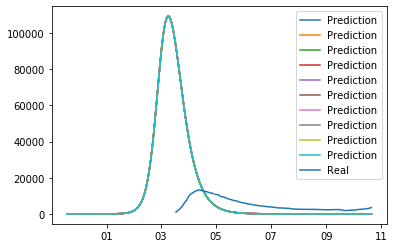

best_error: 18.115042126080873
vector: [18.115024360480817, 18.115009523580834, 18.115051903606005, 18.115104616776435, 18.115007486977103, 18.115055617060335, 18.115052302710144, 18.115010002593376, 18.115029675776306, 18.11507577124734]
[1.37338009e+02 6.37669681e-01 1.04067355e+00 7.75039710e-03
 9.47288248e-01 7.33687909e-02 5.41625094e-01 1.62916535e-01
 6.94559434e-01]


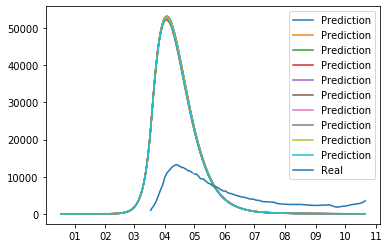

best_error: 18.920837523699692
vector: [18.920838158311824, 18.92083715574058, 18.920836720464923, 18.920838198345745, 18.920837727618938, 18.920836925872884, 18.920835883965132, 18.920838394287376, 18.920839043304127, 18.92083702908543]
[1.35293487e+02 1.42370056e+00 7.28393844e-01 8.13161277e-01
 2.40298854e-01 3.16115566e-02 4.81487525e-01 6.60832073e-02
 8.88533797e-01]


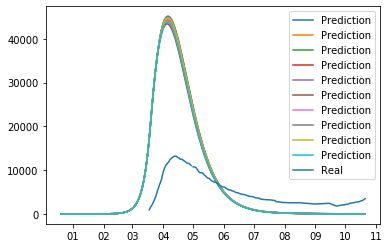

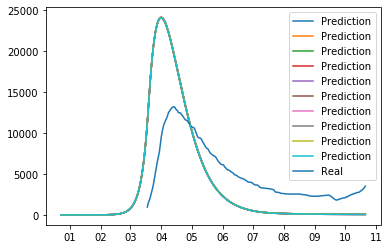

best_error: 19.83231201355401
vector: [19.832326044471518, 19.832328625035906, 19.83230420592377, 19.832282347170114, 19.83233001260897, 19.832303300136918, 19.832297852469562, 19.832332353419524, 19.832324433880125, 19.83229096042364]
[1.33123706e+02 1.15187957e+00 1.18927696e+00 3.69097171e-01
 7.91349348e-01 8.07411622e-02 9.28620169e-01 8.59714045e-04
 7.85311388e-01]
best_error: 20.855656169243794
best_error: 20.32904194755989
vector: [20.329068571596167, 20.329077562562063, 20.329031465008555, 20.328983245343103, 20.329074478658804, 20.32902871787753, 20.329019044204333, 20.32907666461164, 20.329057432495304, 20.329002293241416]
vector: [20.85574877997306, 20.855780975914456, 20.855623288550426, 20.8554530375292, 20.85576632478543, 20.855613309101848, 20.855578708681314, 20.85577283368814, 20.855704843864743, 20.855519590349324]
[1.32069892e+02 1.83826285e+00 1.61153422e+00 3.10992460e-01
 5.37818298e-01 3.07564031e-02 3.98445602e-01 1.97997721e-01
 5.71381955e-01][1.31545960e+02

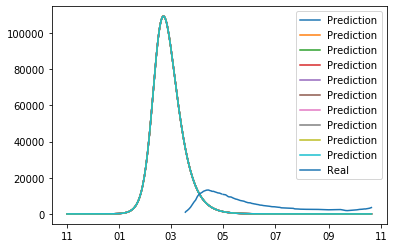

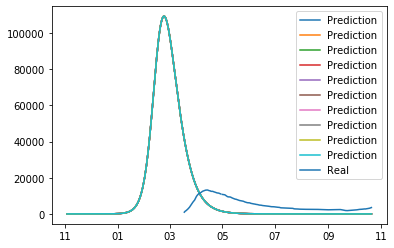

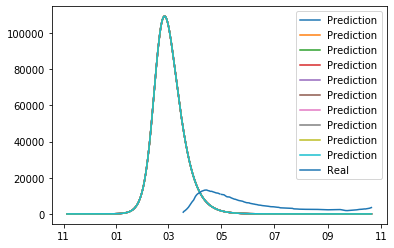

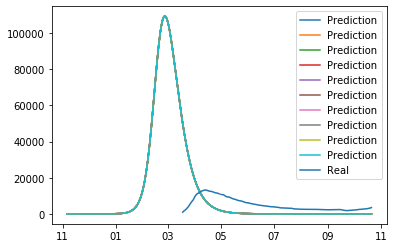

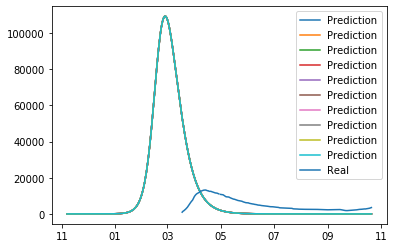

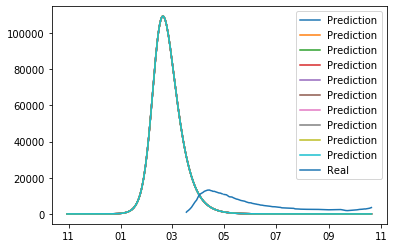

best_error: 21.111268576678917
vector: [21.14549808605439, 21.154874199764095, 21.098003449988404, 21.041749056677176, 21.14879028491477, 21.09391990240309, 21.0844687583671, 21.153473932964253, 21.126409564132977, 21.065498531522895]
[9.21515006e+01 1.86088840e+00 5.02846046e-01 2.52181905e-01
 2.58832796e-01 6.96011304e-02 4.07579859e-01 2.43998556e-02
 6.22789575e-01]
best_error: 28.911862111753614
vector: [28.91231457191432, 28.912515316784603, 28.911589156055694, 28.910646437605394, 28.91258139593661, 28.911536337649647, 28.91147928771627, 28.912599211927024, 28.91225027262457, 28.91110912932197]
[1.19825347e+02 1.30919529e+00 5.76689028e-01 5.49977454e-01
 5.46690490e-01 1.71728262e-02 7.61181661e-01 8.40772723e-02
 7.02843849e-01]
best_error: 16.422293684420104
vector: [16.43253849121431, 16.42123242553633, 16.441150283463102, 16.394739842712855, 16.402464378015814, 16.435008411954662, 16.372432792479994, 16.431664476353546, 16.453488297061618, 16.43821744540879]
[8.86609803e+01

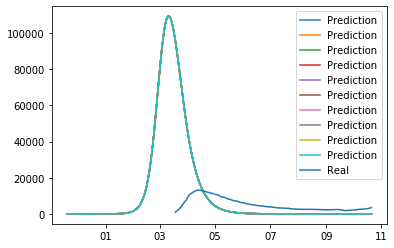

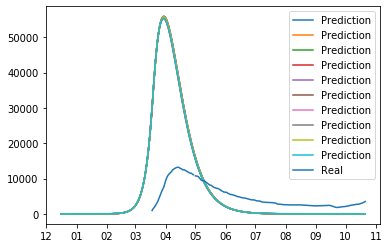

best_error: 18.50516609023583
vector: [18.505159064474356, 18.505152777854626, 18.505169130037807, 18.505190501468363, 18.505153125719985, 18.505170625417918, 18.505169549982035, 18.505154252499146, 18.505162600444777, 18.505179274459287]
[1.36422238e+02 9.46148595e-01 1.39827763e+00 3.60243485e-01
 3.79440611e-01 5.02580532e-02 3.40121517e-01 5.05029306e-02
 9.13670067e-01]


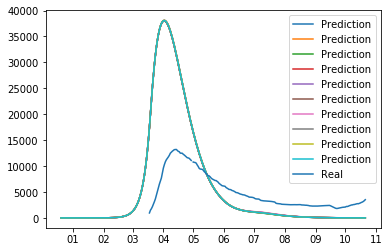

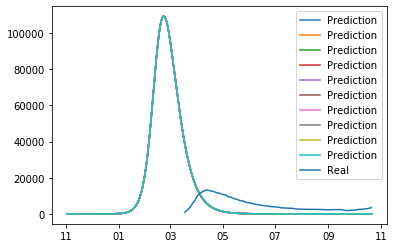

best_error: 12.878140658151134
vector: [12.653301579983328, 13.844208622656286, 16.231503512978016, 10.76971492799891, 13.202232918536394, 12.734398516280772, 13.085011412912195, 11.870077358779644, 13.338570580353423, 11.052387151032361]
[66.00631028  1.56333984  0.74639753  0.92354663  0.37206515  0.09562543
  0.73793826  0.15392029  0.6181531 ]


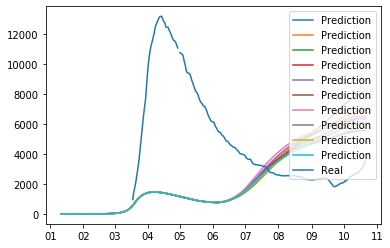

best_error: 25.13384819312879
vector: [25.119157784361576, 25.141233420067024, 25.145942765327884, 25.13115464436548, 25.141698095527307, 25.155984974465618, 25.12981098213052, 25.113903972127424, 25.14292441162004, 25.116670881295054]
[6.49214059e+01 1.72804081e-01 1.08833098e+00 8.98574247e-01
 4.17939049e-01 5.94133213e-02 2.74545304e-01 3.84726986e-02
 9.29030247e-01]
best_error: 6.9255725960057815
vector: [7.319274236321824, 7.238522863532712, 5.613140660714437, 6.779592845118925, 7.141399521300416, 6.951275688419493, 6.119650569506166, 8.019984448545326, 6.925392161380818, 7.147492965217699]
[8.26300332e+01 1.82291152e+00 8.94519114e-01 2.00132666e-01
 4.46948416e-01 2.26904662e-02 3.66936286e-01 1.01967512e-01
 9.58134486e-01]


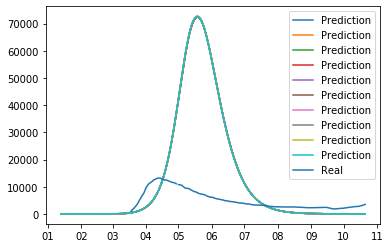

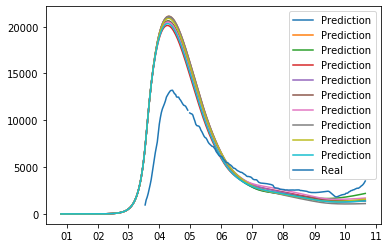

best_error: 12.867947418127958
vector: [12.831008831163295, 12.886975884392719, 14.747727515883607, 12.834277881993513, 12.252027545894471, 13.120114938800517, 13.061160082606524, 11.658785165861072, 12.766379506433596, 12.521016828250247]
[8.67510492e+01 7.42003287e-01 1.42033145e+00 4.85034831e-01
 4.74850903e-02 4.94460071e-02 1.20269659e-01 2.65776793e-02
 7.75767051e-01]
best_error: 28.18415341486652
vector: [28.18517308818892, 28.18555511501644, 28.183767930307386, 28.181881328124987, 28.185404519320898, 28.183655054910776, 28.18330125602494, 28.18546840131929, 28.18469451830194, 28.182632937149624]
[1.20179984e+02 1.97224341e+00 7.12037004e-01 2.43802583e-01
 6.26188840e-01 3.86998047e-03 3.57435771e-01 3.37802494e-02
 9.39386966e-01]


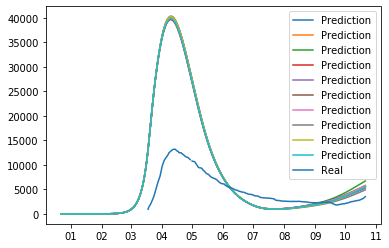

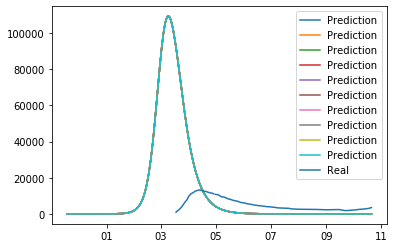

best_error: 21.40792045342789
vector: [21.40792924853784, 21.40793152772101, 21.407899996555663, 21.407881973626576, 21.40795170069994, 21.407900053666896, 21.407907020156856, 21.40795430982168, 21.407950828172943, 21.407897875319506]
[1.30264506e+02 7.15792110e-01 1.23059488e+00 8.75116322e-01
 2.34857692e-01 4.45154339e-02 9.94089015e-01 3.54845393e-02
 7.59114928e-01]


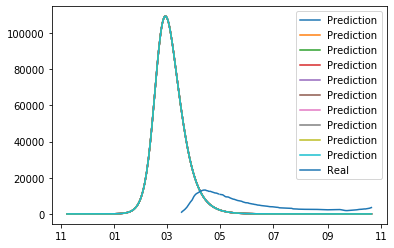

best_error: 27.495557194671733
vector: [27.457559504968067, 27.49854128340295, 27.513298233960892, 27.53015012805936, 27.495174497147758, 27.53733261044279, 27.516383138868505, 27.439090173670444, 27.491951652604335, 27.476090723592186]
[6.19204947e+01 2.60205894e-01 7.41080191e-01 4.74368321e-01
 9.35278674e-01 7.86083236e-02 3.77196597e-02 7.85338104e-03
 9.36317272e-01]
best_error: 17.03055850377492
vector: [17.149871083165728, 17.188349375248514, 16.97148342393525, 16.744770414699737, 17.189419627134075, 16.958369277788663, 16.912976392301935, 17.2145968238908, 17.120756855618342, 16.854991763966165]
[8.53115020e+01 9.79124297e-01 9.03213999e-01 2.67515617e-03
 2.10542246e-02 4.25513839e-02 5.08226316e-01 1.99954327e-01
 6.18527515e-01]
best_error: 16.258313298349936
vector: [16.73307811781748, 16.366316405997207, 15.289413856808672, 16.219495401530494, 16.103438306700475, 16.57677554848101, 15.133430542412135, 16.849849590433024, 16.533662514772008, 16.77767269854684]
[9.12206021e

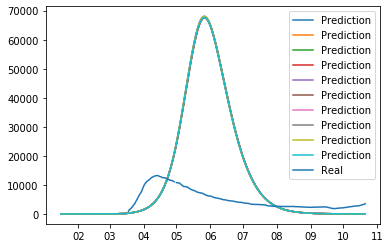

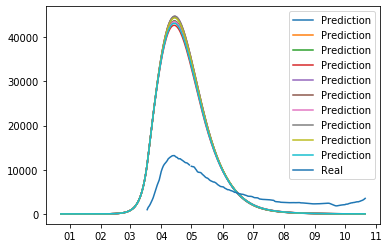

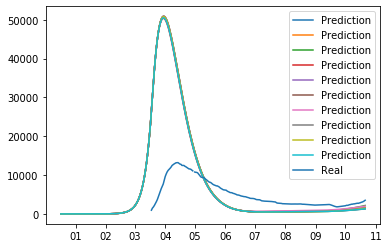

best_error: 25.25645251582035
vector: [25.263676073845858, 25.265551084438098, 25.250849854631742, 25.241143027224375, 25.265511605556732, 25.25255098944403, 25.24969843944088, 25.267388724759172, 25.260916257049963, 25.24723910181267]
[9.69641092e+01 1.98745338e+00 1.95330011e+00 5.45941541e-01
 4.54694534e-01 1.91953555e-02 5.91160690e-01 1.40484317e-02
 6.31708501e-01]


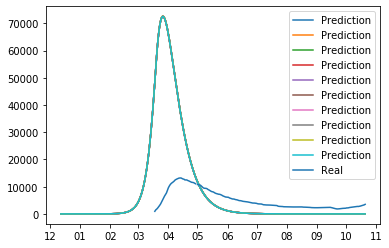

best_error: 13.291811797490206
vector: [13.468320007182664, 13.410443842900806, 13.162132123121658, 13.062003471988621, 13.289599021943566, 13.304858491169941, 12.929913990099486, 13.534820747369306, 13.433682973765631, 13.32234330536038]
[8.62127791e+01 1.25970365e+00 8.60207728e-01 3.47649516e-01
 7.80599444e-01 4.21284565e-02 4.05790486e-01 1.38910410e-01
 8.43973964e-01]


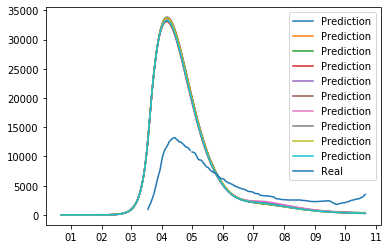

best_error: 10.882407426243681
vector: [10.946688301951554, 10.903701755662093, 11.041094715868502, 10.773678438640346, 10.714047913514968, 11.02821821894595, 10.533801356324553, 10.862709954567595, 11.036398733100942, 10.983734873860309]
[8.06913119e+01 1.89237107e+00 5.19617033e-01 7.65620530e-01
 6.11395965e-01 2.14336654e-02 3.84374891e-01 6.16858391e-02
 7.13675973e-01]


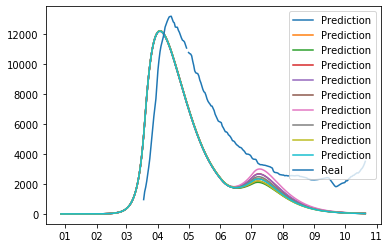

best_error: 8.987014144050693
vector: [8.958699840097523, 8.813893800023239, 8.644626425506779, 9.289937189911893, 8.920808563269349, 8.925937935607806, 8.934521534366194, 9.245459504750961, 8.928694432767392, 9.207562214205815]
[7.72022590e+01 1.56540334e+00 7.07092966e-01 8.58284518e-01
 3.35268550e-02 9.50942022e-02 7.92711452e-01 1.44890257e-01
 5.42542710e-01]


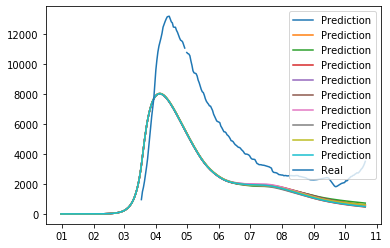

best_error: 4.345479872761801
vector: [4.2737896861039255, 4.078071097580921, 3.961814920960042, 4.884550295003061, 4.304823813893928, 4.360213269764026, 4.5354313782444216, 4.4175670019572895, 3.9644413012042223, 4.674095962906165]
[7.81965736e+01 1.70549722e+00 7.84808278e-01 9.72794758e-01
 5.19085954e-01 4.12176471e-04 5.83385617e-01 1.16999718e-01
 9.05994952e-01]
best_error: 9.764461869193699
vector: [9.732244842250543, 9.85741203773357, 9.608743799181138, 9.594720225745359, 9.96737740819778, 9.72066270570706, 9.760262270826546, 9.863751247349304, 9.88115323460836, 9.658290920337322]
[7.84709344e+01 1.32243934e+00 5.80907133e-01 2.89803190e-01
 2.60167500e-02 1.30103937e-02 7.75695763e-01 1.64264498e-01
 9.50055626e-01]
best_error: 23.355569199802737
vector: [23.358994773720966, 23.3623991949173, 23.33813628240012, 23.323814715374304, 23.3818970542235, 23.33591441532006, 23.351481042002717, 23.38074112103369, 23.37736765982585, 23.34494573920884]
[9.26114284e+01 4.34184220e-01 5.

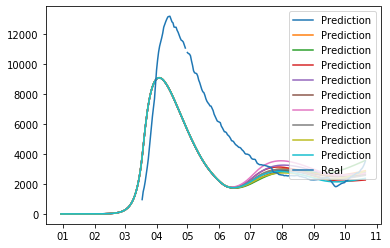

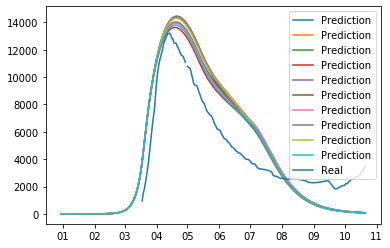

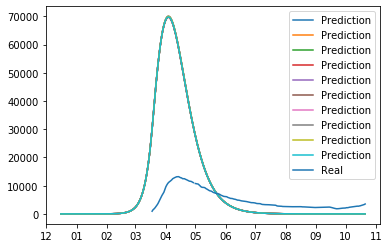

best_error: 16.047034384918682
vector: [15.980875520880772, 16.076088184965617, 15.976965060588741, 16.048002931534892, 16.131845985592882, 16.01164276259589, 16.145097999043003, 16.006909683500066, 16.058411580420135, 16.034504140064783]
[7.63793475e+01 5.06098384e-01 6.29747435e-01 9.47916010e-01
 6.16754281e-03 1.02165450e-02 4.30901274e-01 1.33217315e-01
 8.55393602e-01]
best_error: 15.797240506754843
vector: [14.796106448387087, 14.739231616240545, 20.85599918156891, 15.774160220680642, 14.3768994003821, 15.513208522523442, 17.345549372698958, 12.455792573222277, 16.751986717705407, 15.363471014139058]
[8.97826217e+01 1.76235721e+00 1.84989000e+00 9.41530866e-02
 1.88313160e-02 9.56036901e-03 1.93256764e-01 1.87198300e-01
 9.41143804e-01]


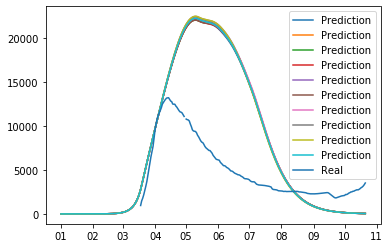

best_error: 14.70075665784213
vector: [14.612852452954236, 14.691508921273721, 14.531059570248498, 14.80896417716311, 14.775422205509088, 14.742811366961222, 14.821767264501602, 14.638020042384916, 14.64497084140403, 14.740189736020879]
[7.71987594e+01 4.83099506e-01 1.36463694e+00 4.89608284e-01
 2.49276625e-01 4.68343607e-02 8.66924362e-01 1.46879834e-01
 7.54582011e-01]


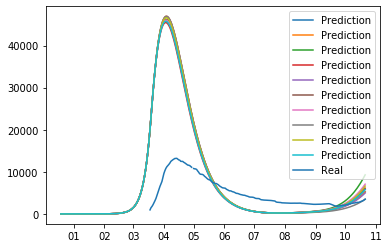

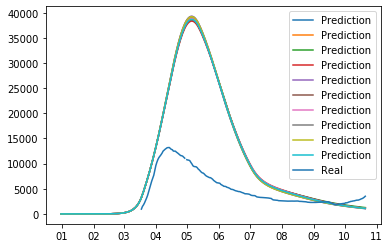

best_error: 6.8432695979476845
vector: [7.1641328858744995, 6.491244883971627, 5.989164900123992, 7.329857821268389, 6.266105402507518, 7.142695297472833, 6.207995284618757, 7.030501530557126, 7.221408671167839, 7.58958930191427]
[50.293722    1.63806907  0.59100326  0.87077197  0.77618924  0.06161414
  0.81380155  0.12101757  0.97946982]
best_error: 8.190707445281792
vector: [8.208663412392793, 7.9601289816328595, 7.5859134149511505, 8.685833658527141, 7.920157916990146, 8.333675871343255, 7.986851724944881, 8.42351752421407, 8.053458717545023, 8.748873230276605]
[6.06131393e+01 1.44375590e+00 5.48190595e-01 4.85034831e-01
 4.10411763e-01 1.88418841e-02 1.20269659e-01 1.58142899e-02
 8.45307999e-01]
best_error: 15.833259738543976
vector: [15.779838417221214, 16.58445720262371, 19.6417477021292, 13.672124151402024, 15.774071258508307, 15.78504964628361, 15.472851029231302, 14.742292840917496, 16.678695643981843, 14.201469493141044]
[8.32211707e+01 1.46395273e+00 1.00694361e+00 8.581894

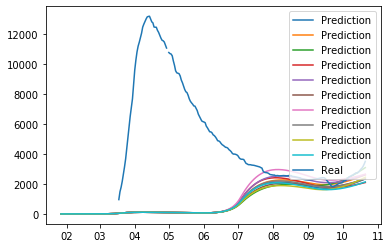

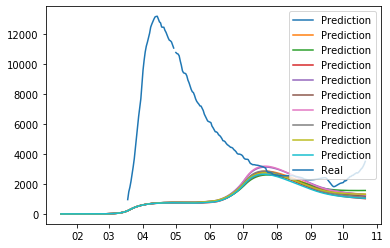

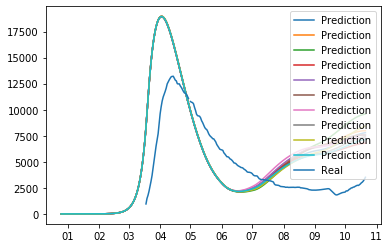

best_error: 11.826503558758679
vector: [11.923935301293993, 11.891359082313032, 11.799011259304613, 11.742774682212149, 11.800411315469793, 11.819747453361831, 11.666678751163117, 11.944025933059208, 11.841856960089702, 11.83523484931936]
[8.38560108e+01 1.69094321e+00 6.87606260e-01 2.96219133e-01
 3.80657693e-01 1.90763795e-02 4.26063803e-01 1.38125357e-01
 7.20502920e-01]


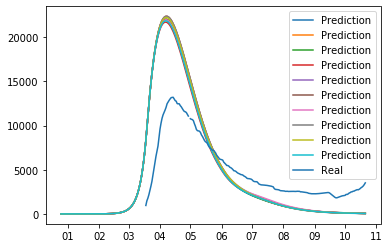

best_error: 9.793842772097285
best_error: 12.147606619233184
vector: [9.800262996729206, 9.779027890258725, 9.738652498892874, 9.809191043726264, 9.797518348661221, 9.75147161306293, 9.866145659144554, 9.828181746727765, 9.76596381877059, 9.80201210499873]
vector: [12.139433598148326, 12.27594592395025, 11.884305145512519, 11.930100339218441, 12.422410223982325, 12.046626640557434, 12.12555230873578, 12.37864132924539, 12.292073636599282, 11.980977046382062]
[8.14988003e+01 1.99980465e+00 5.19426236e-01 2.65009022e-01
 6.17804069e-01 1.36717906e-02 4.77366530e-01 8.95641243e-02
 8.19308507e-01][8.17618065e+01 1.15890077e+00 7.84150213e-01 1.46008541e-01
 4.46948416e-01 1.08792768e-02 5.32991323e-01 1.01967512e-01
 9.58134486e-01]



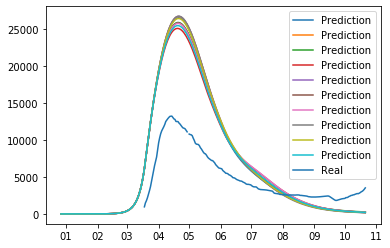

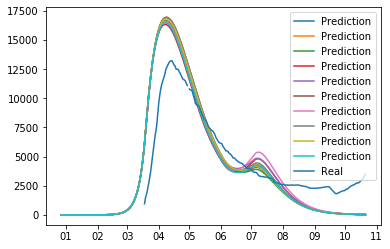

best_error: 10.528993931630426
vector: [10.27773515848892, 11.284121277555748, 13.9714570249783, 8.866551082644559, 10.740341875312392, 10.155737642283343, 11.068634155562878, 9.366841241227391, 10.860349720735968, 8.698170137514762]
[7.46296614e+01 1.94930950e+00 7.76613763e-01 5.41248114e-01
 6.00170649e-01 5.67823471e-02 4.01481731e-01 1.07051194e-01
 6.31905638e-01]
best_error: 9.96196185743025
vector: [9.906989152289725, 9.95274505527421, 9.848885958909921, 9.98047233030682, 10.052171194784192, 9.894342480233185, 10.068053305364833, 9.970616056866277, 9.976158166234049, 9.969184874039293]
[8.00829683e+01 8.20342561e-01 5.07847895e-01 9.74572725e-01
 2.83547464e-01 6.10784540e-02 5.26559170e-01 6.33826173e-02
 9.51585768e-01]


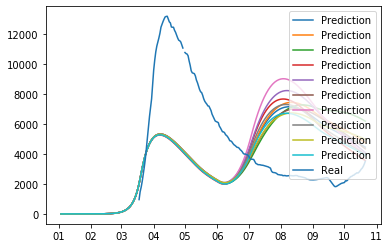

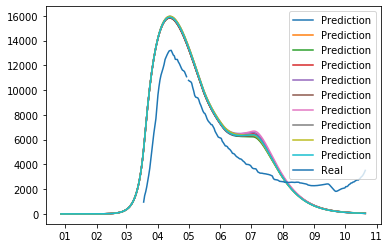

best_error: 10.799170215937114
vector: [10.7563382236346, 10.532701128490475, 10.22162236559932, 11.348362233156864, 10.61281785255464, 10.833827044671649, 10.693222598272353, 11.15943132021259, 10.604521430457833, 11.228857962320816]
[5.57185981e+01 1.65942778e+00 6.04319116e-01 4.92612722e-01
 1.99230145e-01 1.98854015e-02 7.70585858e-01 2.10484990e-02
 9.01245271e-01]


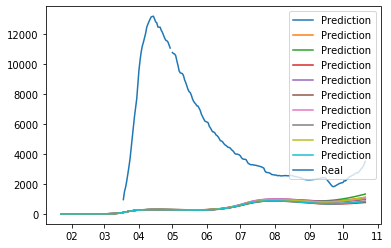

best_error: 13.459660832603607
vector: [12.87234353151919, 13.681269916120725, 15.663599919206751, 13.019133405404787, 13.441157692632636, 13.297045565942405, 14.67801506609126, 12.638160440710664, 13.372049928436063, 11.933832859971584]
[7.91948654e+01 1.53871657e+00 8.33978839e-01 9.26747103e-01
 8.39235101e-01 6.59271438e-04 3.32949817e-01 7.64165792e-02
 7.43927129e-01]
best_error: 6.547829390648877
vector: [6.523497162212484, 6.423431506888998, 5.8103636126129805, 6.8498844193467905, 6.706114053525618, 6.528620492948194, 6.79488681258014, 6.7654423334681, 6.335093241185166, 6.740960271720301]
[8.44388544e+01 1.17231997e+00 8.83199993e-01 6.41137399e-01
 6.85110248e-01 7.44213595e-02 4.78242018e-01 1.42348413e-01
 8.09866832e-01]


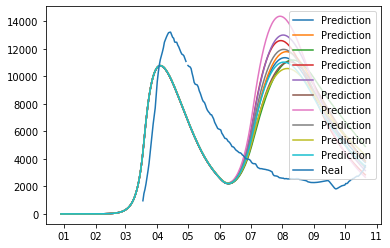

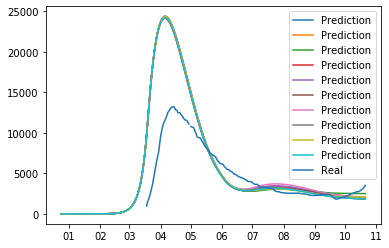

best_error: 9.70670050381064
vector: [9.806761970548255, 9.482606120356362, 8.788463310649124, 10.259212170273756, 9.503819953736926, 9.828264454854322, 9.478698746579022, 10.00376394641411, 9.642363364994871, 10.273050999699647]
[6.71620945e+01 1.90408830e+00 7.38126068e-01 8.43176652e-01
 2.65767380e-01 2.38363351e-02 3.52125139e-01 3.55605178e-02
 7.11051992e-01]


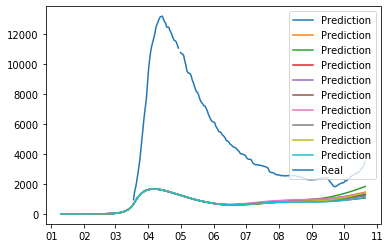

best_error: 17.249507689577094
vector: [17.26834193985927, 17.25614624979211, 17.269887458743018, 17.224982432571064, 17.21872217047084, 17.277714473204455, 17.169207841598364, 17.251463506181487, 17.2855416195692, 17.27306920378113]
[8.90712492e+01 1.91457492e+00 8.45596969e-01 7.43598134e-01
 7.69213242e-01 7.29050920e-02 2.35954095e-01 5.79738181e-02
 9.43835375e-01]
best_error: 12.320398422352152
vector: [12.295919881136669, 12.501006270320262, 14.023948588907137, 11.934771213218648, 11.992462047093284, 12.433687255878723, 12.401679518062604, 11.408301735823098, 12.4016708352753, 11.810536877805813]
[8.83384774e+01 8.54221205e-01 1.35847518e+00 6.01816181e-01
 3.56513429e-01 2.46305328e-02 7.92261435e-01 1.10341372e-01
 9.09393016e-01]


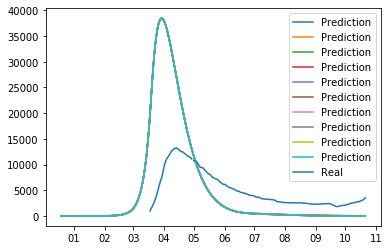

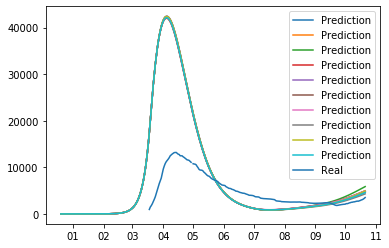

best_error: 10.812080426298342
vector: [10.881083315198904, 10.836919429567383, 10.973106063731016, 10.689174424821296, 10.64221586471529, 10.965503834168397, 10.447807569246534, 10.787931099896557, 10.984923645345617, 10.912139016292425]
[7.94909556e+01 1.89237107e+00 5.19617033e-01 8.95525852e-01
 6.11395965e-01 2.14336654e-02 3.84374891e-01 1.10747911e-01
 8.93847872e-01]
best_error: 5.847672294612756
vector: [5.835066517089083, 6.295322614177597, 8.477309999527346, 4.304374913291971, 6.029528936012604, 5.656227642425521, 5.892589205971615, 4.8510340167421555, 6.4416876472742555, 4.693581453615408]
[7.17673818e+01 1.66042370e+00 7.26347875e-01 6.63349723e-01
 2.62313165e-01 2.29295652e-02 4.87237567e-01 5.75669044e-02
 9.66873803e-01]


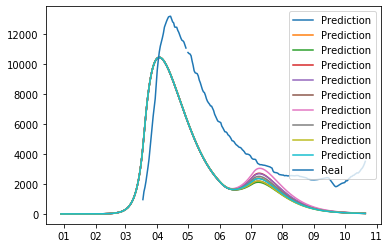

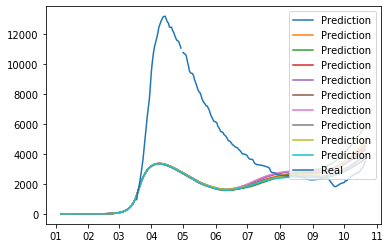

best_error: 16.41145611241672
vector: [16.418804427582785, 16.40732027568665, 16.400102902536656, 16.41241219680904, 16.39945256544991, 16.41408158511804, 16.388090175474908, 16.42453971667984, 16.422319371555776, 16.427437907273564]
[8.80088392e+01 1.21046884e+00 8.51644287e-01 8.87219709e-01
 4.36845555e-01 8.00202123e-02 3.02136343e-01 1.60059202e-02
 7.33845223e-01]


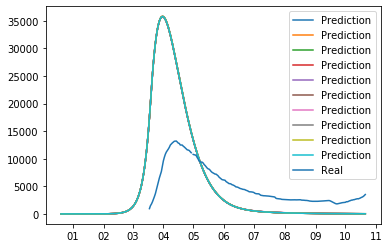

best_error: 8.97481427990354
vector: [9.12769788842603, 8.728487959959665, 7.791757902563033, 9.637582768690445, 8.682931643930935, 9.141428130748352, 8.624920523101714, 9.336159973057214, 8.98493959925058, 9.692236409307448]
[85.97572396  1.49616179  1.00582215  0.8940703   0.48151395  0.09007213
  0.34841289  0.1697521   0.97135972]


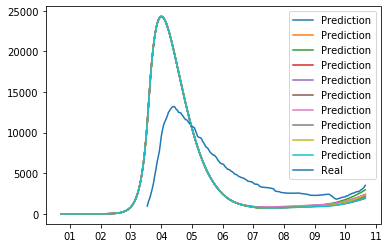

best_error: 8.920523515533947
vector: [8.907628431237779, 9.013559409215851, 8.65321247594287, 8.924785332392045, 9.082410290524997, 9.002902904129142, 9.15431013105385, 8.77215720986753, 8.764240062035391, 8.930028908940024]
[8.01830287e+01 8.02936814e-01 8.27944100e-01 9.41862286e-01
 6.05828233e-02 6.42153554e-02 8.33606409e-01 1.64270759e-01
 6.19546051e-01]


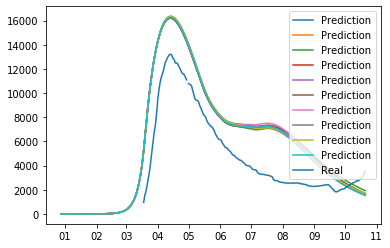

best_error: 14.781282525836593
vector: [14.719489567921155, 14.715926030579457, 18.707676307178314, 14.25767207463419, 13.580478932353023, 14.852045214700302, 15.056599827578172, 12.355445055466811, 15.260522022350013, 14.306970225604491]
[7.87274031e+01 1.72195507e+00 9.81933528e-01 1.57215222e-01
 5.34023920e-01 2.59928192e-02 3.73847238e-04 1.34881971e-01
 7.51613490e-01]


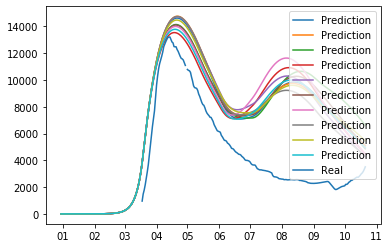

best_error: 9.515621515765055
vector: [9.54467999163765, 9.450688288696783, 9.338865191871026, 9.681085654028845, 9.368693147490525, 9.567400921416862, 9.366172276150547, 9.62304119585252, 9.496673146176734, 9.718915344329059]
[7.72022590e+01 1.56540334e+00 6.39160410e-01 6.68457833e-01
 2.48158517e-01 6.13387829e-02 1.82585383e-01 1.11252921e-01
 8.40611435e-01]


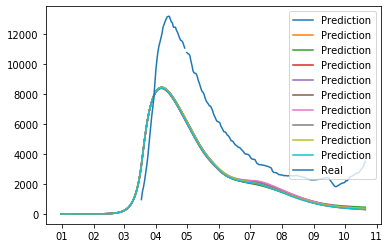

best_error: 13.272463383058398
vector: [13.079022275208281, 13.21589383832635, 12.770750755559817, 13.570640608224146, 13.641495394929498, 13.349199806590152, 14.144368264135064, 12.874829469901123, 12.908342495654495, 13.170090922055042]
[7.64000540e+01 1.32243934e+00 7.96648219e-01 2.89803190e-01
 4.03349411e-01 1.30103937e-02 7.75695763e-01 1.01415909e-01
 8.43408047e-01]


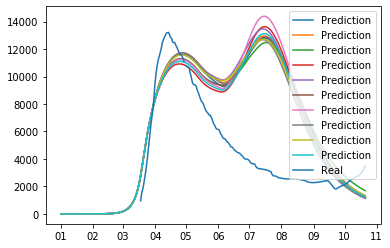

best_error: 5.997153424355984
vector: [5.754645289982978, 5.735423778379715, 8.60903050636427, 5.679945364488747, 5.336885690186849, 5.97276693344922, 6.645468915471424, 4.579180667514459, 6.171015771546186, 5.487171326175987]
[7.95511868e+01 1.51863613e+00 9.16133130e-01 2.15895197e-01
 2.83547464e-01 1.27378758e-02 5.26559170e-01 6.33826173e-02
 9.22746739e-01]best_error: 7.586402391317362

vector: [7.2415952982825, 7.900315319185632, 9.765986657699987, 7.1493450942733885, 7.509337384202972, 7.1423645453869655, 7.596146505227647, 6.773994620271395, 7.749151582507329, 7.035786906135806]
[8.54918177e+01 1.91618616e+00 1.12671357e+00 8.19710875e-01
 4.53367617e-01 3.83312852e-02 8.14093748e-01 7.60422729e-02
 8.94154473e-01]
best_error: 10.870032774386795
vector: [10.865707499727966, 10.796018678798173, 10.956764597750265, 10.825810541860845, 10.72591718015927, 10.968986779328246, 10.817600002155862, 10.813399909596118, 11.003091174678238, 10.927031379812973]
[8.38142728e+01 1.99991376e

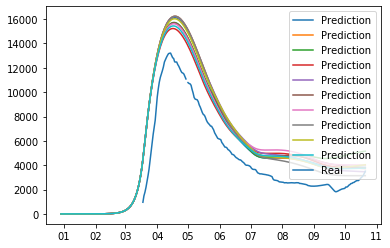

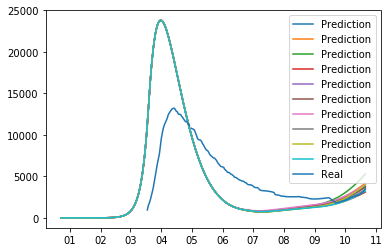

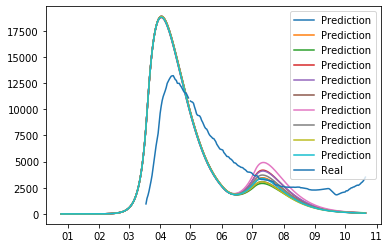

best_error: 9.236396750573345
vector: [9.213250663749813, 9.126458876790762, 8.937386677095319, 9.437702139996377, 9.25542240348954, 9.151289003659382, 9.495705693430004, 9.272499251994983, 9.157645386670195, 9.316607408857084]
[8.01786169e+01 1.83486169e+00 6.07325605e-01 6.24387738e-01
 6.91807265e-01 9.84924480e-03 3.63464280e-01 1.02890932e-01
 9.60474089e-01]


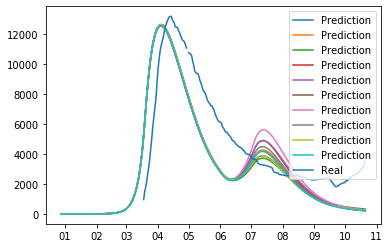

best_error: 7.176329030784009
vector: [6.768994674499725, 7.083060510939691, 8.644096366826023, 7.435567598025112, 7.0376231762994985, 6.648491494885716, 6.902213435283819, 6.78399391013566, 7.238685970482022, 7.220563170462829]
[61.25535494  1.7982096   0.74376601  0.8588011   0.3305349   0.06244968
  0.53864342  0.1159954   0.96771191]


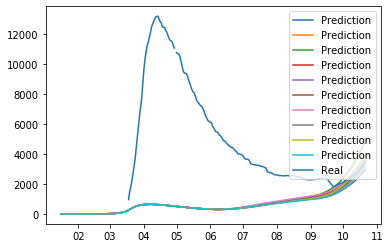

best_error: 10.677553968850283
vector: [10.697706470933685, 10.670835245955239, 10.655772889708997, 10.656517762772195, 10.663288958471288, 10.659301230791213, 10.645739375784979, 10.727350678765049, 10.706503272500974, 10.69252380281923]
[8.32478349e+01 1.18672150e+00 5.62584673e-01 6.09983557e-01
 5.88539538e-01 8.13095709e-03 7.06668400e-01 1.76668281e-01
 6.89492022e-01]
best_error: 7.099604681262996
vector: [7.185284278178145, 7.676857515255051, 10.13974932714012, 5.377207669549962, 7.134891498583071, 6.974791357604991, 7.042099176732144, 5.849960365130431, 7.819605840736328, 5.795599783719713]
[7.89483384e+01 1.59375738e+00 8.69081150e-01 7.26147072e-01
 1.33539469e-01 5.05194965e-02 6.38640495e-01 8.57272276e-02
 9.02039626e-01]
best_error: 9.893766404177933
vector: [9.807637114158211, 9.60969305366823, 9.091154916851984, 10.448154551750902, 9.925458426533694, 9.792524860991886, 9.87668723531613, 10.47190262400299, 9.663333522228257, 10.251117736277035]
[8.39227503e+01 1.9355510

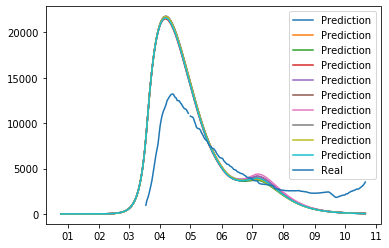

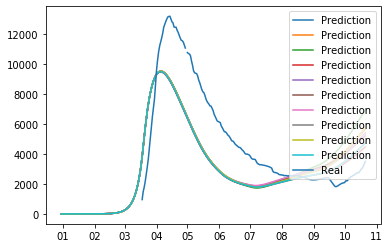

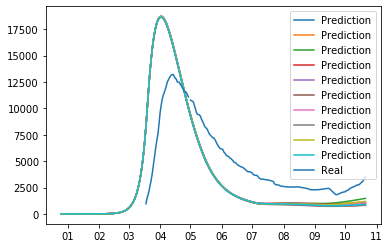

best_error: 7.28900313358284
vector: [7.359888769197423, 7.003451396350097, 6.231065288888594, 7.959393454410912, 7.099709476316818, 7.347428104590699, 7.06934454033095, 7.72636954154949, 7.191956912393647, 7.9014238517997635]
[7.64348529e+01 1.85394040e+00 7.76431532e-01 8.22551953e-01
 2.63589954e-01 1.39304297e-02 6.64341231e-01 1.55373440e-01
 8.38703438e-01]


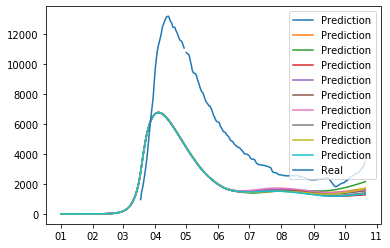

best_error: 9.045322801198745
vector: [9.059599677917575, 8.969144615754216, 8.844245952292509, 9.180485863867254, 9.002729326866078, 9.006774717094618, 9.065562263537661, 9.119761424254229, 9.043840978952117, 9.161083191451178]
[7.84135491e+01 1.70398529e+00 6.14043573e-01 8.56017458e-01
 4.42836156e-01 9.26876791e-03 8.66709612e-01 1.27496025e-01
 8.21198329e-01]


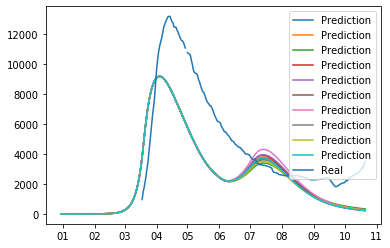

best_error: 3.682565363678941
vector: [3.425559848934104, 3.7730972923125923, 4.93638421432116, 3.715581688504666, 3.3777115933671182, 3.507117717875863, 3.392252105267491, 3.5190166890444092, 3.5450007339957406, 3.6339317531662654]
[7.90600675e+01 1.23331600e+00 8.27944100e-01 9.41862286e-01
 6.05828233e-02 1.27007617e-03 6.22784570e-01 1.59000844e-01
 6.19546051e-01]


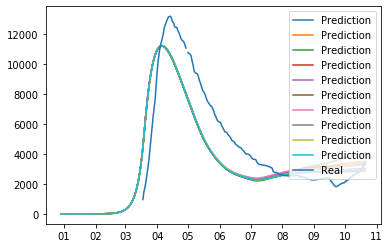

best_error: 7.937474422560145
vector: [7.997639885958357, 7.716267438390167, 7.1224516636748465, 8.472437545674838, 7.6886332068522325, 8.066231602659544, 7.656859550150349, 8.280080520201073, 7.851928427260505, 8.522214384779536]
[7.39853945e+01 1.74964567e+00 6.99414944e-01 6.84829778e-01
 2.79105915e-01 1.84790499e-02 1.40296211e-01 1.32137865e-01
 7.13059378e-01]


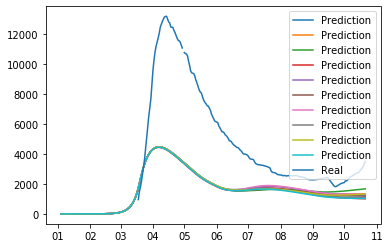

best_error: 9.12848758682164
vector: [9.07775748651656, 9.297485406130244, 8.311813201894136, 9.411494316671007, 9.427948920219727, 9.237702847791954, 9.96674818321577, 8.873168279744114, 8.524236028946513, 9.156521197086377]
[7.48736897e+01 1.61304106e+00 6.94321998e-01 9.46918616e-01
 4.41064986e-01 1.27973034e-02 9.36284686e-01 1.75453004e-01
 8.22592696e-01]


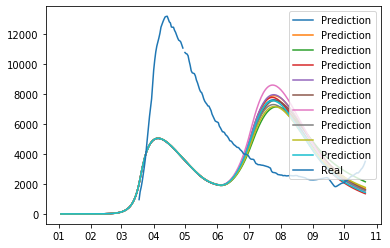

best_error: 4.440687304687164
vector: [4.233260352614959, 4.804547793084729, 6.947614299434534, 3.4797602171599795, 4.553432824977147, 4.176769732080654, 4.553465463224515, 3.5352570939679104, 4.80993854483589, 3.312826725491318]
[7.60067670e+01 1.84269939e+00 7.89660188e-01 7.03492187e-01
 3.97096445e-01 9.55628263e-02 5.43966507e-01 1.20894106e-02
 9.51943239e-01]


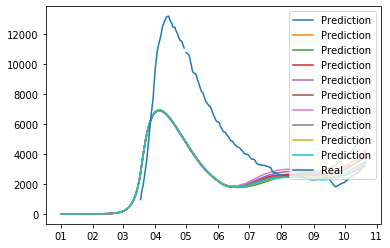

best_error: 7.265430907031084
vector: [7.180644049568352, 7.204647279612455, 6.650551570116759, 7.479985473721214, 7.595875667283751, 7.205197842967262, 7.684364580290735, 7.35485957677348, 7.0213191254291765, 7.276863904547664]
[7.01976072e+01 1.21490968e+00 6.07758753e-01 6.39683184e-01
 2.71734090e-01 3.43688171e-02 1.45258555e-01 8.95641243e-02
 7.58515928e-01]
best_error: 6.758777642426634
vector: [6.801801636968472, 6.542266140544437, 5.714529900611586, 7.352066472547135, 6.844198783431181, 6.629636239338085, 7.268707635322487, 6.872974538460964, 6.530004766085386, 7.031590310956604]
[7.64367379e+01 1.79496632e+00 6.85210091e-01 9.71024038e-01
 6.31943475e-01 4.25713939e-02 4.15955378e-01 1.92620869e-01
 9.50055626e-01]
best_error: 9.579759492951364
vector: [9.57107367182648, 9.606120688994322, 9.350415641832173, 9.662543654333335, 9.646685914168652, 9.527982336819239, 9.795549627575907, 9.527427894710561, 9.481644497118458, 9.628151002134533]
[7.70817680e+01 1.19042207e+00 5.319

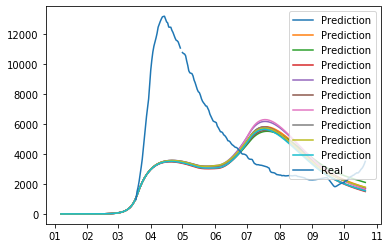

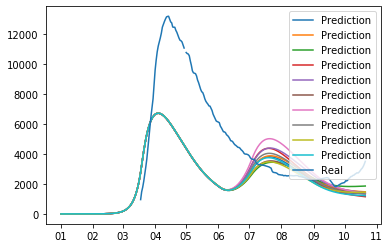

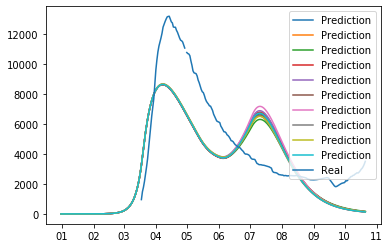

best_error: 6.346118424050682
vector: [6.301111238572462, 6.716981109404084, 8.480695659433842, 6.04876265261006, 6.195572013225618, 5.504382286913926, 6.070081858076431, 5.359935520175495, 7.019218292473193, 5.764443609621713]
[5.36870369e+01 1.66689715e+00 6.55146588e-01 1.35345934e-01
 1.57037763e-02 2.89396308e-03 4.25867055e-01 1.10283718e-01
 6.58186319e-01]best_error: 6.960836131185941

vector: [6.727269760117528, 7.102068202243794, 8.653596774470406, 6.794556649345845, 6.897189892064899, 6.806668234444662, 7.2796594605747424, 6.35444153792263, 6.794744709815468, 6.198166090859434]
[8.15814045e+01 1.24429428e+00 8.59019771e-01 6.01770586e-01
 6.28821680e-01 1.23542991e-03 2.81458397e-01 6.57846177e-02
 6.70721641e-01]


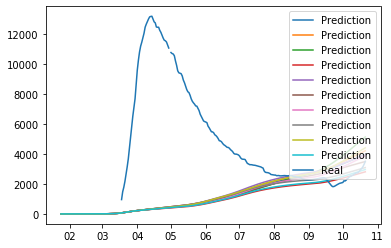

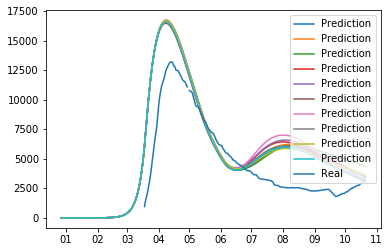

best_error: 5.628198177008443
vector: [5.562595196351397, 5.478586569398079, 4.902357214184288, 6.042727752151492, 5.839254852365967, 5.585974181655331, 6.07510820289332, 5.726945705339341, 5.285133747530001, 5.783298348215215]
[8.09999039e+01 1.34711007e+00 7.56357903e-01 8.81916198e-01
 5.75411993e-01 3.54850151e-02 3.69680920e-01 1.36013514e-01
 6.25492649e-01]


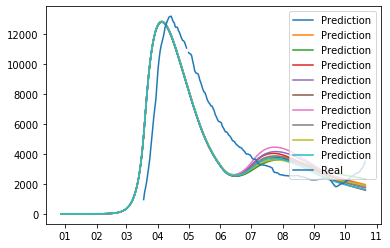

best_error: 6.442804538141253
vector: [6.337270425028377, 6.40921853290825, 5.982194551350771, 6.5271676402648415, 6.730151448748103, 6.466553129063517, 6.683000873189169, 6.478966238536628, 6.358719679573728, 6.454802862749145]
[7.51543301e+01 1.08147934e+00 6.98947856e-01 5.79549665e-01
 4.58998785e-02 2.33665349e-02 2.35954095e-01 5.79738181e-02
 6.90046833e-01]
best_error: 8.16528018536298
vector: [7.682132056520457, 8.066794727757156, 10.109514518870341, 7.978841411043121, 7.95782181475964, 8.068223681583714, 8.60905869999853, 7.723296445186449, 7.94402900821446, 7.513089489695924]
[8.62127791e+01 1.25970365e+00 1.07525547e+00 3.70108666e-01
 9.51250185e-01 1.54813855e-02 2.96097875e-01 1.36705792e-01
 7.30473790e-01]


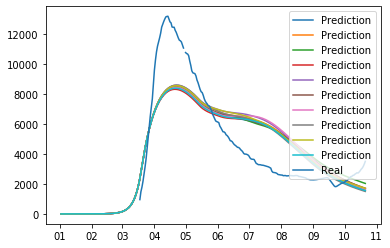

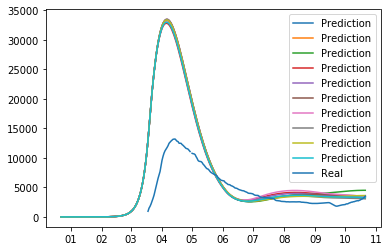

best_error: 7.9256812536953944
vector: [8.268929985113084, 8.537647340591061, 10.373097172336923, 6.23666811204224, 8.182673076599022, 7.722065488870946, 8.041217840178522, 6.582028971213968, 8.76559952833505, 6.546885021673122]
[6.03113693e+01 1.36782930e+00 6.39590624e-01 3.16768059e-01
 1.57037763e-02 2.50801335e-02 3.29280675e-01 1.21359560e-01
 8.43552393e-01]
best_error: 4.815270733842977
vector: [4.784592675753751, 4.633972562425357, 4.140890400540473, 5.286273410394043, 4.785936347284974, 4.911334690958101, 4.836743893558472, 5.049026069919821, 4.554930125756602, 5.16900716183819]
[7.34033553e+01 1.34049944e+00 7.10397648e-01 9.23087804e-01
 4.77757307e-02 1.33775610e-02 6.31262783e-01 1.36389034e-01
 6.67803825e-01]
best_error: 11.241962119872277
vector: [11.231938203257524, 11.375423690447118, 11.097083943478768, 10.978101162146274, 11.489057130000148, 11.180712571467067, 11.164491000972955, 11.42548569293361, 11.410406525576311, 11.066921278442994]
[7.90600675e+01 1.23331600

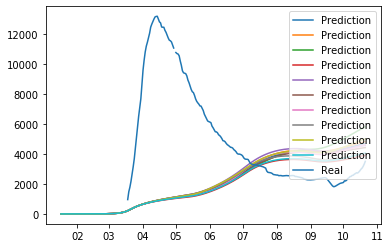

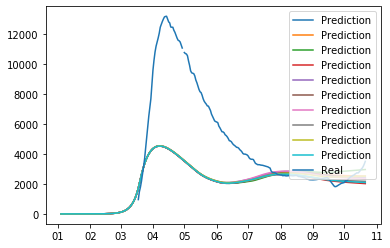

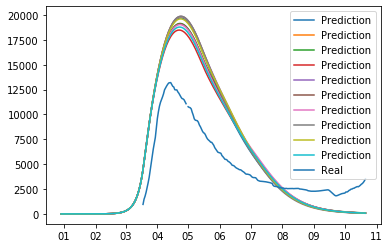

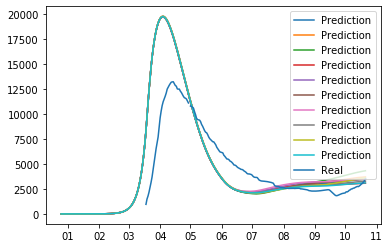

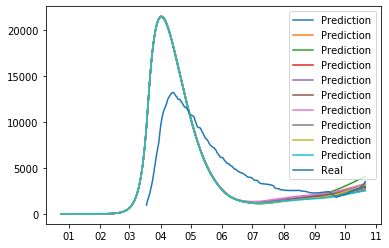

best_error: 5.092718872021978
vector: [4.857490255226855, 5.13046596753129, 7.099077150762277, 4.446414973322241, 4.670854445940588, 4.820242462264186, 5.21862130066855, 4.906180842654184, 5.221224008769205, 4.5566173130804]
[8.37739892e+01 1.41337310e+00 1.00031475e+00 4.41344579e-01
 2.84029304e-01 1.06763398e-03 4.00792459e-01 5.67528420e-02
 6.57702060e-01]


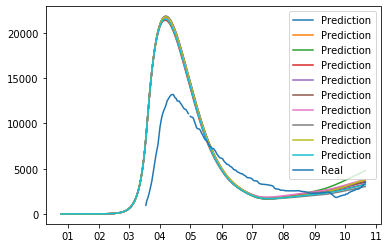

best_error: 7.6595258603223355
vector: [7.625643393853315, 7.373775105665906, 6.6406173167424285, 8.331943365672757, 7.520227986744661, 7.705497593613767, 7.560912873956569, 8.153851473465286, 7.42992847449837, 8.252861019010291]
[7.60067670e+01 1.76009403e+00 7.89660188e-01 7.03492187e-01
 7.81347211e-02 5.33624150e-02 5.43966507e-01 1.20894106e-02
 6.32420731e-01]


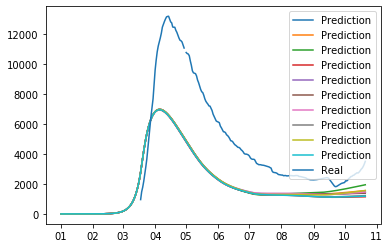

best_error: 8.877050753833407
vector: [8.904631197323951, 9.422845866993134, 10.909519741387784, 7.728029314022359, 8.976837842875815, 8.921393314833235, 8.870052073286285, 8.243288864689537, 9.025102423062664, 7.768806899859307]
[7.86834799e+01 1.21046884e+00 7.96135840e-01 9.19668902e-01
 4.55520830e-01 1.36011163e-02 5.10754969e-01 1.38761323e-01
 6.44640966e-01]
best_error: 6.213579671259506
vector: [6.337699626527865, 5.876869018074235, 4.9029965770051565, 6.950677054492241, 5.9601132230458305, 6.383211847637965, 5.662643612383226, 6.91281298390594, 6.064084086147098, 7.0846886833755045]
[8.38119080e+01 1.67763079e+00 9.41197004e-01 5.95462073e-01
 4.31416505e-01 4.16793769e-03 5.38619988e-01 1.11149888e-01
 7.79799055e-01]


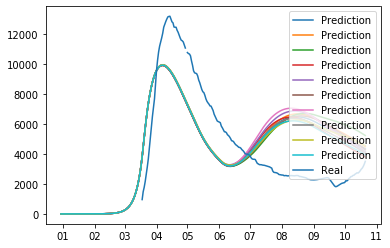

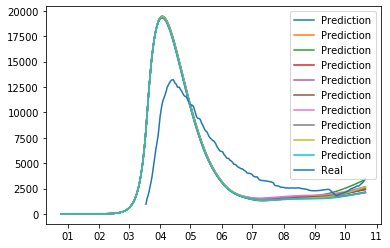

best_error: 4.449941715081553
vector: [4.2778105821543075, 4.110888229529536, 4.614484983715601, 4.992627254261913, 4.263602170840892, 4.4595722572007, 4.303183355390777, 4.687470422821677, 3.962680277478251, 4.827097617421877]
[7.16588422e+01 1.51723032e+00 6.99872678e-01 7.27971170e-01
 1.65458645e-01 6.47646763e-02 5.74356053e-01 1.47476883e-01
 8.53903889e-01]


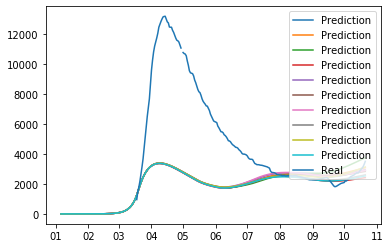

best_error: 4.442689743662152
vector: [4.401385755717872, 4.277198098894781, 3.8053924717227776, 4.841156989374725, 4.441257516422505, 4.497677021692466, 4.474530025997618, 4.691154832315944, 4.227025546673114, 4.770119177809719]
[7.77122162e+01 1.23307718e+00 7.32688114e-01 7.43305090e-01
 9.14085795e-02 2.35760714e-02 4.02653987e-01 1.65973532e-01
 6.39982800e-01]


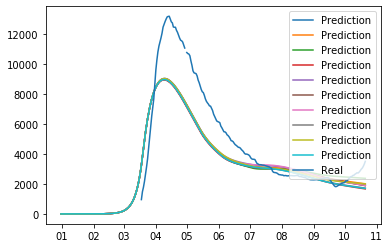

best_error: 6.158161828019352
vector: [5.961218813071805, 5.774377596532934, 6.182021315302794, 6.6288827336734135, 5.980678441972419, 5.988875586014869, 5.947650663328429, 6.633118015224026, 5.8830280118612155, 6.601767103211614]
[8.45095679e+01 1.04610654e+00 9.95460855e-01 8.06309355e-01
 6.33237691e-02 1.14587984e-02 2.76307991e-01 5.94970379e-02
 8.17082057e-01]


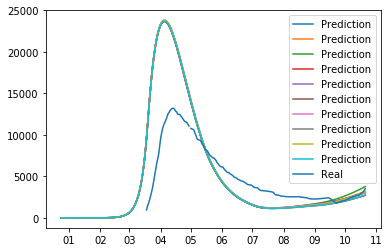

best_error: 4.048912352332334
vector: [3.8587262945004746, 3.675575231292398, 4.062363196839987, 4.6442407229672416, 3.861209580427434, 3.9583454445308206, 3.8803937197810896, 4.474268834114615, 3.6340855779305823, 4.439914920938692]
[8.13245832e+01 1.37825086e+00 8.65721329e-01 7.98280061e-01
 1.08209506e-01 2.20951691e-02 7.92261435e-01 1.14706387e-01
 9.09393016e-01]


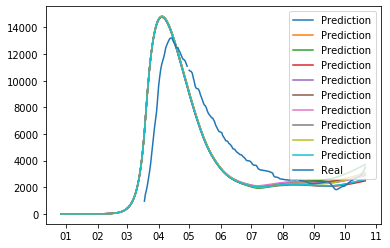

best_error: 4.931026939712813
vector: [4.733009488914568, 4.694749990523015, 6.50228561374869, 4.570087134367364, 5.0051022658167135, 4.86181737327267, 4.7552511525019625, 5.212890542874314, 4.394136625334886, 4.58093920977394]
[8.21532088e+01 1.55225643e+00 1.03061189e+00 1.96566526e-01
 2.31196498e-01 6.72920341e-02 7.93834311e-01 1.09841534e-01
 6.91338159e-01]


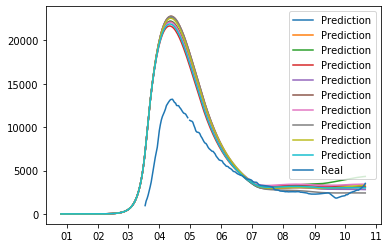

best_error: 5.867012842527688
vector: [5.5845180967385275, 5.637666368217934, 5.982325135991553, 6.188114677617191, 6.25653438068746, 5.760549760182424, 6.5493713244469784, 5.77611445930827, 5.251689921388117, 5.6832443006984334]
[7.88968125e+01 1.39615988e+00 7.80126796e-01 4.82477242e-01
 4.58468036e-01 2.36339853e-02 3.71148456e-01 1.29063776e-01
 7.85439255e-01]


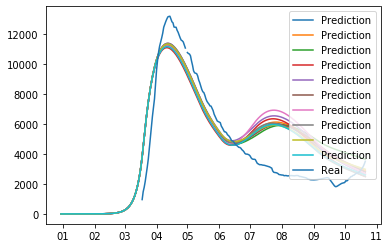

best_error: 4.4968986904174235
vector: [4.238333869032612, 4.686992657614705, 6.0764289436473895, 4.3365612552011985, 4.379839050696834, 4.160511252165477, 4.236585763512279, 4.066540469254457, 4.546140690990469, 4.241052952058814]
[7.24782188e+01 1.42764265e+00 7.31960459e-01 8.48938528e-01
 1.66710855e-01 1.84470769e-03 4.12720884e-01 1.54919225e-01
 6.59131891e-01]
best_error: 6.0080401751629715
vector: [5.949584860956212, 5.627567131283517, 4.814002986645127, 6.895343557702815, 5.816116864162366, 6.031002205690752, 5.9275757091154535, 6.5817383222773485, 5.693934220717083, 6.74353589307904]
[7.34780550e+01 1.58092761e+00 7.59392310e-01 8.34490556e-01
 3.83523153e-02 9.15316164e-02 5.49668382e-01 1.61721272e-01
 6.69535380e-01]


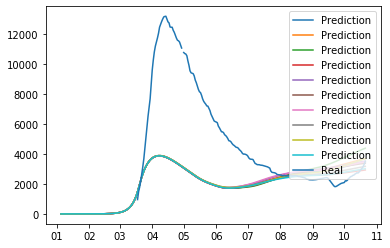

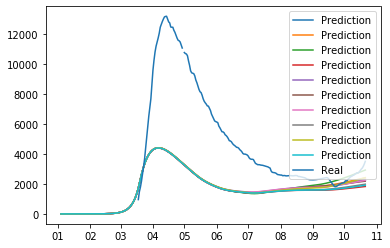

best_error: 4.180979866853074
vector: [3.857830537447192, 4.409170268065391, 5.738094864471147, 4.071071362081192, 4.038477558014341, 3.9114507098945293, 3.9563204351780614, 3.8012207174330648, 4.071251704109581, 3.954910511836254]
[8.01365219e+01 1.39927802e+00 8.49115414e-01 9.35372063e-01
 3.31876275e-01 7.84179462e-03 6.54331564e-01 1.50856050e-01
 6.54140635e-01]


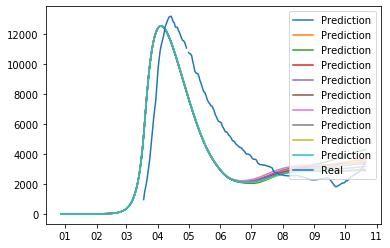

best_error: 4.5484960173407725
vector: [4.253138733298371, 4.309979716245843, 5.667898808137129, 4.748382606190805, 4.548596773229738, 4.435989992155472, 4.696257634348349, 4.427606224926565, 3.909153452318475, 4.487956232556979]
[7.62991908e+01 1.52215361e+00 7.56527774e-01 8.19710875e-01
 4.23234905e-01 3.83312852e-02 4.38424404e-01 7.60422729e-02
 6.16546816e-01]


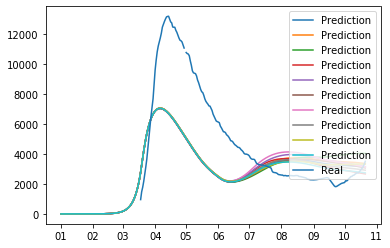

best_error: 4.923242549713558
vector: [4.808873596477193, 4.503893297440484, 5.40850118041336, 5.429543081143838, 4.572605580763229, 4.908453829588755, 4.587809532866389, 5.025789949866114, 4.585369178878505, 5.401586269697718]
[7.02342139e+01 1.48451290e+00 7.12704066e-01 9.63839702e-01
 2.89445394e-01 5.03722506e-02 3.01603497e-01 7.18736579e-02
 7.26262607e-01]


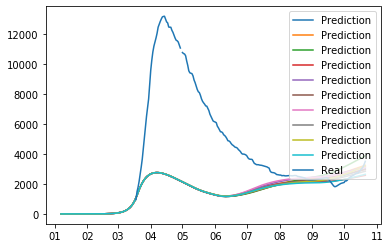

best_error: 4.718423624599394
vector: [4.591152268776259, 4.5338541787276405, 3.727850350839425, 5.210880171257744, 4.79590969563824, 4.740069280684098, 4.645362356054256, 5.303540767185853, 4.478160741037858, 5.15745643579256]
[7.52657894e+01 1.58292068e+00 7.28678756e-01 3.41739876e-01
 4.16730764e-02 7.79938895e-02 1.09041499e-01 1.21593784e-01
 7.21743439e-01]


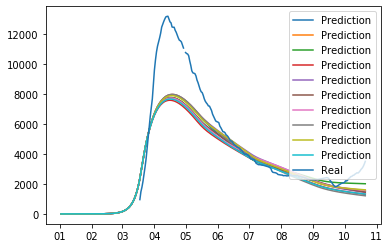

best_error: 5.694715155328889
vector: [5.664167442761917, 5.172647048563082, 4.940312766019353, 6.596181486728268, 5.359969390248217, 5.741989383833234, 5.335722453996088, 6.18569309470217, 5.378466995257094, 6.572001491179469]
[8.05614825e+01 1.73265222e+00 9.26404130e-01 8.44444869e-01
 2.39801560e-01 2.27653430e-03 4.27139134e-01 1.99773168e-01
 6.05742877e-01]


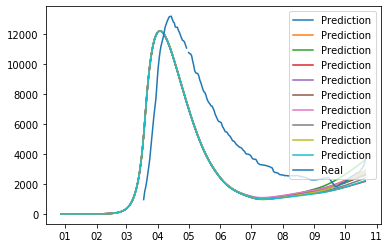

best_error: 5.663657820984929
vector: [5.648632933942396, 5.30886177983061, 4.651226971358497, 6.40254164984999, 5.49025148403962, 5.66700255722828, 5.553594735777297, 6.098515253735609, 5.500136700654495, 6.315814143432495]
[7.94037455e+01 1.43202486e+00 8.35357295e-01 9.78114567e-01
 1.29695525e-01 6.69476153e-02 5.98725553e-01 1.24849862e-01
 5.23440617e-01]


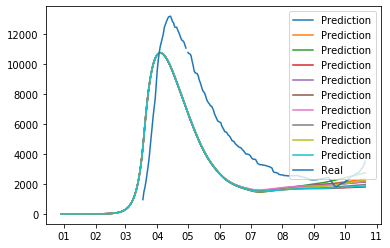

best_error: 4.7070917969205315
vector: [4.787450108593191, 5.109401635049204, 6.516272220128418, 3.8181032128212724, 4.723329304643516, 4.7407263271521725, 4.8277098087815205, 3.911343879386508, 4.822306615129817, 3.8142748575196914]
[7.96248602e+01 1.17387141e+00 8.12796674e-01 7.56339630e-01
 2.72762538e-01 2.88220839e-03 3.50004718e-01 1.29524319e-01
 7.05261771e-01]


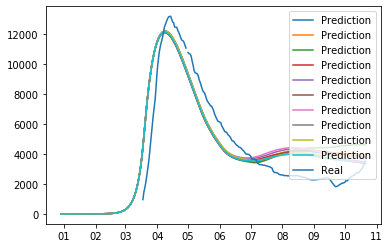

best_error: 5.781765439687602
vector: [5.764011277962888, 5.417290144747265, 4.638937939715035, 6.605263250886873, 5.608934454338054, 5.764063532588123, 5.719336055960981, 6.278960404728327, 5.5675942804332905, 6.453263055515182]
[7.79183065e+01 1.52678421e+00 8.08697705e-01 9.73824240e-01
 8.73836338e-02 7.69871199e-02 6.19579586e-01 1.43718832e-01
 7.27524705e-01]


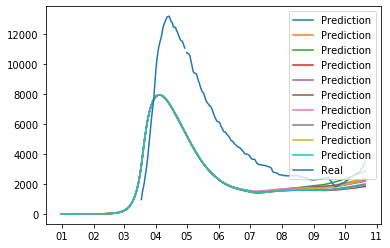

best_error: 5.060590903235393
vector: [5.016597181441373, 4.944431045604157, 4.3881485994955325, 5.435369967592885, 5.19169997368639, 5.179233691316368, 5.3463057391020765, 5.114178090710936, 4.719948620234305, 5.269996123169913]
[8.12735158e+01 1.43419171e+00 8.40801009e-01 9.61872846e-01
 4.57288067e-01 6.30095472e-03 7.68213690e-01 1.43188598e-01
 5.75646956e-01]


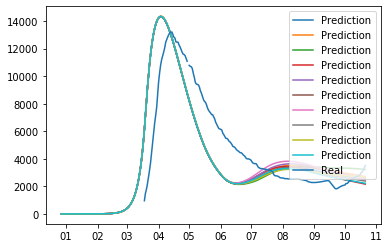

best_error: 5.691647609821607
vector: [5.648036905609229, 5.577168014171559, 5.125546087757253, 5.858969762418182, 5.79658128947945, 5.667915161029882, 5.668392162203562, 6.045583579672078, 5.628808067599321, 5.899475068275558]
[8.45095679e+01 8.43988751e-01 9.95460855e-01 7.82489458e-01
 1.07236077e-01 3.07496380e-02 6.70196431e-01 4.65954252e-02
 8.30147005e-01]


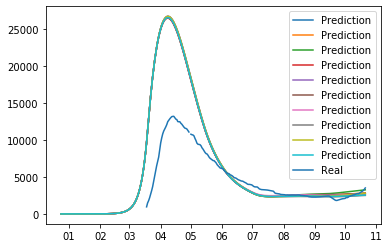

best_error: 4.089288773394446
vector: [3.891795834869276, 3.9131437075756397, 4.894092398020203, 4.174900082645694, 4.12236474920042, 3.998862705574107, 4.218655966874664, 3.9909421055832786, 3.6578797714206868, 4.0302504121804885]
[8.19731034e+01 1.00346621e+00 8.35580653e-01 9.00225266e-01
 2.96840266e-01 3.90896204e-02 4.43117682e-01 1.91724552e-01
 8.00439154e-01]


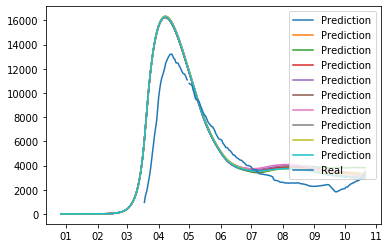

best_error: 2.9920596689896
vector: [2.6580943678644413, 2.437930033996426, 4.30880520808908, 3.365826843406506, 2.616748883840022, 2.877821116493405, 2.3666098692732267, 3.566225602263824, 2.3901597970242277, 3.3323749676448373]
[7.96855809e+01 1.75503294e+00 8.68456680e-01 3.70108666e-01
 2.12973560e-01 4.83355420e-03 3.48577166e-01 1.04873393e-01
 8.13925386e-01]


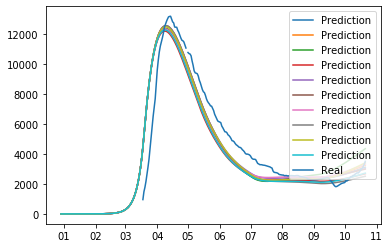

best_error: 3.6922775417742897
vector: [3.595670720606159, 3.373664862317198, 2.458855708149784, 4.390589186811074, 3.706091639764914, 3.927978531089809, 3.4376357082037106, 4.534142963723475, 3.168716614605451, 4.329429482471326]
[7.41466869e+01 1.98444449e+00 7.80053122e-01 2.43684238e-01
 1.00021190e-01 7.26070887e-02 3.25785798e-01 1.28848030e-01
 6.27458901e-01]


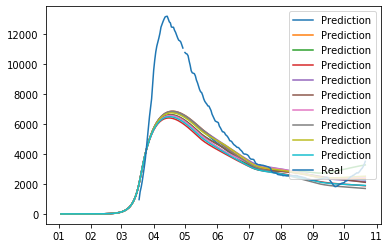

best_error: 4.1359834921422385
vector: [4.215168992356197, 4.456507815264686, 6.307691531541403, 3.1724994303835734, 3.9956034960450335, 4.049034207360783, 4.208467617928836, 3.1199363671987985, 4.533810010204368, 3.301115453138709]
[8.01022539e+01 1.39026291e+00 8.95096407e-01 5.99060474e-01
 5.35175482e-02 8.27542262e-02 3.33246403e-01 1.35465494e-01
 7.74664183e-01]


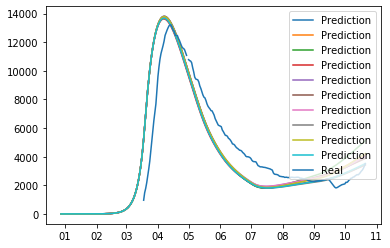

best_error: 4.327778861250586
vector: [3.793855480931959, 4.347259938952094, 6.486327481902741, 4.262760485601605, 3.8607537634686824, 3.877676758762284, 4.124828387453915, 4.019752499546183, 4.33247309548767, 4.172100720398733]
[7.35549692e+01 1.95952980e+00 7.76488262e-01 4.74928786e-01
 2.75967084e-01 5.52291575e-02 5.13612981e-01 1.77455418e-01
 6.80514136e-01]


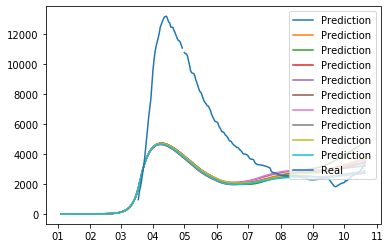

best_error: 4.256517971079045
vector: [4.2525521246657085, 3.937241176072404, 3.702668406962323, 4.794941626517112, 4.030080398270988, 4.362373448866786, 3.9053149042742, 4.67222337185699, 4.023117169657091, 4.884667083646844]
[8.15446265e+01 1.51208617e+00 8.51378576e-01 6.42157468e-01
 4.17931689e-01 2.61606140e-02 1.94246211e-01 1.32545498e-01
 7.70492474e-01]


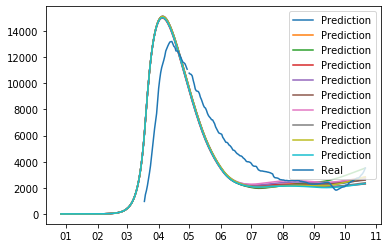

best_error: 3.434100485445589
vector: [2.996843535188848, 3.209044200148753, 5.535010486796618, 3.449798002863306, 2.6724114737098175, 2.838724198258259, 3.231002001412569, 3.5519128874941392, 3.5212499041175067, 3.335008164466072]
[7.87628406e+01 1.82291152e+00 8.78912603e-01 3.89108298e-01
 8.15572582e-02 2.74557451e-03 4.78440292e-01 1.16997152e-01
 7.65276989e-01]
best_error: 3.1801712064944043
vector: [3.066806458413406, 3.1637969116788502, 5.930736470903406, 2.3160347971579918, 2.671996122234887, 2.9913848028020222, 3.6368087662640383, 2.1990880747463373, 3.5243656295692163, 2.3006940311738875]
[79.37009848  1.68631839  0.88638989  0.3099449   0.19428101  0.09508342
  0.53309354  0.12231493  0.87714358]


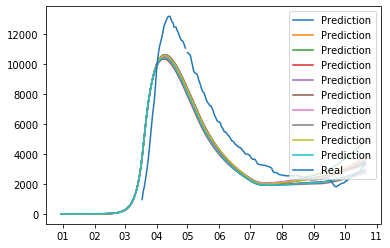

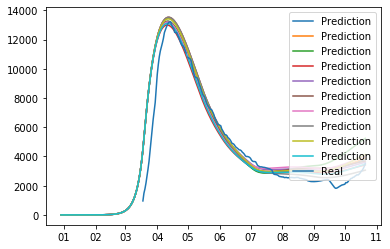

best_error: 2.7780889551892174
vector: [2.5162050294894645, 2.639437860270086, 4.92296048986599, 2.519243212590448, 2.150459755030449, 2.3742805925771036, 2.843944219451668, 2.5395531499841617, 2.852985075694459, 2.4218201669383443]
[7.80784122e+01 1.60663673e+00 8.59195004e-01 3.76597899e-01
 9.05455506e-02 5.15707889e-02 2.86246693e-01 1.08323760e-01
 7.21974020e-01]


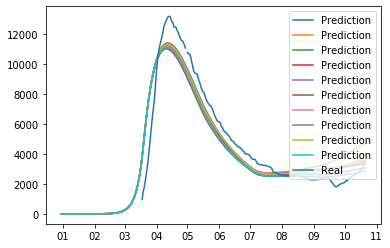

best_error: 3.833128937316662
vector: [3.8464665928560495, 3.69856712451936, 2.684419814104599, 4.246533192515223, 3.914446257022262, 3.846341505188771, 3.5233039779931867, 4.8131785414906, 3.4992704902394243, 4.258761877237147]
[8.01469798e+01 1.59088521e+00 8.74560092e-01 3.53424605e-01
 1.13474889e-01 4.08900812e-02 6.62364311e-01 8.85102311e-02
 7.27727093e-01]


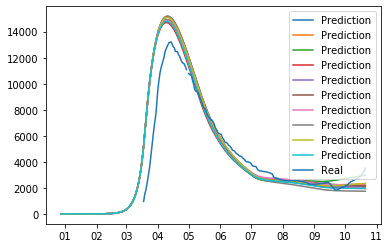

best_error: 2.9595361302289063
vector: [2.8805662052719727, 2.6964519567145673, 2.3088430654235936, 3.429472745022451, 2.9298480377672576, 3.0811855940041677, 2.729020888905562, 3.6270121799628288, 2.5228540217306614, 3.3901066074859996]
[7.80433881e+01 1.56135194e+00 8.40465297e-01 3.80493574e-01
 3.87618610e-02 9.51156777e-02 3.68780714e-01 5.38805175e-02
 6.06100769e-01]


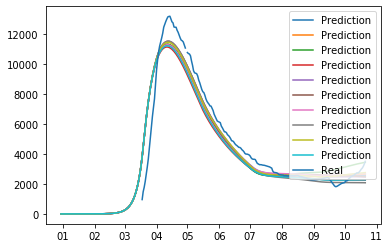

best_error: 3.113758472038112
vector: [2.8069463624763307, 2.920141341066991, 4.632175703622414, 2.946060650668816, 2.9988890134116994, 2.941698950960026, 2.988693569532585, 3.0812662967989963, 2.9169389201587195, 2.9047739116845435]
[8.06154180e+01 1.27906443e+00 8.86417996e-01 4.63132335e-01
 1.18135097e-01 4.21222268e-02 3.82511461e-01 1.61486542e-01
 6.52306966e-01]


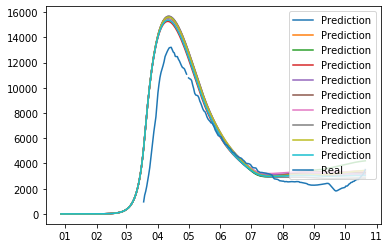

best_error: 5.385433382186916
vector: [5.193172678448268, 5.210185252044287, 6.394771025755984, 5.490793620807894, 5.194919256364536, 5.484296760968901, 5.202166468275055, 5.242454085379666, 4.988955223975757, 5.452619449848802]
[7.05313070e+01 1.59833839e+00 7.51817539e-01 9.19799436e-01
 3.05780278e-03 7.47492679e-02 9.04033844e-01 1.40790729e-01
 5.83756447e-01]


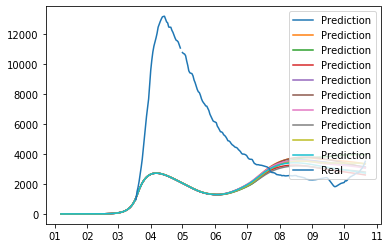

best_error: 3.9722718836290616
vector: [4.0050502971567346, 3.966903041631335, 3.048643075190024, 4.057111269766791, 4.220085811837711, 3.9965923460900536, 3.791084797382555, 4.755766578171293, 3.7907678699423837, 4.090713749121733]
[8.19765580e+01 1.32715139e+00 8.96440436e-01 3.75886750e-01
 1.74458615e-01 5.37609310e-02 5.06302195e-01 1.19077110e-01
 8.55171913e-01]


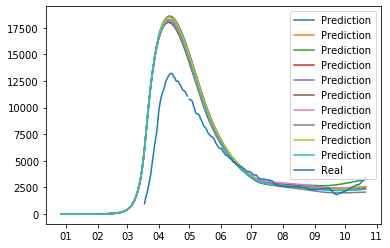

best_error: 4.424069423431147
vector: [4.409560909903434, 4.537480705460656, 3.411199132118223, 4.268392059539108, 4.921875684332328, 4.455370784754865, 4.203533565174494, 5.317375337076998, 4.386389645510558, 4.329516410440816]
[7.91468589e+01 1.42795783e+00 8.81082318e-01 2.29606119e-01
 8.39726888e-02 4.97732774e-02 2.51240833e-01 4.53031901e-02
 8.19407423e-01]
best_error: 4.027476640544387
vector: [4.009146654366431, 3.871466457842531, 3.3901491928822933, 4.4059497155034695, 4.050329622057364, 4.176640815927613, 4.036101950047159, 4.246674826262888, 3.7556334089544308, 4.332673761599693]
[7.82849386e+01 1.34049944e+00 7.93882698e-01 7.36709369e-01
 4.77757307e-02 7.26841563e-02 6.61328376e-01 2.18076371e-02
 5.32439812e-01]


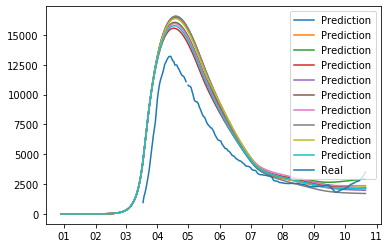

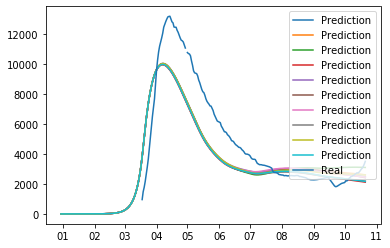

best_error: 3.3719385516844667
vector: [2.942474132256482, 3.3035338378069463, 4.9955814195835755, 3.4234331291044766, 3.028517079835593, 3.1471661373727144, 3.1592002827363075, 3.2243856886398947, 3.2195122061369794, 3.2755816033716973]
[7.91089183e+01 1.49586017e+00 8.21517587e-01 6.10636859e-01
 3.01635879e-01 4.17701935e-02 4.52895838e-01 1.49674270e-01
 8.10721071e-01]


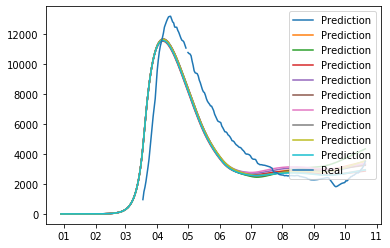

best_error: 3.252282942068039
vector: [3.1362226257802313, 2.954889390280381, 2.1832353829867914, 3.9691397623402347, 3.1781482882032748, 3.3761705058609226, 2.9936029403768, 4.118276661020034, 2.724785265960694, 3.8883585978710205]
[7.67251478e+01 1.69673470e+00 8.01739778e-01 3.41183306e-01
 5.06686608e-03 3.46936090e-02 1.67393500e-01 1.30762104e-01
 7.23269026e-01]
best_error: 5.043878531616656
vector: [4.9624400189211855, 4.9269336454001, 4.93110442745193, 5.063367886204549, 5.14889560931622, 4.9699693460189724, 4.956869349788768, 5.375697779562656, 4.966267473782609, 5.137239779719569]
[8.39017832e+01 8.56788568e-01 9.72772801e-01 6.78930786e-01
 2.16013862e-01 4.22067301e-03 9.85123013e-02 1.03010126e-01
 9.17568144e-01]


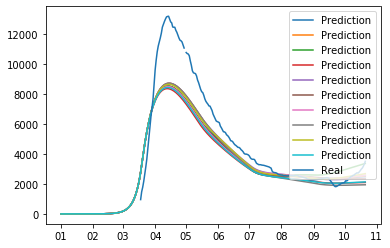

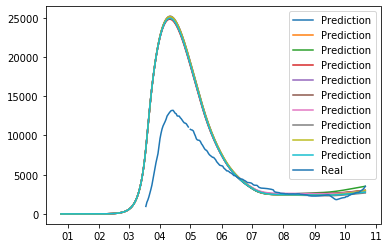

best_error: 2.9412655713469453
vector: [2.805925379501688, 2.8970195987143725, 5.633283762163417, 2.0709444975753253, 2.426618387533915, 2.6950521193990915, 3.348794612728905, 2.213491443294063, 3.2542551408215443, 2.06727077173713]
[7.93700985e+01 1.68631839e+00 8.86389891e-01 3.09944897e-01
 1.94281008e-01 9.50834170e-02 6.74371606e-02 1.22314930e-01
 8.77143585e-01]
best_error: 4.389582814456452
vector: [4.3240072773810745, 4.284424740856974, 3.6900624244853724, 4.728653194748249, 4.52210620249524, 4.436334577276593, 4.572351717331015, 4.590445869359824, 4.1417343780065154, 4.605707762623661]
[78.54215934  1.26957171  0.7471418   0.60713066  0.16254418  0.09228702
  0.54815348  0.10962357  0.85429742]


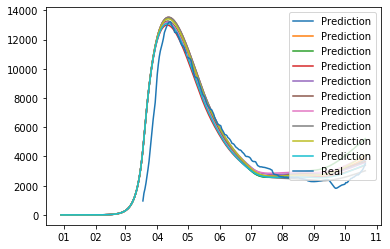

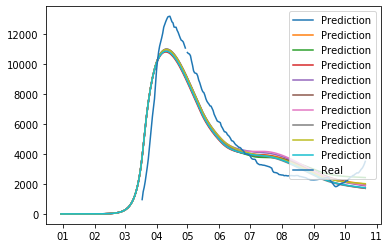

best_error: 2.7807032815651853
vector: [2.5177211053037283, 2.3919618537678042, 3.5455542866136405, 3.197787259248708, 2.54454731629485, 2.7004015135669794, 2.4964288674516224, 3.18471783626525, 2.1774105948008007, 3.0505021823384686]
[7.86867965e+01 1.46028916e+00 8.05565503e-01 5.20710922e-01
 8.90675782e-02 6.02672717e-02 4.25249474e-01 1.10850842e-01
 9.32916327e-01]


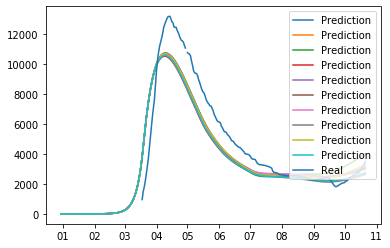

best_error: 2.7922418215841716
vector: [2.578497219859488, 2.3767910672482317, 3.7759258883087394, 3.030368293951059, 2.6716634378081765, 2.8307663981699047, 2.4907154539084564, 3.022423814126185, 2.2010551324634293, 2.944211509998044]
[7.83993857e+01 1.63929263e+00 8.46145285e-01 3.56959682e-01
 1.71844627e-01 7.34839790e-02 6.18723949e-02 1.39321151e-01
 5.90109228e-01]


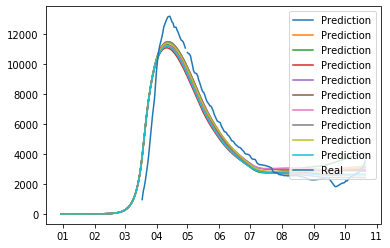

best_error: 3.392919571954941
vector: [3.1791255488497865, 3.1781994100617554, 3.9704573785043156, 3.2699719932331015, 3.751753636628726, 3.4251879336075612, 3.1170534897645137, 3.9146563074681096, 2.975378847540706, 3.1474111738908377]
[7.84718628e+01 1.85707790e+00 8.78371392e-01 1.68409509e-01
 2.56022186e-01 5.16073847e-02 1.79376287e-01 5.94770496e-02
 7.46126942e-01]


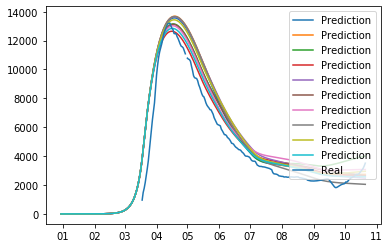

best_error: 3.2048469294870165
vector: [2.938395262685634, 3.1162837273345687, 5.023352158260984, 2.8718390743681272, 2.996241905495672, 2.943189817290633, 3.3665019940919043, 2.8961301083477293, 3.1989254023629314, 2.697609844631987]
[7.91089183e+01 1.38742915e+00 8.49533044e-01 4.14378784e-01
 2.20249663e-01 2.46376679e-02 3.32214536e-01 1.32624743e-01
 8.10721071e-01]


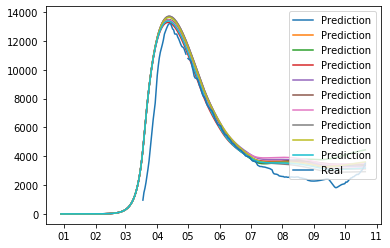

best_error: 4.020895532401426
vector: [3.9613464421613873, 3.835086215215059, 3.126188256440223, 4.424456863080445, 4.223969334352017, 4.183201108591747, 4.115614650235656, 4.351738867738038, 3.697117887574907, 4.290235698624789]
[7.53486067e+01 1.63929263e+00 7.47393821e-01 3.56959682e-01
 1.86419800e-01 7.34839790e-02 2.14415750e-01 1.54383519e-01
 6.67932005e-01]


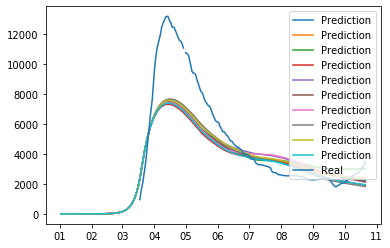

best_error: 3.3915543483679054
vector: [3.435534766390592, 3.5902097869602487, 5.720049329532387, 2.583000704237282, 3.1186269016376844, 3.2120115901007606, 3.507147450755528, 2.5171343873726375, 3.7805666307301333, 2.451261935961795]
[7.79162289e+01 1.54522157e+00 8.28802563e-01 4.66236791e-01
 2.90799698e-02 6.51827370e-02 3.45167305e-01 1.09990828e-01
 8.02272830e-01]


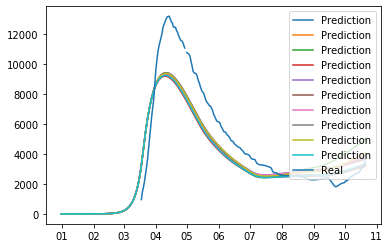

best_error: 2.969472837017135
vector: [2.753165077862736, 2.5628453731436327, 3.934780569679576, 3.2046188680097503, 2.8567316169416035, 3.0378839060565945, 2.678540752663787, 3.1716386939662744, 2.3849405944637025, 3.109582917383692]
[7.64747651e+01 1.65919704e+00 8.11555260e-01 3.48299248e-01
 5.38252420e-02 3.79883424e-02 4.07256372e-01 5.38805175e-02
 6.34189039e-01]


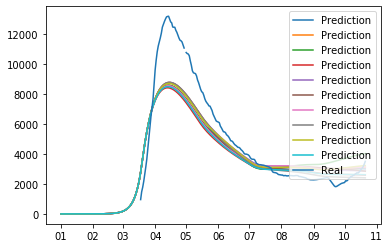

best_error: 4.099762780146422
vector: [3.877396987456949, 4.129948562952668, 6.3297249727125955, 3.4767814592677873, 3.6342630279098636, 3.7096222516326134, 4.210214305239004, 3.7981447655750786, 4.33557785749563, 3.4959536112220304]
[8.13245832e+01 1.58686424e+00 9.49158977e-01 4.16861029e-01
 1.68910050e-01 2.20951691e-02 1.10427955e-01 6.90562157e-02
 7.10271659e-01]


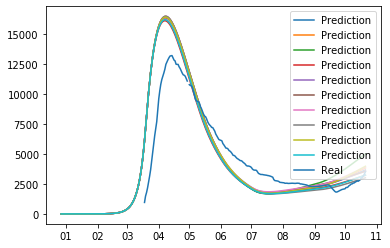

best_error: 4.0274688147486675
vector: [3.6507091103583726, 3.9111148909946536, 6.294926503998694, 3.84358245489159, 3.4427340020224673, 3.3497316038246363, 3.891027079669078, 3.894808681550461, 4.3015244193594375, 3.6945294008172835]
[7.93885490e+01 1.90589115e+00 8.93861856e-01 4.19535059e-01
 1.88412983e-01 3.37566872e-02 4.80089649e-01 5.04221578e-02
 8.91343603e-01]


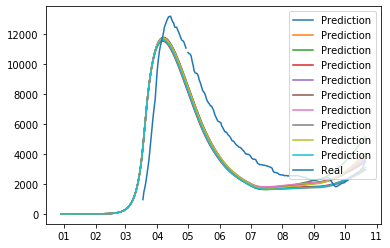

best_error: 2.8991655266672853
vector: [2.651533979795593, 2.6732666214433136, 5.726662524984614, 2.365348911098462, 2.101208600907821, 2.3532322539912074, 3.235037584669392, 2.4629276283529458, 3.2010102299234187, 2.221426931506089]
[7.67991877e+01 1.93855008e+00 8.48721300e-01 2.43684238e-01
 1.00021190e-01 7.65643420e-02 1.67370820e-01 1.28848030e-01
 7.94270904e-01]


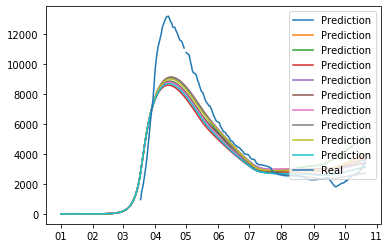

best_error: 3.8816251844613374
vector: [3.4445917380909, 3.7556757270019157, 5.480235586577807, 4.056522971851994, 3.546861155070009, 3.6745069706074838, 3.5871503583214825, 3.759182888377274, 3.6701141437192133, 3.841410304995298]
[7.50303367e+01 1.69578032e+00 7.53878991e-01 6.41474868e-01
 3.30509492e-01 4.83423492e-02 5.37737695e-01 1.34449173e-01
 8.66680187e-01]


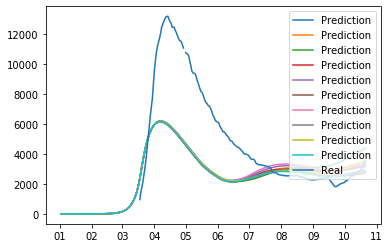

best_error: 3.453875245022264
vector: [3.4574127636699936, 3.313757873288303, 2.2856113026733693, 3.8591534194137913, 3.6227501801615767, 3.5544402657564964, 3.3314459026833236, 4.207884254361316, 3.0923903268417012, 3.8139061613727665]
[7.90427812e+01 1.74335991e+00 8.35580653e-01 2.94202209e-01
 2.96840266e-01 6.45742429e-02 4.43117682e-01 8.48359040e-02
 7.77751592e-01]


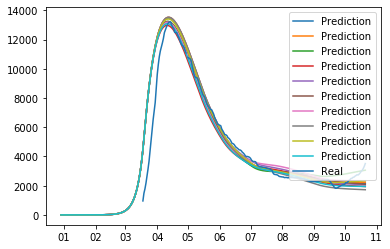

best_error: 3.513017931574079
vector: [3.2309938681783077, 3.4369569222146445, 5.1404353577028745, 3.4877232025101943, 3.034011407980703, 3.083444549334126, 3.266335282035989, 3.483102237547432, 3.553509724347124, 3.413666763889396]
[8.01499415e+01 1.43039243e+00 8.82500433e-01 5.65935405e-01
 9.88035188e-02 6.61559416e-02 1.99677378e-01 1.77455418e-01
 7.98000676e-01]


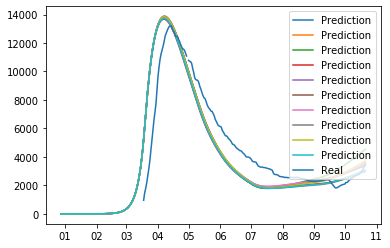

best_error: 3.1535942480944272
vector: [2.9601812480398766, 2.7789049725517336, 3.1432855694949513, 3.668665203669385, 3.0537779573164894, 3.251060762857133, 2.868516724391875, 3.7224707412446647, 2.542336627668366, 3.546742673709797]
[75.32829568  1.78815848  0.78071672  0.31864634  0.10223745  0.080343
  0.10947688  0.18927032  0.80944039]


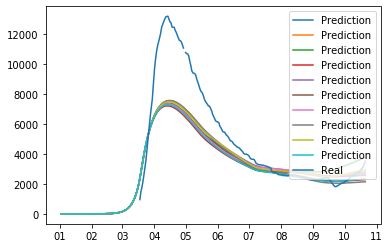

best_error: 3.8587058198482813
vector: [3.738586415027847, 3.566119972610654, 4.502457946969029, 3.9679708349168976, 3.754385335688174, 3.7182112664764944, 3.1928734150341045, 4.73153351370493, 3.324283381818325, 4.090636116236363]
[8.17742997e+01 1.57620805e+00 9.51622619e-01 3.34800256e-01
 1.52979670e-01 3.93980326e-02 3.09565151e-02 5.64986545e-02
 5.47034537e-01]


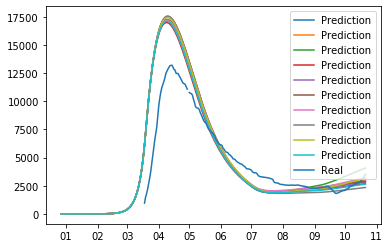

best_error: 3.0903220051925233
vector: [2.7519760573726444, 2.5652797615211202, 3.892784475845623, 3.686454613766451, 2.758472445580284, 3.0300077629618767, 2.6094358477610875, 3.7626168243987985, 2.297902105934374, 3.548290156782972]
[7.66026792e+01 1.74938038e+00 8.13256398e-01 3.70108666e-01
 2.51742555e-02 9.51007459e-02 3.13375679e-01 1.00836984e-01
 8.13925386e-01]
best_error: 2.756298777949897
vector: [2.457495079159153, 2.5521061845544013, 4.534522826070483, 2.760793645831684, 2.2047251221892283, 2.379110408241031, 2.5173886173087805, 2.7796920653460395, 2.7837602496259333, 2.59339358117224]
[7.82953044e+01 1.54522157e+00 8.28802563e-01 4.66236791e-01
 5.93962466e-02 6.51827370e-02 5.32142106e-01 9.74241076e-02
 9.23703959e-01]


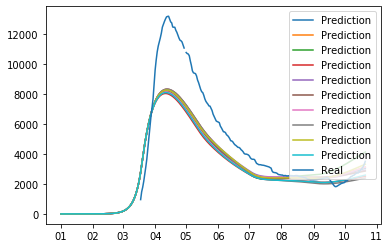

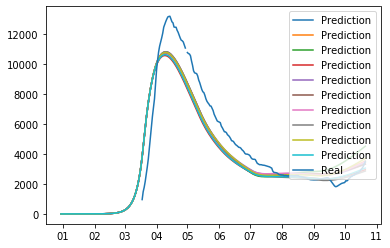

best_error: 3.6676849146455517
vector: [3.3135370410558025, 3.6264025871949714, 5.398243200667339, 3.761799549504029, 3.153027532470076, 3.237769272044571, 3.260252620915898, 3.6148898921118118, 3.7267420535203577, 3.5841853969706623]
[7.83993857e+01 1.63929263e+00 8.46145285e-01 6.07156886e-01
 8.54860485e-02 4.29906549e-02 6.80935241e-01 1.15025998e-01
 7.93838922e-01]


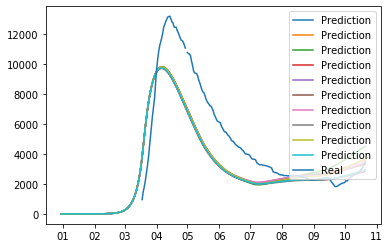

best_error: 3.085333983048603
vector: [2.78419570154275, 2.920305040212809, 5.511384009965915, 2.7971585554516274, 2.3390570693095714, 2.4840392324316625, 3.141346383950716, 2.9068094530536337, 3.2641092839153005, 2.7049351006520403]
[7.78648428e+01 1.82567730e+00 8.63053171e-01 3.23847119e-01
 7.36442689e-02 6.86668425e-02 1.18326466e-02 1.33514759e-01
 7.10352706e-01]


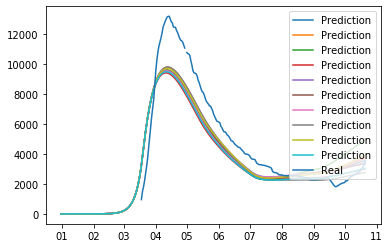

best_error: 3.120738727599277
vector: [3.0010496000942526, 2.9006061966881203, 2.3833392883155895, 3.727306922781505, 3.0571535415162994, 3.1636478693044827, 3.0581654547350445, 3.6528558652007956, 2.698967233451218, 3.5642953039054603]
[7.67248397e+01 1.39501903e+00 7.45504761e-01 5.41588914e-01
 2.91760295e-02 7.24533097e-02 1.99677378e-01 1.77455418e-01
 9.69591644e-01]


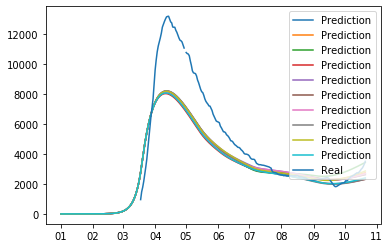

best_error: 2.6040918300413067
vector: [2.3396808335873422, 2.37797983452698, 2.077232013942899, 3.1202405391257377, 2.6665946897994544, 2.5937748165176187, 2.232739422462595, 3.6379458213561575, 2.0236129912786343, 2.9711173378156506]
[7.68218025e+01 1.74044652e+00 7.97261453e-01 2.61416326e-01
 7.38969629e-03 5.82132858e-03 9.81829305e-02 4.52812852e-02
 9.80131517e-01]


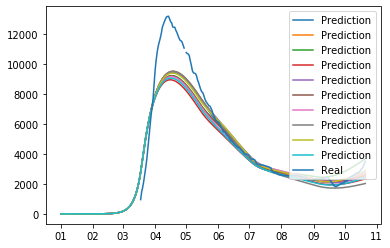

best_error: 3.1120246518001764
vector: [2.9532508340618264, 2.8805972890183695, 3.9156476972100513, 3.19952387276099, 3.072020430159749, 3.1039722963591636, 3.064662504774285, 3.06855364595278, 2.727191650975408, 3.1348262967291456]
[7.96422498e+01 1.09502559e+00 8.19751876e-01 7.61600263e-01
 1.82722815e-02 8.15514497e-02 3.98075908e-01 8.99416579e-02
 6.12847968e-01]


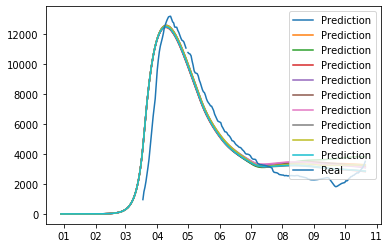

best_error: 2.647455634372135
vector: [2.2272601813430875, 2.2817795001094567, 4.647999036119247, 2.6560572081182627, 1.948994220612379, 2.1727153330511357, 2.4778385010443627, 2.8794521022953297, 2.65352176523912, 2.528938495788975]
[7.88664691e+01 1.71111729e+00 8.49745769e-01 3.53424605e-01
 1.13474889e-01 2.66982304e-02 3.37194269e-01 1.14414834e-01
 9.15307567e-01]


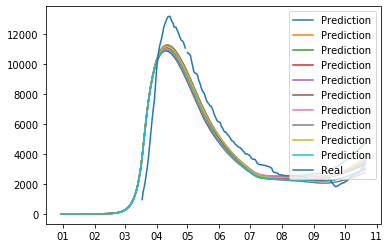

best_error: 2.9950496011929943
vector: [2.720246451323667, 2.8063539198229295, 4.183504696930413, 2.7769226949992216, 3.221881198917017, 2.931202886353584, 2.686616105212267, 3.3823187060809916, 2.5730594699418723, 2.66838988234798]
[7.84982366e+01 1.58302392e+00 8.59034346e-01 2.35615349e-01
 1.21583776e-01 1.22682802e-02 4.10929957e-01 1.31874378e-01
 9.49169899e-01]


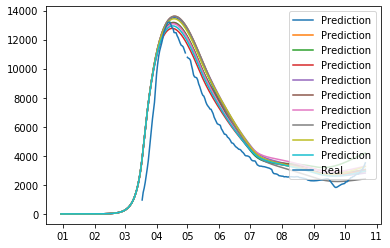

best_error: 2.5948488630133437
vector: [2.2708959043419625, 2.354418689503165, 4.0059980863914255, 2.410262981048591, 2.778120809479102, 2.4602162203905324, 2.25158853478343, 3.1220522079390682, 2.050141435393313, 2.2447937608628434]
[78.89443811  1.68631839  0.85022168  0.22506396  0.19428101  0.09508342
  0.0919155   0.12231493  0.98580039]


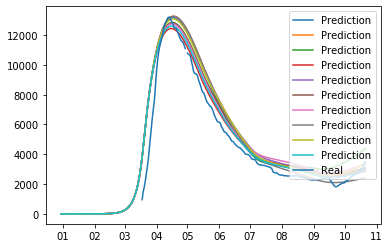

best_error: 2.5020226963528467
vector: [2.290325626991346, 2.300443741138074, 3.144411161410343, 2.4804716520990135, 2.657943164731059, 2.471057159024915, 2.244524668229968, 2.9297669683335164, 2.107578035652688, 2.3937047859175427]
[7.89220689e+01 1.50468744e+00 8.41098194e-01 3.12485427e-01
 8.39712085e-02 4.88149021e-02 1.32617453e-01 8.85420329e-02
 8.81634471e-01]
best_error: 2.54757892188519
vector: [2.351891094995723, 2.2346444247247423, 2.750623436649622, 2.9182723324144506, 2.473783471540096, 2.580773821520096, 2.285729480642939, 3.09201866558914, 1.9938979208675418, 2.7941545699075494]
[7.73820697e+01 1.59717488e+00 8.09620764e-01 3.47588994e-01
 6.59611829e-02 4.90048062e-02 1.70244916e-01 5.01270162e-02
 8.72983802e-01]
best_error: 2.528993444105924
vector: [2.1110121705096514, 2.173321645114704, 4.033915689575323, 2.7208535847602575, 2.1708789036796703, 2.3039562519080805, 2.1701496536931635, 2.6895899429810064, 2.390773261086581, 2.525483337750801]
[7.74839210e+01 1.49539

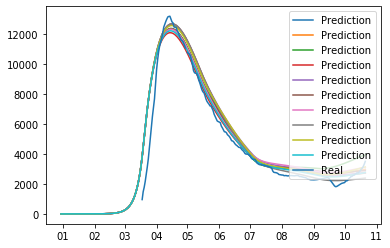

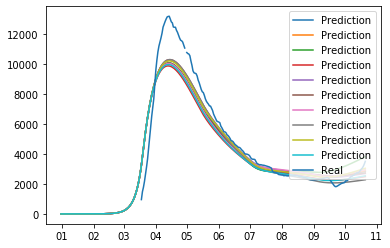

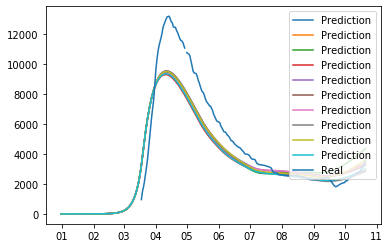

best_error: 3.041211224203933
vector: [2.629595919601168, 2.5574454904901387, 4.835585577176362, 2.9050905903459396, 2.99872526650479, 3.026120469420896, 2.8401406554147286, 3.090975579970464, 2.7215679970609554, 2.8068646960538888]
[7.60942726e+01 1.80761944e+00 8.40407970e-01 2.27116437e-01
 6.69717237e-02 3.64585847e-02 5.35147730e-01 1.89407327e-01
 7.34563473e-01]


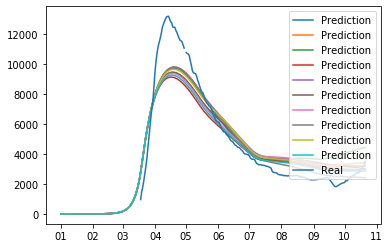

best_error: 3.2483704759259213
vector: [3.1411217786903736, 3.1098035039566754, 2.1143696282618647, 3.745032527114337, 3.4033028605889055, 3.3427781885935723, 3.1976374091070676, 3.939648390069215, 2.884602620117576, 3.605407852759619]
[7.76777819e+01 1.62196110e+00 7.84808278e-01 3.40406105e-01
 6.25500235e-02 1.12822882e-02 6.02645583e-01 4.27467511e-02
 9.59127470e-01]


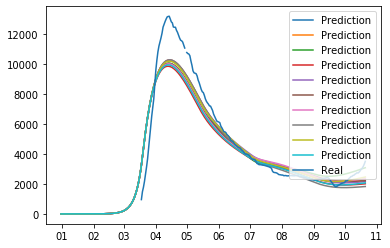

best_error: 2.9057106856579864
vector: [2.6195707288272, 2.480270542134186, 3.3275882112507604, 3.4754302377480792, 2.643320921052384, 2.802143698673631, 2.406200941204483, 3.75782091843762, 2.1758004649561777, 3.3689601922953396]
[7.85816125e+01 1.68693606e+00 8.44275013e-01 3.54102394e-01
 6.59611829e-02 4.90048062e-02 3.69378665e-02 5.01270162e-02
 8.89060159e-01]


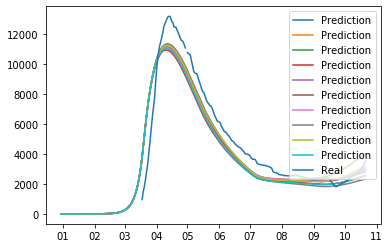

best_error: 2.735093875188156
vector: [2.6060678585847006, 2.501390391837075, 3.1356424663537106, 2.8971846724342454, 2.765128305947928, 2.7522279712284474, 2.573128137154129, 3.006523794347548, 2.304862912477345, 2.8087822415164303]
[7.91727513e+01 1.42735542e+00 8.46379471e-01 4.10090507e-01
 1.47114018e-01 2.61796684e-02 3.71247206e-01 6.15783192e-02
 7.61489640e-01]
best_error: 2.6180385648230122
vector: [2.387654728618883, 2.1839377065759678, 3.5450014344381238, 2.830641799649911, 2.5063588293474433, 2.6597957431725026, 2.1156734127884196, 3.2063721981388182, 1.9576982384242507, 2.787251557075801]
[7.83457002e+01 1.82300334e+00 8.87605365e-01 2.55310638e-01
 7.81872823e-02 9.50834170e-02 5.11032653e-01 8.96837261e-02
 5.17655640e-01]


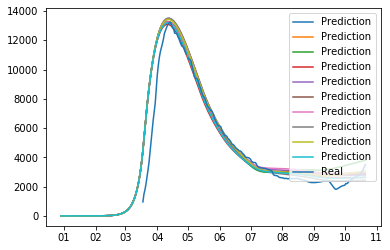

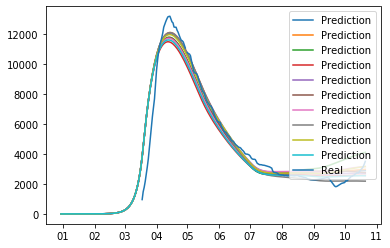

best_error: 2.8917594286871977
vector: [2.8031109064611544, 2.6978959687922717, 1.8919388812241669, 3.497320198534827, 2.8524786256907517, 2.9184351943931444, 2.7742788854504923, 3.5945126020401865, 2.5054279154182186, 3.382195108866764]
[7.87664762e+01 1.42104606e+00 7.85826462e-01 4.75284615e-01
 1.02000322e-01 7.57438370e-02 2.33445366e-01 1.55565689e-02
 9.92844930e-01]
best_error: 2.833230022631745
vector: [2.4602263634116497, 2.6080601502079883, 5.002462771756729, 2.545248924797483, 2.3191935324967066, 2.4505397619895195, 2.9442200318496923, 2.7059685865834524, 2.805612990104403, 2.4907671131198272]
[7.92853980e+01 1.63913118e+00 9.01109026e-01 3.28226383e-01
 1.24341697e-01 5.53728629e-02 4.25372485e-01 3.47724358e-02
 5.24424480e-01]


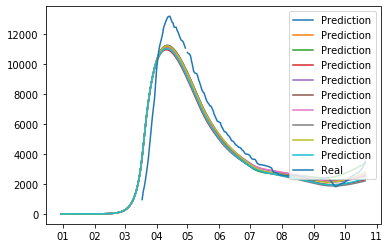

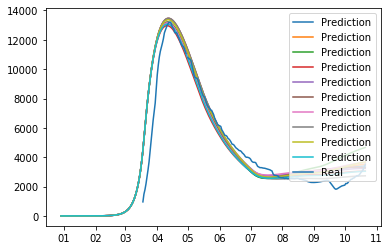

best_error: 3.03237261319731
vector: [2.923371768216723, 3.013073303038879, 2.7729597924795693, 2.949495547484342, 3.3405510172156543, 2.9864344112920276, 2.7224859663376235, 3.904288674926732, 2.762958712702154, 2.948106938279394]
[7.99430874e+01 1.44102175e+00 8.67894565e-01 2.85606624e-01
 5.88607231e-02 3.65777508e-02 2.70162406e-01 9.92052472e-02
 9.58956513e-01]
best_error: 2.32315147401632
vector: [2.099535617761566, 2.0607260914967838, 2.9534059955661203, 2.5249565382350747, 2.3084511425752963, 2.2913033055801515, 2.166583607131138, 2.6227438219324464, 1.8352476000146065, 2.368561019870016]
[7.83993857e+01 1.41037549e+00 8.13403805e-01 4.22489805e-01
 1.79951751e-02 5.70535539e-02 4.93627923e-01 9.30866587e-02
 9.87773471e-01]


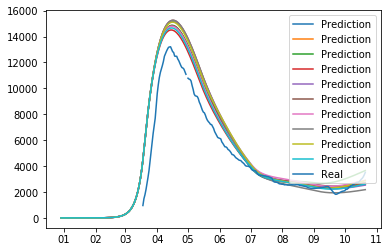

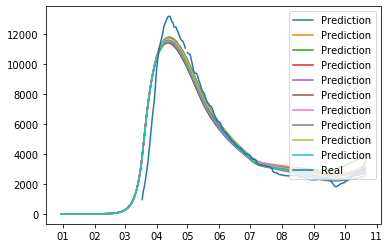

best_error: 2.3463271132717667
vector: [2.063367180812286, 1.9827681363993335, 2.9699838897107798, 2.704379349617497, 2.225219846630563, 2.2953970194032234, 1.9864225433876683, 3.020869080160938, 1.666789323279625, 2.5480747633157517]
[7.78967211e+01 1.69052601e+00 8.10648400e-01 3.04835440e-01
 1.05028848e-01 1.18736461e-02 2.52342734e-01 1.04621619e-01
 9.63955668e-01]


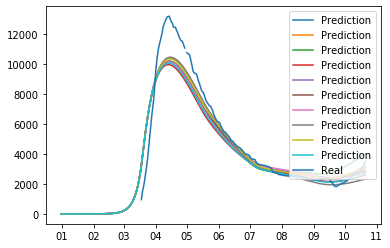

best_error: 3.132030509306919
vector: [3.101561086379993, 3.1721605061747233, 5.90941462005857, 2.1522891177954637, 2.6852089337648852, 2.8874395950769016, 3.49212627144051, 2.158617431408775, 3.5791482915395854, 2.1823392394297825]
[7.75010404e+01 1.73784830e+00 8.41887344e-01 3.30772715e-01
 1.15722229e-01 5.41739536e-02 1.50141426e-01 6.34934504e-02
 8.75915066e-01]


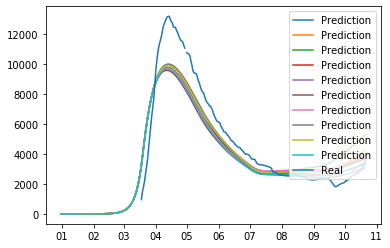

best_error: 2.8105126336829853
vector: [2.5943648035433418, 2.621548040374503, 3.7937808085427047, 2.755420766517285, 2.885396852420546, 2.778083393615171, 2.6675411032653717, 2.8997204321481957, 2.4222578028262873, 2.687012333576444]
[7.93037472e+01 1.29409935e+00 8.44564806e-01 4.61610897e-01
 1.05495133e-02 8.25123334e-02 5.79227421e-01 1.24584550e-01
 9.22214572e-01]
best_error: 2.741249776254347
vector: [2.50479718099874, 2.457755126326921, 5.254874252877899, 1.9165129303886086, 2.210794236632931, 2.503267698945645, 3.1339348609101068, 2.437586036631783, 3.0658004360984927, 1.9271750027323409]
[78.33117838  1.69917552  0.87056862  0.23829269  0.10857498  0.09228702
  0.54825201  0.08694334  0.97750852]


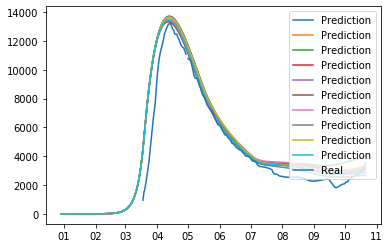

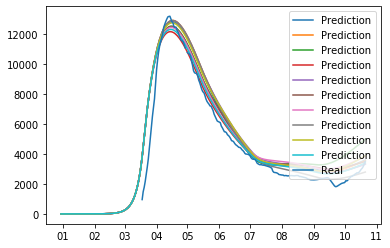

best_error: 2.6006082156507646
vector: [2.4131758874595373, 2.3666130184086875, 3.4982500036319046, 2.5905409094620935, 2.6499513272559954, 2.5486077740507875, 2.4107497200005974, 2.769516661608294, 2.220883048925568, 2.537793805704179]
[7.98464724e+01 1.27115394e+00 8.46466793e-01 4.69624368e-01
 6.06855740e-02 5.39410224e-02 1.99918347e-01 1.06295116e-01
 7.93999981e-01]
best_error: 2.5296607234501085
vector: [2.2658008085760324, 2.2142651088764898, 3.6045874087733454, 2.6511696332963273, 2.5178870672181155, 2.4862456677608167, 2.3875352979060294, 2.628802369410881, 2.035155265295994, 2.5051586073870533]
[7.76266322e+01 1.40229083e+00 7.96724322e-01 4.29381272e-01
 4.28165791e-02 7.22823834e-02 2.86246693e-01 1.16321305e-01
 8.96694239e-01]


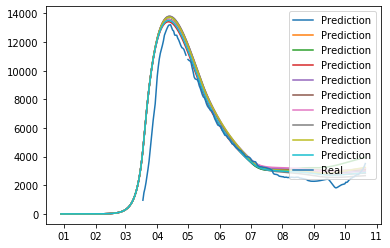

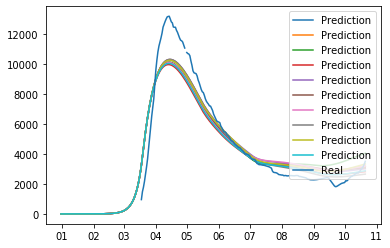

best_error: 2.69356592324187
vector: [2.493120669560086, 2.4271444193973624, 3.354272696690675, 2.8122509631802615, 2.738029515992822, 2.7248140053681773, 2.5637801947397163, 2.8079933911615607, 2.29332305757703, 2.7209303187510128]
[7.89195913e+01 1.37764151e+00 8.30053316e-01 4.30060710e-01
 2.65906101e-02 3.69293029e-02 4.26638500e-01 9.07211796e-02
 7.40768622e-01]
best_error: 2.982095838472433
vector: [2.8835653366232887, 3.004634010034961, 4.782822129037677, 2.6267660366928176, 2.6183940615385257, 2.85768004546164, 3.000967572198841, 2.5158340891334134, 3.0484372326320237, 2.4818578713711394]
[79.57312354  1.32770211  0.83571591  0.52642074  0.10973732  0.09941078
  0.53214211  0.09742411  0.89767248]


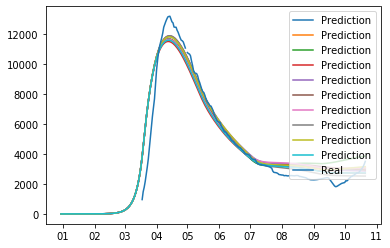

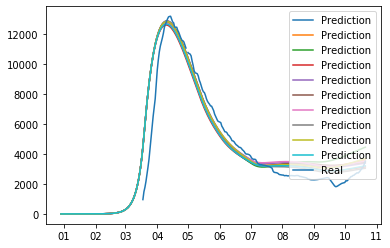

best_error: 2.4022490770935283
vector: [2.079342772294993, 2.092450657958886, 4.295493876055694, 2.148462593314123, 2.145171776145844, 2.079095756522953, 2.425376980805191, 2.302203776769224, 2.4773782104772217, 1.977514370591153]
[7.88043085e+01 1.52234033e+00 8.38082753e-01 3.46137731e-01
 6.02112034e-02 7.30121355e-02 5.49723551e-01 5.99523501e-02
 9.82404390e-01]


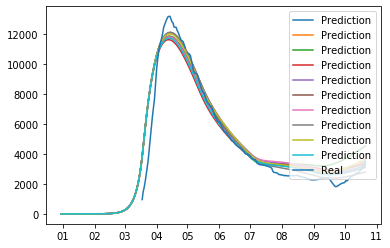

best_error: 2.4885387166838653
vector: [2.0048551106689034, 1.9905590018546544, 4.289834502426366, 2.393483226947523, 2.416066759703541, 2.3226841989612668, 2.394945009214056, 2.625500541470277, 2.241425065071594, 2.206033750520472]
[7.79458727e+01 1.71729080e+00 8.31833920e-01 2.62647131e-01
 1.51817899e-01 4.02053060e-02 2.75643707e-01 5.75924304e-02
 8.91776935e-01]


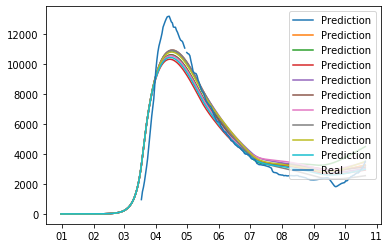

best_error: 2.3249047547351824
vector: [1.8789393374425196, 1.7486226660685498, 3.9550173662643053, 2.47407589324434, 1.9261925032357001, 2.08390357370481, 1.983275452762532, 2.7779545540693595, 2.0619424680680885, 2.3591237324916228]
[7.81303118e+01 1.62460169e+00 8.49271543e-01 3.46999273e-01
 5.67874899e-02 5.84984289e-02 3.00750742e-01 1.05541949e-01
 8.98990208e-01]


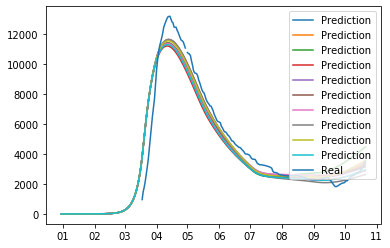

best_error: 2.6029338411079346
vector: [2.3691361367564965, 2.252568268974186, 3.825913567612054, 2.7018219041971654, 2.5222549516330064, 2.585345548205699, 2.41299951241761, 2.6569672545928094, 2.0982089064038965, 2.6041223602864196]
[7.81066132e+01 1.39094996e+00 8.30053316e-01 4.40467315e-01
 5.71754166e-02 3.69293029e-02 3.56759797e-01 1.75264004e-01
 7.40768622e-01]best_error: 2.666227454550488
vector: [2.5378014450089403, 2.479910374376247, 2.988355945952971, 2.782705807522612, 2.7438277182692516, 2.6645039648745463, 2.5427496895545856, 2.8950957637398993, 2.3231714096184657, 2.7041524265873638]

[7.93315564e+01 1.28516237e+00 8.38281758e-01 4.82706453e-01
 4.78083678e-02 4.11546433e-02 4.07564539e-01 3.83898494e-02
 8.17873667e-01]


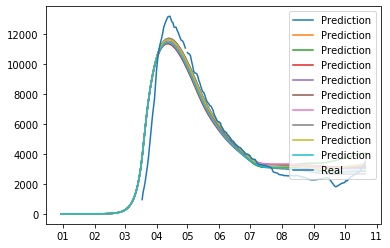

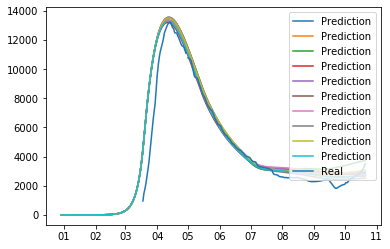

best_error: 2.6944003618811405
vector: [2.4648492443899346, 2.360098936710676, 3.0697406452570197, 3.072182920747921, 2.594716704199797, 2.7335968294599953, 2.3702217559279912, 3.322895931915251, 2.0459177128812986, 2.9097829373215207]
[7.86917568e+01 1.73505507e+00 8.45795238e-01 3.27678208e-01
 1.59633306e-02 5.35300233e-02 7.17360318e-01 9.67140620e-02
 9.20979809e-01]


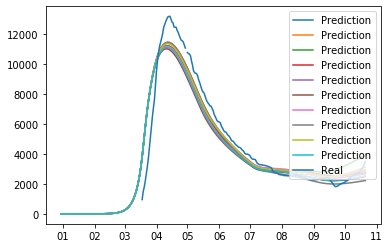

best_error: 2.335795846070248
vector: [2.0003691848511584, 1.9596009933034215, 4.294887478397321, 2.220163479331223, 1.8457938221232646, 1.9781405818165263, 2.236412007783852, 2.4066812870984267, 2.368823594730481, 2.047086031266801]
[7.81303118e+01 1.62460169e+00 8.49271543e-01 3.46999273e-01
 1.82548580e-02 4.28553689e-02 5.85320955e-01 4.34703049e-02
 9.52471890e-01]


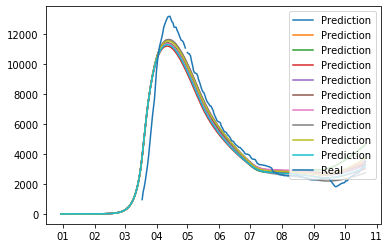

best_error: 2.422981752423918
vector: [2.215803270913109, 2.1435690149026834, 2.7484688234342878, 2.779958875998758, 2.3192648412878833, 2.38019701816331, 2.2378173400477213, 2.8591288041916103, 1.9163047744433928, 2.6293047608564257]
[7.81021187e+01 1.38970466e+00 7.99612869e-01 4.75284615e-01
 6.55247378e-02 7.36439095e-02 2.52877890e-01 4.59960442e-02
 9.82629529e-01]


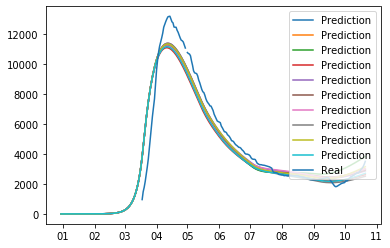

best_error: 2.771519598773074
vector: [2.544454589733419, 2.6555563686710526, 5.002261278866283, 2.4102223664788918, 2.186561327647185, 2.4170851495462786, 2.9027179471161038, 2.4116269947123716, 2.8947039623297517, 2.2900060026294047]
[7.80528398e+01 1.61328071e+00 8.54770964e-01 3.69320021e-01
 1.14123118e-01 3.36093997e-02 3.00302516e-01 4.21402853e-02
 7.82097982e-01]
best_error: 2.281176571605987
vector: [1.865134480520132, 1.861234395422541, 3.9063852805150283, 2.3758575591738342, 1.927387141304326, 2.031365321092404, 2.0011032843716237, 2.4929585824840244, 2.1656875089977383, 2.184652162178212]
[7.86965153e+01 1.52234033e+00 8.22398510e-01 4.11973365e-01
 6.02112034e-02 6.91574431e-02 4.79801443e-01 5.99523501e-02
 9.96590064e-01]


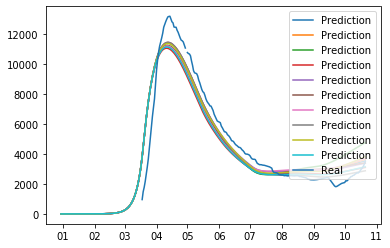

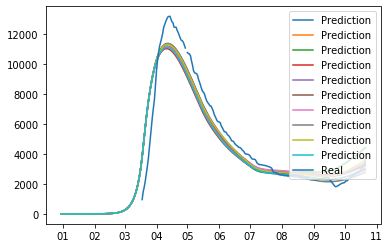

best_error: 2.276144306386817
vector: [1.9764340216705807, 1.9423736506997922, 4.060853989622553, 2.1528557705780997, 1.969372266995138, 1.956613414130134, 2.2198376500489774, 2.216192441960402, 2.2893734760651565, 1.9775363820973397]
[7.72672160e+01 1.49452940e+00 8.09958831e-01 3.72373825e-01
 2.91845611e-02 6.90888838e-02 3.21375520e-01 1.09596024e-01
 9.68473155e-01]
best_error: 2.731132770809346
vector: [2.5296992732796, 2.4376109123582266, 2.8153005761255665, 3.1641795663995023, 2.666979804014298, 2.7617406894196734, 2.538711179129084, 3.222602242743764, 2.1791356919078093, 2.995367772715934]
[7.68110321e+01 1.57743411e+00 7.75792736e-01 3.78083061e-01
 5.28712270e-02 6.97995585e-02 3.27969084e-01 4.64532756e-02
 9.38575880e-01]


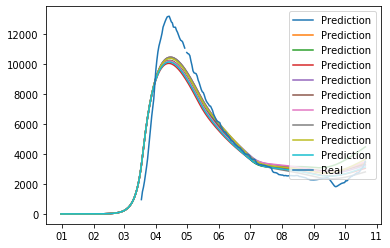

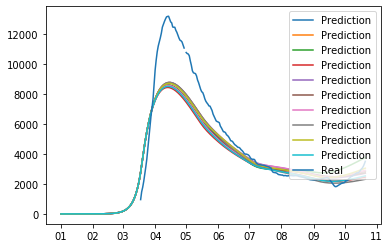

best_error: 2.1867299042101003
vector: [1.9049590217958168, 1.9110078039724934, 2.936877956357481, 2.3577195587040354, 2.1878207051297185, 2.051894653853055, 1.708224175462477, 3.018762991417032, 1.5634628738245682, 2.2265693015843286]
[7.84208495e+01 1.67580738e+00 8.36012190e-01 2.79126374e-01
 1.37058082e-01 4.76863710e-02 2.10932223e-01 3.37974051e-02
 9.90631991e-01]


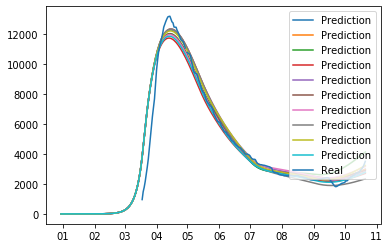

best_error: 2.6778384236688106
vector: [2.4199141171118996, 2.4091548101534475, 5.1302490901040585, 2.3240932892468997, 1.9879121107441973, 2.2260972117885816, 2.8913559395189643, 2.3851556640753215, 2.8704436570569762, 2.1340083468877573]
[7.62741052e+01 1.78633179e+00 8.18679704e-01 2.79977999e-01
 1.11880897e-01 5.38282454e-02 2.26327250e-01 1.05693237e-01
 8.98243006e-01]


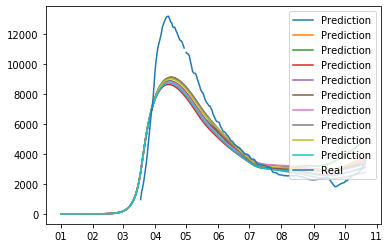

best_error: 2.49595203619559
vector: [2.3241354079121845, 2.284928048750445, 2.9874124928446464, 2.6641884321418425, 2.512005419199265, 2.46547736609223, 2.3783869744651898, 2.764377458513965, 2.0493210285103975, 2.5292877335257336]
[7.90422522e+01 1.33920345e+00 8.28802563e-01 4.66236791e-01
 5.93962466e-02 9.34980399e-02 5.32142106e-01 9.74241076e-02
 9.77957961e-01]


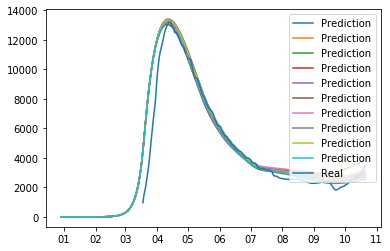

best_error: 2.467061665441991
vector: [2.2792959613940704, 2.2041266963062514, 2.473607438903516, 2.7647451580961286, 2.476094266234128, 2.443284588074582, 2.05599585682162, 3.3283224695406877, 1.928776387041025, 2.7163678320078954]
[7.86008790e+01 1.64692597e+00 8.46070278e-01 2.95043180e-01
 8.39712085e-02 3.96997459e-02 3.88028907e-02 9.18374242e-02
 8.56208435e-01]


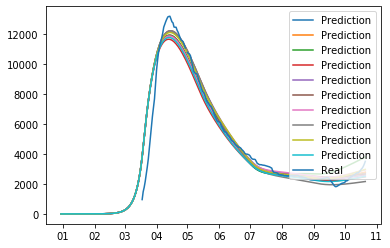

best_error: 2.4131991755564948
vector: [2.3292522830531643, 2.264739824062821, 4.7054050927168, 1.7367422390790415, 1.8606764844530366, 2.2059267528845146, 2.604844917382835, 2.033005172433275, 2.6801829400653654, 1.711216049434092]
[7.86620064e+01 1.55622475e+00 8.57281416e-01 3.41183306e-01
 5.06686608e-03 5.15215407e-02 1.00436581e-01 1.30762104e-01
 9.47509228e-01]
best_error: 2.0179537650484454
vector: [1.6114332484551235, 1.5588196887259709, 3.8748158284106635, 1.790754430423393, 1.7467949795154416, 1.6473917367483888, 1.9183381537821822, 2.382251481744925, 2.0068016261922734, 1.6421364764860882]
[7.81108771e+01 1.57959794e+00 8.46466793e-01 3.03261630e-01
 6.06855740e-02 9.13296769e-02 1.99918347e-01 8.42678271e-02
 9.97687874e-01]


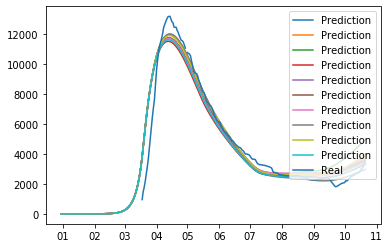

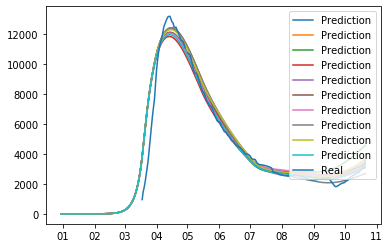

best_error: 2.4908506430992454
vector: [1.987863215782731, 1.9340104580358466, 4.5960097198366485, 2.172097236082458, 2.386636507148975, 2.220176826100344, 2.5399130340644764, 2.7739191035699235, 2.2448886718784795, 2.052991658492574]
[7.81063889e+01 1.85528066e+00 8.76496205e-01 2.08622309e-01
 2.12922333e-01 6.11907922e-02 1.12058882e-01 9.90008532e-02
 8.49415927e-01]


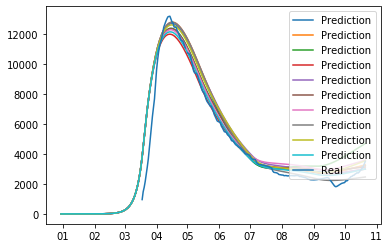

best_error: 2.4666967686470893
vector: [2.0355220407223173, 1.9670541209470627, 5.18203400778763, 1.6628766099136851, 2.0339377085824917, 1.987775644483376, 2.908079265289188, 2.669627941532661, 2.7022876166407297, 1.5177727305717523]
[7.89696438e+01 1.89132754e+00 8.81308083e-01 1.80162911e-01
 1.93954470e-01 5.75754775e-02 2.58521047e-01 1.00907752e-01
 9.80108896e-01]


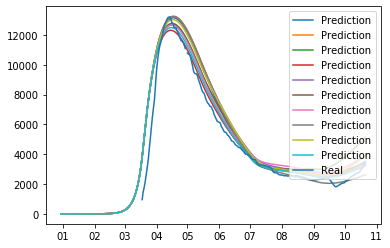

best_error: 2.2976901253466453
vector: [1.8992584343856445, 1.8128371075574412, 3.9051169922940656, 2.377563350194822, 2.0094291990187645, 2.064621293163459, 2.0184947369134654, 2.639263970730452, 2.023591366485628, 2.2267248027227087]
[7.97212065e+01 1.57269530e+00 8.43991262e-01 3.69863351e-01
 1.94955176e-01 4.75585481e-02 3.42820205e-01 6.40747294e-03
 9.85037647e-01]


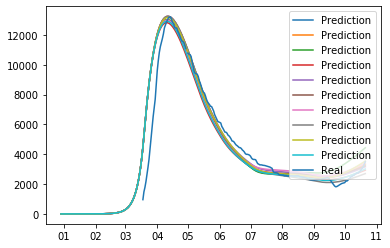

best_error: 2.4842763092478335
vector: [2.295349569584442, 2.1524337936971674, 2.861890647685975, 2.795851539311438, 2.365293681041609, 2.4885525037316754, 2.1696287498821665, 3.047560131251247, 1.9383104548925534, 2.727892021400061]
[7.86551989e+01 1.51153156e+00 8.42102878e-01 3.76460417e-01
 6.10032440e-03 3.57655935e-02 2.23889579e-01 1.73495498e-01
 7.83626986e-01]


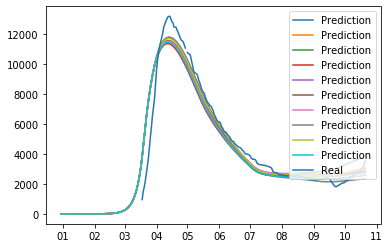

best_error: 2.398099504673627
vector: [1.941991909152884, 1.9416258854452302, 4.426180080066801, 2.3359899643586606, 1.9763581040906266, 2.081599836984056, 2.3621041238833533, 2.4355894603357324, 2.3395504392980913, 2.1400052431208367]
[77.82240977  1.70961431  0.8209735   0.31101286  0.13716537  0.08513509
  0.37425099  0.15243396  0.94118233]


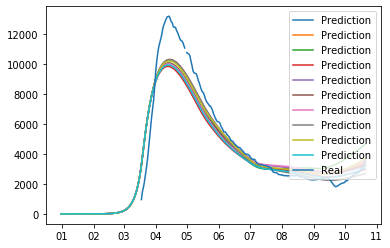

best_error: 2.2677496079316395
vector: [1.703767180639789, 1.5999927808787238, 4.047664728629753, 2.462761875754355, 1.8094024459148674, 1.9611706660481119, 1.897848943828459, 2.9378706752671095, 1.9398570956694723, 2.3171596866857525]
[7.70239651e+01 1.84427248e+00 8.38819995e-01 2.63096696e-01
 9.60620496e-02 9.04276072e-02 1.10117279e-04 1.07289057e-01
 9.51082424e-01]


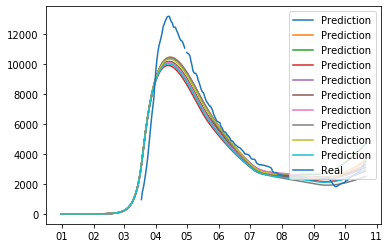

best_error: 2.1404754965034627
vector: [1.8118723476501486, 1.7442255569285459, 3.5070372276038735, 2.232669643635091, 2.0043962894253955, 2.0013589076493865, 1.6292529753474312, 2.7385873655769775, 1.611664279076792, 2.123690372140984]
[7.86008790e+01 1.64692597e+00 8.53570588e-01 2.95043180e-01
 8.39712085e-02 9.87883590e-02 2.66684121e-02 9.73226126e-02
 8.99009903e-01]


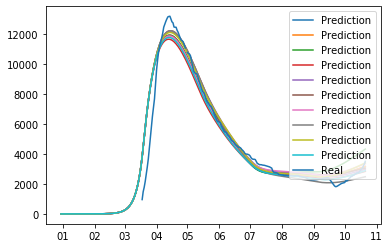

best_error: 2.36306725653509
vector: [2.1075495639484148, 2.089998062211208, 2.608153178505504, 2.6381653008995256, 2.4068558428418063, 2.350119433598917, 1.9854150169969458, 3.1133631756702145, 1.8211335800894877, 2.5099194105888794]
[7.70818644e+01 1.67580738e+00 8.20628369e-01 2.79126374e-01
 6.54755290e-02 4.95843938e-02 6.65748402e-02 3.37974051e-02
 9.26631675e-01]
best_error: 2.18692475774865
vector: [1.7470161649959173, 1.6909255677234758, 4.0261048890177165, 2.1762132089253914, 1.8242672374009092, 1.915960517373997, 2.0553342074128578, 2.34421111484866, 2.0926491173441173, 1.996565552443458]
[7.70804255e+01 1.62325721e+00 8.20474028e-01 3.24143090e-01
 6.23416076e-02 7.20644843e-02 2.74107454e-01 9.36602320e-02
 9.57981324e-01]


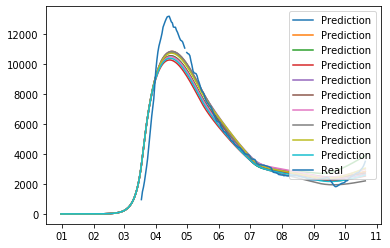

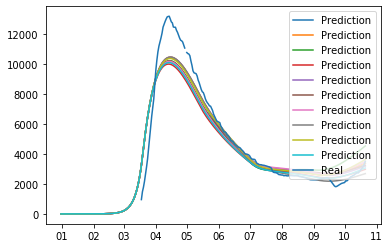

best_error: 2.1902574478136296
vector: [1.7716682721828598, 1.6974033830408164, 3.620543333757435, 2.4298296439231253, 1.865112081489049, 1.9399133236382766, 1.6167306395181864, 2.999217133432473, 1.643435545256998, 2.318721121897077]
[7.82226867e+01 1.77634374e+00 8.46510451e-01 2.74325851e-01
 1.46298540e-01 7.24121068e-02 1.47456528e-01 1.14732684e-01
 9.83231730e-01]


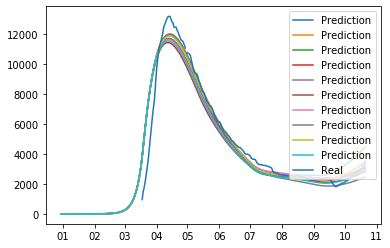

best_error: 2.4895307954814307
vector: [2.2988293640019206, 2.1510168475648546, 2.9685611139742076, 2.7576901914398366, 2.406337617440486, 2.5206246322539627, 2.1673672390317993, 3.0125409060772306, 1.9338213711264207, 2.6785186719035883]
[7.88648119e+01 1.59991537e+00 8.49057240e-01 3.32206627e-01
 6.19171200e-02 5.30718737e-02 3.50389183e-01 3.37331198e-02
 7.67859486e-01]


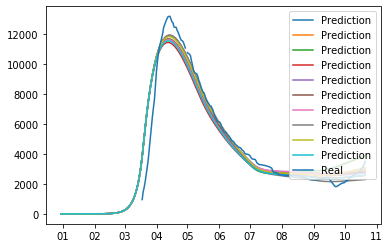

best_error: 2.3591319983266485
vector: [1.941014657305462, 2.005405760097026, 4.076574109860698, 1.9483701951173908, 2.3285801084788056, 2.088465474504261, 2.1873908457028772, 2.9776302070799163, 2.1362515292690283, 1.9016370958510234]
[7.82122275e+01 1.62713687e+00 8.78842877e-01 2.27353725e-01
 1.06144994e-02 1.22682802e-02 1.90420062e-01 1.31874378e-01
 9.49169899e-01]


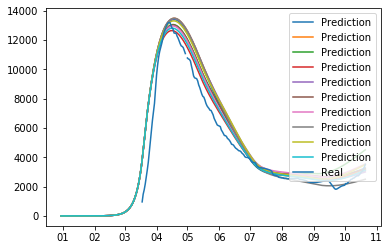

best_error: 2.3226552395884767
vector: [1.9463160074074572, 1.876236687086122, 3.960983200717641, 2.2371616422472154, 2.2344353966375223, 2.2203598915828566, 1.989654991346216, 2.6718609282619457, 1.9379845785779777, 2.151559072019812]
[7.78376248e+01 1.71914587e+00 8.56677152e-01 2.47536032e-01
 3.22497679e-02 4.52346585e-02 3.65212152e-02 6.89581064e-02
 7.94762143e-01]


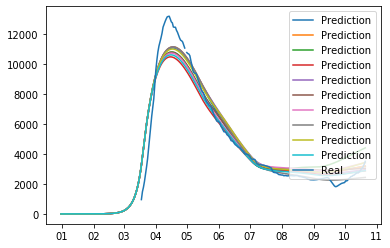

best_error: 2.156118930323234
vector: [1.8672108292819343, 1.8318675950394083, 3.1251213936801805, 2.307158845578959, 2.08558364929088, 2.0363138832962866, 1.6708492705683682, 2.911117146927585, 1.52273122022705, 2.2032354693416885]
[7.89198170e+01 1.62601205e+00 8.47899793e-01 2.98255446e-01
 6.11901106e-02 2.63554446e-02 2.90168859e-01 5.64003917e-02
 9.33329798e-01]


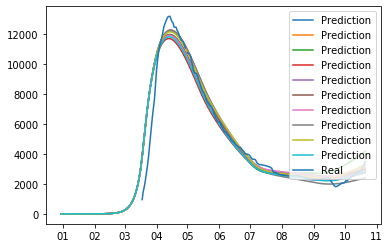

best_error: 2.076751277999856
vector: [1.6430979268522905, 1.5997018662877556, 3.641491638574599, 2.1660750944051745, 1.8563085694077635, 1.8841396581888439, 1.7372844131540637, 2.456356428526502, 1.796119920740918, 1.9869372638606468]
[7.76266322e+01 1.62621746e+00 8.19730825e-01 3.09910286e-01
 5.04927551e-02 7.22823834e-02 2.05527867e-01 1.16321305e-01
 9.76581902e-01]


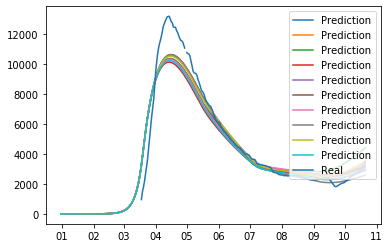

best_error: 2.3505684910612166
vector: [1.9778398103848487, 2.0620943400978247, 2.8970059206765306, 2.5532502455762898, 2.4360535408359416, 2.2776116341334154, 1.7942944047836533, 3.403695925498684, 1.683642680806558, 2.4201964078184246]
[7.64326446e+01 1.86828743e+00 8.18918729e-01 2.05171842e-01
 3.98636888e-02 4.55493346e-02 1.85959122e-01 1.61461400e-01
 9.78920661e-01]
best_error: 2.4163722994049497
vector: [1.9987051114626502, 1.876793678679784, 4.129635121353408, 2.422153144742904, 2.054414976786367, 2.1233490299384083, 2.1067472570438897, 2.9755462887903743, 2.114324386570108, 2.362053998681602]
[7.94307814e+01 1.68749964e+00 8.76283546e-01 3.09042082e-01
 1.55798339e-01 9.65099764e-02 3.51798909e-01 1.56214937e-02
 9.01122838e-01]


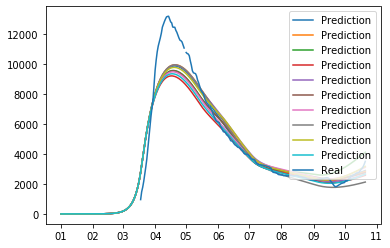

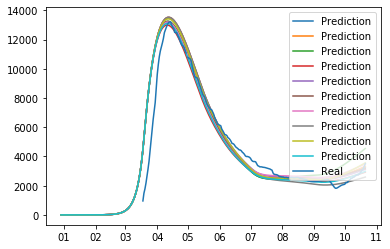

best_error: 2.168276934012393
vector: [1.902784704602838, 1.9626072484708517, 2.9087542313842025, 2.17581615316798, 2.2225029085195853, 2.0143898432751675, 1.6683500052233415, 3.0885787195967493, 1.6278495002902091, 2.111136025593001]
[7.85008364e+01 1.55937907e+00 8.47037754e-01 2.88990266e-01
 5.42487024e-03 8.98343908e-02 3.98975540e-03 4.52812852e-02
 9.90471981e-01]best_error: 2.2607283776254534

vector: [1.8647301643569856, 1.7445736707696877, 3.653219446752808, 2.5209176550668717, 1.9811741675500893, 2.126057185994382, 1.7138817573218181, 2.9280676816753095, 1.6776750824299191, 2.3969869643366657]
[7.78693866e+01 1.75799281e+00 8.34708524e-01 2.83436325e-01
 6.81088099e-02 2.52150319e-02 8.90781402e-02 4.68224852e-02
 9.12946732e-01]


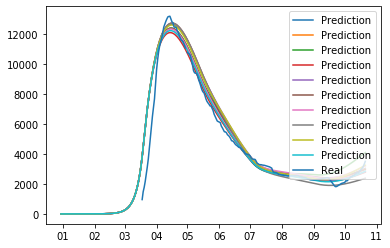

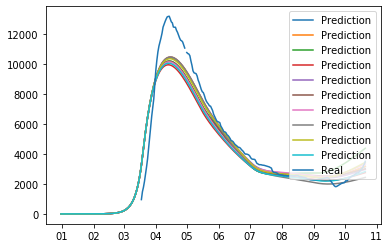

best_error: 2.2423547751030855
vector: [1.799812658217442, 1.757246457801931, 4.052539509600781, 2.143115834613697, 1.9976536292095224, 2.006108542253574, 2.1190940803926845, 2.425397020508159, 2.087293520063353, 2.035286498369712]
[7.84208495e+01 1.59593669e+00 8.61605942e-01 3.10229498e-01
 6.30031907e-02 4.76863710e-02 1.15228219e-01 6.71660904e-02
 8.24738977e-01]


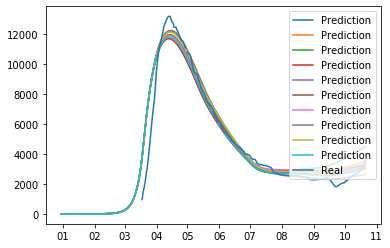

best_error: 2.314077556865776
vector: [2.0609355371271394, 2.080654704300178, 3.9594416337066605, 2.076848592846241, 2.1320710150183633, 2.043243618099723, 2.271168357614605, 2.2483087950456095, 2.33245548163254, 1.9356478332666986]
[7.84895628e+01 1.35567809e+00 8.25087218e-01 4.11322921e-01
 2.44290507e-02 7.95684534e-02 3.15855968e-01 7.66461838e-02
 9.86411677e-01]


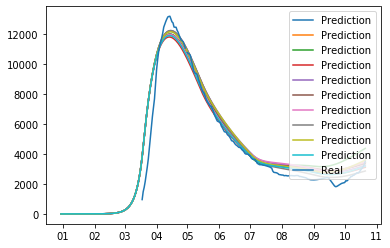

best_error: 2.224271681183111
vector: [1.741358405389464, 1.749776542685624, 4.1418897534866765, 2.1252350380395706, 1.944900084331165, 1.930796777054427, 2.1994903114350812, 2.32566868620462, 2.131181493320428, 1.9524197198840596]
[7.82049692e+01 1.62575753e+00 8.43180106e-01 3.11012855e-01
 1.37165373e-01 7.13266116e-02 3.74250993e-01 5.55116783e-02
 9.41182332e-01]


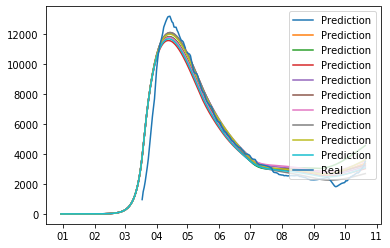

best_error: 2.08645315777109
vector: [1.7246480783344365, 1.7244488501688742, 3.0708872549842012, 2.3490348761556543, 1.9797227163371778, 1.9524561153184612, 1.6344574745108948, 2.847545366127163, 1.396577123245731, 2.1847537225283036]
[7.73245437e+01 1.65834938e+00 8.18395365e-01 2.92479973e-01
 3.82462212e-02 9.80042382e-02 1.49351124e-01 3.60706206e-02
 9.98920857e-01]


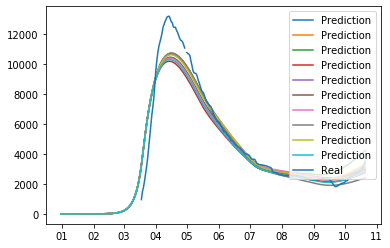

best_error: 2.172783133910916
vector: [1.7673362198647702, 1.6744966443662155, 3.8010377013676973, 2.2452013246703055, 1.889701411862293, 1.9814585589636422, 1.9273081217186532, 2.4239391875987866, 1.9271994334980098, 2.090152735198785]
[7.82426323e+01 1.55937907e+00 8.33465813e-01 3.57781137e-01
 1.00234822e-01 2.92672897e-02 2.72939518e-01 3.77147986e-02
 9.45288824e-01]


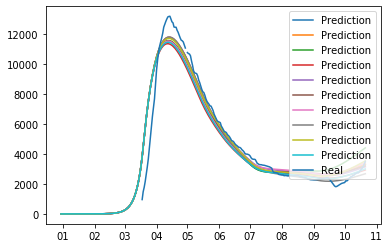

best_error: 2.073237542088647
vector: [1.7332581040025765, 1.7197570764064276, 3.4474482876296664, 2.01988184678111, 1.966260484555392, 1.8822391147254671, 1.5868211694705512, 2.766625668672725, 1.6654778647708066, 1.944605803871745]
[7.81691483e+01 1.57884933e+00 8.57546927e-01 2.97339448e-01
 4.90432730e-04 8.95777496e-02 4.23738970e-02 1.12254379e-01
 9.32847784e-01]


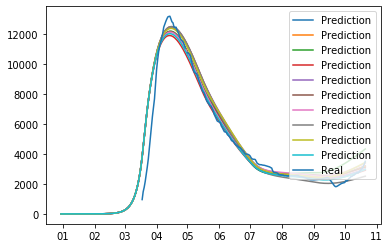

best_error: 2.172938296945703
best_error: 2.2219822805994442
vector: [1.7210540711880142, 1.7118406481520108, 3.8825622402330384, 2.0419168799469114, 2.0415673230591116, 1.9685975262581714, 2.003107045063746, 2.415407836716405, 2.0325749916361677, 1.9107544072034515]
vector: [1.8914929743013986, 1.7846283114223649, 3.544342644164984, 2.422297195738545, 2.0308072103762655, 2.139049086662464, 1.8045434364111883, 2.663435510971813, 1.666605737759872, 2.272620698185549]
[7.73074068e+01 1.59265228e+00 8.32721796e-01 2.93202687e-01
 1.45205463e-02 5.44067947e-02 1.02046752e-01 1.61980171e-01
 9.26740394e-01][7.75446746e+01 1.65263472e+00 8.24491858e-01 3.12228843e-01
 5.79328855e-02 9.07883967e-02 1.95476829e-01 5.55116783e-02
 9.12464872e-01]



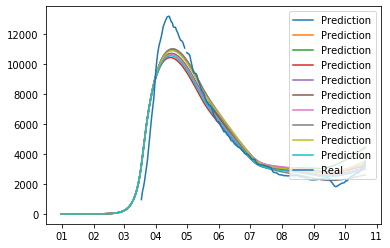

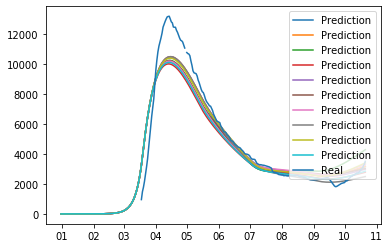

best_error: 2.2710671495957166
vector: [1.816890490626914, 1.7568026453075234, 3.9943230159592353, 2.312139805846247, 1.8954539412814913, 2.0359267263151835, 2.052506428408542, 2.5742249680213365, 2.0635722463193362, 2.208831227871361]
[7.85547065e+01 1.59150375e+00 8.50301500e-01 3.47588994e-01
 5.93407452e-02 8.88847589e-02 1.70244916e-01 5.32954024e-02
 8.72983802e-01]
best_error: 2.269522049813171
vector: [1.948675112349794, 2.0208073294141986, 3.6437288089529973, 2.051519990838438, 2.356135007374308, 2.098450543566383, 1.8480061916617536, 2.9591651957588354, 1.7992369555117778, 1.9694953627032232]
[7.85600879e+01 1.62259136e+00 8.57213428e-01 2.45778981e-01
 7.98486525e-02 8.05610081e-02 1.13894762e-01 6.15537114e-02
 9.84261186e-01]


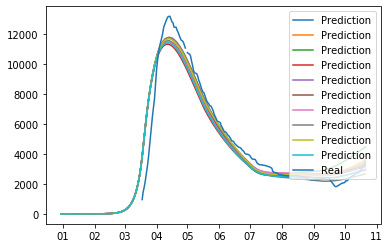

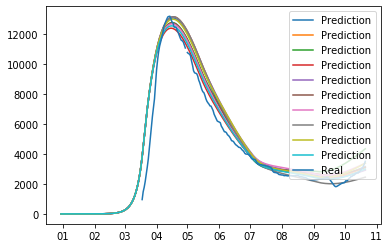

best_error: 2.167749316209906
vector: [1.7172308050481613, 1.6222207133936388, 3.744500130531763, 2.3017205907267613, 1.7858478941586045, 1.901811367009712, 1.8130045447834153, 2.715416794261088, 1.8908667742526486, 2.184873547933263]
[7.82691893e+01 1.60058073e+00 8.52337025e-01 3.31567975e-01
 1.35625807e-02 2.56381469e-02 2.16075384e-01 5.95102888e-02
 9.30573489e-01]
best_error: 2.097438681943089
vector: [1.6483028745301675, 1.5959836324890353, 4.040020630799004, 1.756746135055113, 1.873937552046185, 1.7264794062712725, 2.0484415347012437, 2.548373529715935, 2.0870682685129482, 1.6490332553099876]
[7.81076797e+01 1.63092730e+00 8.59458711e-01 2.65879179e-01
 6.24944282e-02 2.62748189e-02 9.77743070e-02 1.17843995e-01
 9.79706042e-01]


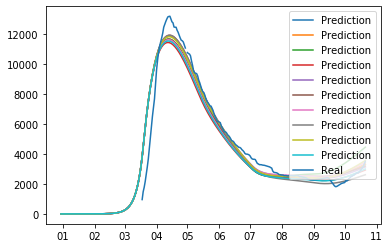

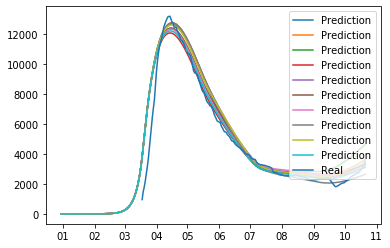

best_error: 2.119407409834803
vector: [1.623927661871144, 1.5838713546242467, 4.011451174398424, 2.0127551653059594, 1.8795733599671467, 1.8048953540583343, 2.069927419902505, 2.3108282348459346, 2.0884051774944417, 1.808439195879893]
[7.77485196e+01 1.65083337e+00 8.18395365e-01 2.92479973e-01
 1.02248608e-01 6.75779755e-02 1.49351124e-01 5.46833693e-02
 9.98920857e-01]


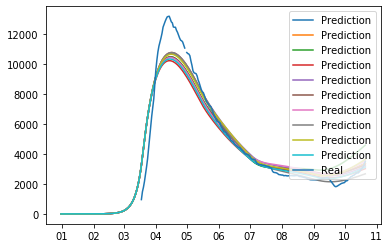

best_error: 2.112629376828526
vector: [1.6569421346750655, 1.6743522773258772, 3.902190876030292, 1.8758462440511383, 1.9683071134525174, 1.8263782212945727, 1.9628971399445856, 2.5349903947988, 1.9692078880495782, 1.75518147866283]
[7.81566193e+01 1.62833518e+00 8.52193017e-01 2.73765583e-01
 9.79249592e-02 5.43175146e-02 9.98148786e-02 5.33223144e-02
 9.73490274e-01]


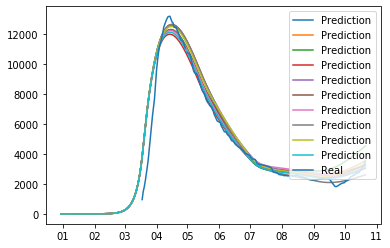

best_error: 2.064748135303021
vector: [1.7363733483316874, 1.6764686064706735, 4.007628128581529, 1.73264338623237, 1.7432237262571475, 1.6573703728787685, 2.0403672576392546, 2.32613905768482, 2.1288927279991823, 1.5983747409547782]
[7.82096693e+01 1.56747708e+00 8.50163592e-01 3.02153433e-01
 4.34131582e-02 6.61246490e-02 2.36014220e-01 1.01780860e-01
 9.92011980e-01]


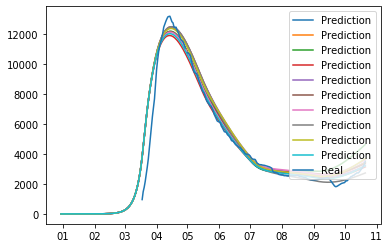

best_error: 2.0518846293112074
vector: [1.7159942683623193, 1.7432220034024433, 3.416228588387619, 2.012452685103013, 2.0100573447610013, 1.878812462270399, 1.5728275081878962, 2.643806430270993, 1.6496013032394232, 1.8758436991269682]
[7.82226867e+01 1.58498440e+00 8.41975130e-01 2.98293892e-01
 6.47992979e-02 7.24121068e-02 3.57556212e-01 1.14732684e-01
 9.98064584e-01]


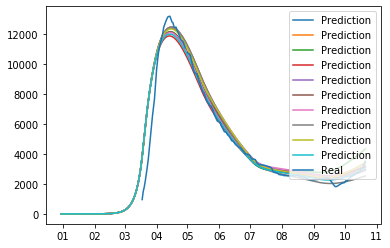

best_error: 2.219718348482176
vector: [1.8908857196770668, 1.8149975470810722, 3.5038492109936286, 2.400935807083954, 2.0933903524442767, 2.1233560912256517, 1.901240997743688, 2.5588758446352493, 1.6879839347361782, 2.2216679792009915]
[7.70028864e+01 1.59991537e+00 8.08458778e-01 3.32206627e-01
 9.54773442e-02 2.53697041e-02 2.10000822e-01 7.20586394e-02
 9.63754988e-01]


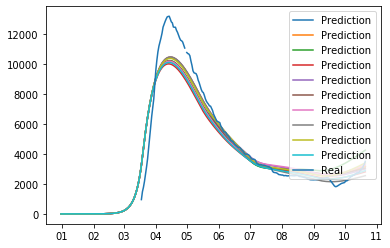

best_error: 2.0216074836719637
vector: [1.6791730100958953, 1.667192750685421, 3.3748539838451768, 2.0712643649397737, 1.9120799810502969, 1.847910695633849, 1.5517328976597717, 2.5624581205705352, 1.620508349506264, 1.9289006827326525]
[7.81127246e+01 1.54993908e+00 8.38959870e-01 3.24861763e-01
 5.96403912e-02 6.31212821e-02 9.98148786e-02 6.48670209e-02
 9.73490274e-01]


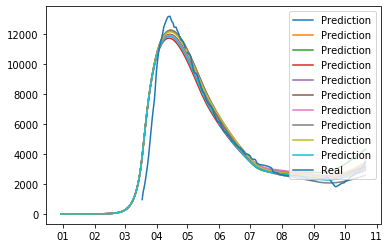

best_error: 2.068708762750926
vector: [1.71803130669459, 1.6983613254317134, 3.4938993335277093, 2.0958968168500873, 1.9611437592155174, 1.8960484289016222, 1.6298932862983921, 2.577690788414875, 1.6663813293854703, 1.9497412527892857]
[7.80560398e+01 1.59762782e+00 8.42899599e-01 3.06535355e-01
 8.84230702e-02 8.96865892e-02 2.35594965e-01 4.46772839e-02
 9.59600515e-01]


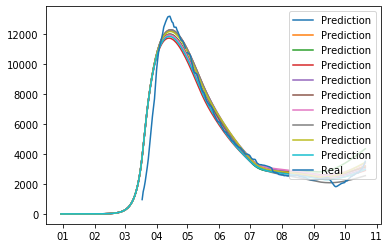

best_error: 2.139789781974031
vector: [1.8528043180077916, 1.8359194058345625, 3.187365336855599, 2.216773003618191, 2.0981575783104547, 2.0091860846147984, 1.6124256241244783, 2.948414030433738, 1.5119844324423792, 2.1248680054983176]
[7.84193818e+01 1.63943155e+00 8.52226703e-01 2.84138321e-01
 5.79499689e-02 8.83192251e-02 2.62672286e-01 5.65990760e-02
 9.37641895e-01]


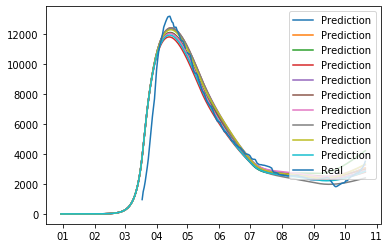

best_error: 2.0090169938849582
vector: [1.6678908457711303, 1.6879388248283043, 3.3803355573299383, 1.953408275516209, 1.935801561691214, 1.8211288996118642, 1.585667904731054, 2.5371227730051995, 1.6886764637579823, 1.8321988326066907]
[7.83199596e+01 1.50524287e+00 8.40278623e-01 3.27606257e-01
 1.69649676e-02 6.93157632e-02 2.25414737e-01 6.74164208e-02
 9.92296980e-01]


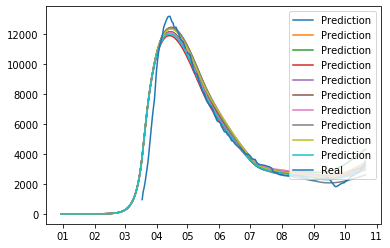

best_error: 2.1372589896989593
vector: [1.8165086915557418, 1.7750871535995207, 3.145223845984781, 2.391846735359665, 1.9833594112806165, 1.9702129499631766, 1.6317771407093193, 2.9487700046268586, 1.4255142468949749, 2.28428971701494]
[7.80043241e+01 1.64299001e+00 8.42498575e-01 3.03020366e-01
 7.63117996e-02 8.59666898e-02 2.26489643e-01 8.60742466e-02
 9.68598125e-01]


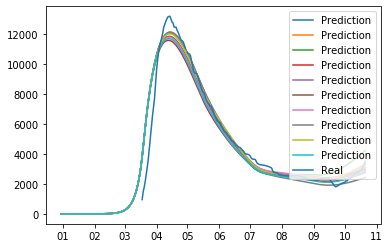

best_error: 2.0914592277779995
vector: [1.8034749290020209, 1.7289489798547435, 4.153722474391792, 1.65006730035899, 1.6613798267188917, 1.7114363867068252, 2.126592212430846, 2.338811984069796, 2.2201943051232567, 1.5199638791228323]
[7.81865054e+01 1.59563551e+00 8.55052124e-01 2.89977056e-01
 4.21171774e-02 8.69143936e-02 1.71803467e-01 6.84242228e-02
 9.95620122e-01]


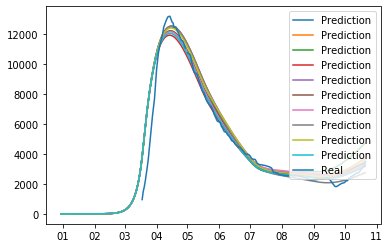

best_error: 2.116483326198185
vector: [1.7692905641460062, 1.7422491588462194, 3.6129688106358633, 2.024086048069619, 2.0181734752804577, 1.9369445580851967, 1.7333113564898577, 2.635504157666519, 1.7659035692624943, 1.9264015634996157]
[7.81397133e+01 1.59437297e+00 8.55965993e-01 2.93417140e-01
 4.67584433e-02 6.09753968e-02 1.70562254e-01 1.08485861e-01
 9.17207201e-01]


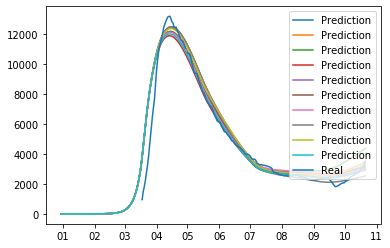

best_error: 2.16235009970501
vector: [1.8958665792652831, 1.8077782701104212, 4.380344889786235, 1.7763229113341927, 1.5975585941234924, 1.7882968694929802, 2.2616916632459745, 2.1615417740208507, 2.364858553705038, 1.5892408919656353]
[7.75587128e+01 1.66793032e+00 8.36141632e-01 2.80908062e-01
 2.68428351e-02 7.32598059e-02 2.83588015e-01 1.08276086e-02
 9.82312810e-01]
best_error: 2.0237813562545943
vector: [1.4784840009386502, 1.475699587181576, 3.720405170632221, 2.0442379456808313, 1.729115353189205, 1.7265825780543937, 1.6988515117188037, 2.6763311170343043, 1.7993561594935714, 1.8887501386223888]
[7.73254447e+01 1.71641262e+00 8.38678521e-01 2.65914273e-01
 6.88604527e-03 3.76681418e-02 1.67208284e-01 4.24100338e-02
 9.76898904e-01]


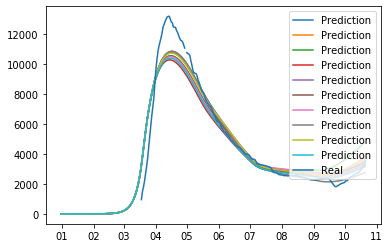

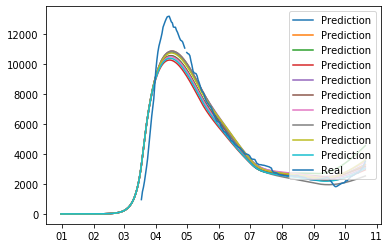

best_error: 2.078692859040115
vector: [1.7925065857164872, 1.787821364460978, 3.073846691013347, 2.226224255195413, 2.042018615440159, 1.9651186356155543, 1.744353097675463, 2.571029836425703, 1.5192616449683887, 2.064747863889655]
[7.83364119e+01 1.50495944e+00 8.23588066e-01 3.49724655e-01
 9.01517737e-02 4.94173069e-02 4.29748267e-02 6.15537114e-02
 9.96672350e-01]


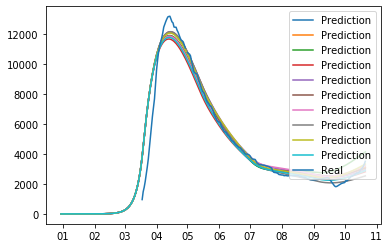

best_error: 2.112466106189335
vector: [1.756165357944492, 1.8125834590005334, 3.3960636556059205, 2.0717138060227396, 2.1410390223355833, 1.9843150500303168, 1.5888471156212156, 2.8459017939306825, 1.5836141631685214, 1.9444176382333458]
[7.76368552e+01 1.68949560e+00 8.37652048e-01 2.44526254e-01
 1.36533020e-02 9.84823975e-02 2.92645659e-01 1.41745037e-01
 9.77957961e-01]


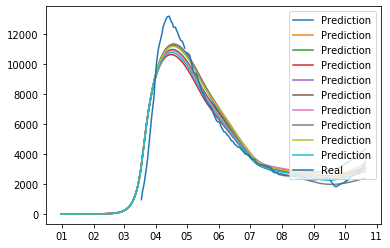

best_error: 2.028833065481222
vector: [1.7455455315686512, 1.6810187732477742, 3.8892312521205064, 1.730874770742541, 1.6742761194061082, 1.6613128461723674, 1.9678266290139061, 2.2549195195082854, 2.0933345106869137, 1.5899907023451698]
[7.83408887e+01 1.50887794e+00 8.45209142e-01 3.31534242e-01
 5.72915433e-03 7.12532145e-02 2.11709611e-01 7.88718419e-02
 9.99255375e-01]


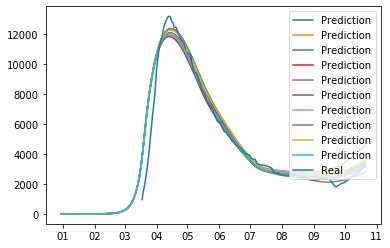

best_error: 2.0819831038903738
vector: [1.7633232657679248, 1.8120167281072284, 3.3808038490293306, 1.9887343526283894, 2.084788759997641, 1.9161573394613423, 1.5805627018339479, 2.754523050169234, 1.6556758502545805, 1.8832451416541187]
[7.84118844e+01 1.56623522e+00 8.48674743e-01 2.90287585e-01
 1.57954166e-02 9.33142451e-02 3.80073230e-01 7.21944877e-02
 9.98920857e-01]


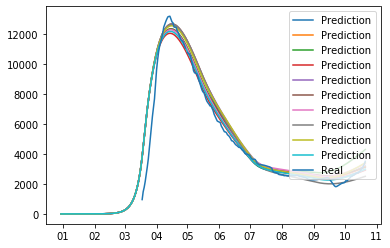

best_error: 2.079847205676244
vector: [1.7271959286715042, 1.77079727061968, 3.1526615766628225, 2.185281529443441, 2.0646607312224075, 1.9584164153127679, 1.567636639708895, 2.896881174737718, 1.4344471655093574, 2.040493624873852]
[7.72209423e+01 1.69021833e+00 8.30332892e-01 2.60746217e-01
 1.94121794e-02 6.54492819e-02 2.83485550e-01 7.66461838e-02
 9.86411677e-01]


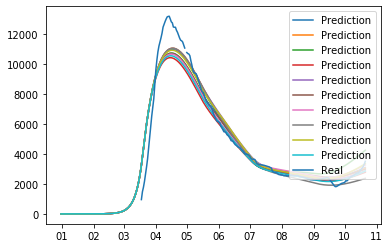

best_error: 2.0231745438753164
vector: [1.701187753424295, 1.692513251061054, 3.2557937942918063, 2.102860563573195, 1.9292853085554709, 1.8718757529907857, 1.588407428550381, 2.559933663707765, 1.5696697771849215, 1.9602181454134913]
[7.80394427e+01 1.51243877e+00 8.36779910e-01 3.42062432e-01
 2.60682829e-02 9.03384186e-02 2.75821010e-01 2.63686225e-02
 9.76961840e-01]


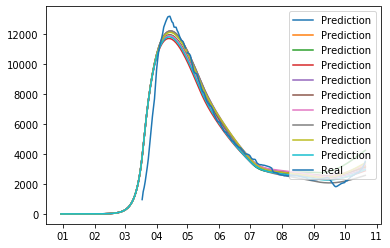

best_error: 2.1071860876283512
vector: [1.6174389517430257, 1.600151379294684, 3.9938131288127092, 1.8567759941906872, 1.9247026249716086, 1.8040086174053291, 2.0322391037049057, 2.4451719006251853, 2.0870993490313667, 1.7104598265040138]
[7.77641467e+01 1.65516146e+00 8.38141491e-01 2.60007599e-01
 1.42704065e-02 9.30474105e-02 2.80117673e-01 1.27894448e-01
 9.80629932e-01]


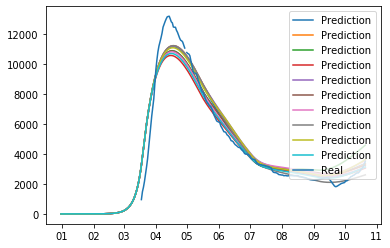

best_error: 2.0120822017291826
vector: [1.5134135872919288, 1.5250262456573713, 3.6658358272726876, 1.9706147896363224, 1.7962838729353807, 1.7535478014904573, 1.679193227642828, 2.622924291413673, 1.7788028845226849, 1.8151794894284927]
[7.76634504e+01 1.68872709e+00 8.37044404e-01 2.65914273e-01
 6.88604527e-03 7.72586765e-02 6.83384815e-02 4.40198758e-02
 9.76898904e-01]


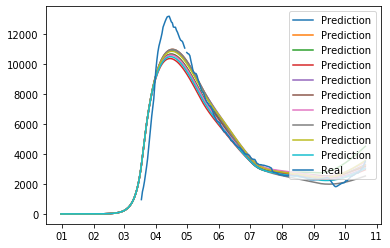

Process ForkPoolWorker-15:
Process ForkPoolWorker-6:
Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Process ForkPoolWorker-5:
Process ForkPoolWorker-12:
Process ForkPoolWorker-14:
Process ForkPoolWorker-13:
Process ForkPoolWorker-7:
Process ForkPoolWorker-8:
Process ForkPoolWorker-11:
Process ForkPoolWorker-16:
Process ForkPoolWorker-9:
Process ForkPoolWorker-2:
Process ForkPoolWorker-10:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/multiproce

  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "<ipython-input-26-46048566eee3>", line 314, in error
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), t, season, update_contacts=update_contacts)
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-26-46048566eee3>", line 314, in error
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), t, season, update_contacts=update_contacts)
  File "<ipython-input-26-46048566eee3>", line 314,

KeyboardInterrupt
  File "/Users/sergioacamelogomez/Dropbox/covid-optimization/fast_gradient/fast_group.py", line 392, in get_economic_value
    return np.sum(v_schooling+v_employment)
  File "<ipython-input-26-46048566eee3>", line 314, in error
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), t, season, update_contacts=update_contacts)
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py", line 1265, in __call__
    return self.f(x, *self.args)
  File "<ipython-input-26-46048566eee3>", line 186, in error
    'work':google['work'][counter]*samples[n_sample,counter,4],
  File "<ipython-input-26-46048566eee3>", line 314, in error
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), t, season, update_contacts=update_contacts)
  File "/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py", line 871, in __getite

KeyboardInterrupt: 

In [27]:
from scipy.optimize import minimize, Bounds, shgo, differential_evolution, dual_annealing
epsilon = 0.1
result = differential_evolution(error, [(50,140)]+[windows['alpha_mixing']]*1+[windows['transmission']]+[[0,1]]*2+[windows['school_l'],[0,1],[0,0.2],[0.5,1]],workers = -1)



In [29]:
error([7.83199596e+01, 1.50524287e+00, 8.40278623e-01, 3.27606257e-01,
 1.69649676e-02, 6.93157632e-02, 2.25414737e-01, 6.74164208e-02,
 9.92296980e-01])


2.0090170011322295

In [31]:
import copy
import math
import matplotlib.dates as mdates
best_v = 0
best_error = float('inf')
validation_date = datetime.strptime("2020-10-21", '%Y-%m-%d')
days_ahead_opt = 7.83199596e+01
alpha_opt = 1.50524287e+00

def error_grad(v):
    
    vector_upper_model_data = []
    vector_errors = []
    
    for n_sample in range(n_samples):
        days_ahead = days_ahead_opt
        alpha_mixing_home = alpha_opt
        alpha_mixing_work = alpha_opt
        alpha_mixing_transport = alpha_opt
        alpha_mixing_school = alpha_opt
        alpha_mixing_other = alpha_opt
        alpha_mixing_leisure = alpha_opt
        
        mix_1 = v[1]
        mix_2 = v[2]
        
        alphas_d = {
            'work':alpha_mixing_work,
            'transport':alpha_mixing_transport,
            'school':alpha_mixing_school,
            'other':alpha_mixing_other,
            'leisure':alpha_mixing_leisure,
            'home':alpha_mixing_home,
        }

        gamma_mixing_before = 1.0
        gamma_mixing_after = 1.0


        upper_bound_home = 1.0
        upper_bound_leisure = 1.0
        upper_bound_other = 1.0
        upper_bound_school = 1.0
        upper_bound_work = 1.0
        upper_bound_transport = 1.0

        school_lockdown = v[3]
        school_may = v[4]
        school_jun_jul_aug = v[5]
        school_sep_oct = v[6]

        beta_normal = original_beta
        beta_vacation = beta_normal*v[0]

        days_change_model = 0


        google['other'] = mix_1*(google["retail_and_recreation_percent_change_from_baseline"]+100)/100+(1-mix_1)*(google["grocery_and_pharmacy_percent_change_from_baseline"]+100)/100
        google['leisure'] = mix_2*(google["parks_percent_change_from_baseline"]+100)/100+(1-mix_2)*(google["retail_and_recreation_percent_change_from_baseline"]+100)/100


        # Number of days
        days_before_date_1 = int(days_ahead)
        days_between_dates_1_2 = (date_2-date_1).days
        days_between_dates_2_3 = (date_3-date_2).days
        days_between_dates_3_4 = (date_4-date_3).days
        days_between_dates_4_5 = (date_5-date_4).days
        days_after_date_5 = (final_date-date_5).days
        total_days = days_before_date_1 + days_between_dates_1_2 + days_between_dates_2_3 + days_between_dates_3_4 + days_between_dates_4_5+ days_after_date_5
        days_denom = days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5


        # Some additional calculations
        validation_days = days_before_date_1 + (validation_date-date_1).days
        vacation_start_days = days_before_date_1 + (vacation_start-date_1).days
        vacation_end_days = days_before_date_1 + (vacation_end-date_1).days


        # Construct initialization
        initialization = copy.deepcopy(original_initialization)
        for i,group in enumerate(age_groups):
            if group == "age_group_40_49":
                initialization[group]["I"] = initialization[group]["I"] + 1
                initialization[group]["S"] = initialization[group]["S"] - 1
            initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]


        # Alphas
        a_before_google = {
            'home':upper_bound_home,
            'leisure':upper_bound_leisure,
            'other':upper_bound_other,
            'school':upper_bound_school,
            'transport':upper_bound_transport,
            'work':upper_bound_work
        }



        # Determine mixing method
        #     mixing_method_before = {
        #         "name":"mult",
        #         "param_alpha":alpha_mixing_before,
        #         "param_beta":alpha_mixing_before,
        #     }

        #     # Determine mixing method
        #     mixing_method_after = {
        #         "name":"mult",
        #         "param_alpha":alpha_mixing_after,
        #         "param_beta":alpha_mixing_after,
        #     }
        #dynModel.mixing_method = mixing_method_after




        # Calculate alphas
        alphas_vec = []
        for t in range(days_before_date_1-days_between_google):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = a_before_google
            alphas_vec.append(alphas)

        counter = 0
        for t in range(days_between_google):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':1.0,
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_1_2):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_lockdown*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_2_3):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_may*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_3_4):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_may*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_between_dates_4_5):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_jun_jul_aug*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)   
            counter += 1
        for t in range(days_after_date_5):
            alphas = {}
            for age_group in age_groups:
                alphas[age_group] = {
                    'home':1.0,
                    'leisure':google['leisure'][counter]*samples[n_sample,counter,0],
                    'other':google['other'][counter]*samples[n_sample,counter,1],
                    'school':school_sep_oct*samples[n_sample,counter,2],
                    'transport':google['transport'][counter]*samples[n_sample,counter,3],
                    'work':google['work'][counter]*samples[n_sample,counter,4],
                }
            alphas_vec.append(alphas)
            counter += 1




        #     mixing_vec = []
        #     for t in range(int(vacation_start_days+days_change_model)):
        #         mixing_vec.append(mixing_method_before)
        #     for t in range(int(vacation_start_days+days_change_model),total_days):
        #         mixing_vec.append(mixing_method_after)




        # Calculate tests
        tests = np.zeros(len(age_groups))


        # Run model
        model_data_beds = {ag:[] for ag in age_groups+["total"]}
        model_data_icus = {ag:[] for ag in age_groups+["total"]}
        model_data_deaths = {ag:[] for ag in age_groups+["total"]}

        state = state_to_matrix(initialization)
        t_beds = 0
        t_icus = 0
        t_deaths = 0
        for i,ag in enumerate(age_groups):
            state_H = state[i,cont.index("H")]
            state_ICU = state[i,cont.index("ICU")]
            state_D = state[i,cont.index("D")]
            model_data_beds[ag].append(state_H)
            model_data_icus[ag].append(state_ICU)
            model_data_deaths[ag].append(state_D)
            t_beds+= state_H
            t_icus+= state_ICU
            t_deaths+= state_D
        model_data_beds["total"].append(t_beds)
        model_data_icus["total"].append(t_icus)
        model_data_deaths["total"].append(t_deaths)

        recalc_days = [0,
                     days_before_date_1,
                     days_before_date_1+days_between_dates_1_2,
                     days_before_date_1+days_between_dates_1_2+days_between_dates_2_3,
                     days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4,
                     days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5,
                    int(vacation_start_days)
                    ]

        dynModel.beta = np.zeros((len(age_groups),len(dynModel.groups[age_groups[0]].parameters["beta"])))
        for i in range(len(age_groups)):
            for j in range(len(dynModel.groups[age_groups[0]].parameters["beta"])):
                if j < int(vacation_start_days+days_change_model):
                    dynModel.beta[i,j] = beta_normal
                else:
                    dynModel.beta[i,j] = beta_vacation

        for t in range(total_days):
            current_date = date_1+timedelta(days=t-days_before_date_1)
            day_of_week = current_date.weekday()

            if t in recalc_days:
                update_contacts = True
            else:
                update_contacts = False

            if day_of_week <= 4:
                season = "old"
                dynModel.mixing_method = {
                    "name":"mult",
                    "param_alpha":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                    "param_beta":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                }
            else:
                season = "old"
                dynModel.mixing_method = {
                    "name":"mult",
                    "param_alpha":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                    "param_beta":{
                        'work':alpha_mixing_work,
                        'transport':alpha_mixing_transport,
                        'school':alpha_mixing_school,
                        'other':alpha_mixing_other,
                        'leisure':alpha_mixing_leisure,
                        'home':alpha_mixing_home,
                    },
                }

            #dynModel.mixing_method = mixing_vec[t]

            state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), t, season, update_contacts=update_contacts)
            t_beds = 0
            t_icus = 0
            t_deaths = 0
            for i,ag in enumerate(age_groups):
                state_H = state[i,cont.index("H")]
                state_ICU = state[i,cont.index("ICU")]
                state_D = state[i,cont.index("D")]
                model_data_beds[ag].append(state_H)
                model_data_icus[ag].append(state_ICU)
                model_data_deaths[ag].append(state_D)
                t_beds+= state_H
                t_icus+= state_ICU
                t_deaths+= state_D
            #print(t_beds)
            model_data_beds["total"].append(t_beds)
            model_data_icus["total"].append(t_icus)
            model_data_deaths["total"].append(t_deaths)


        initial_date = date_1-timedelta(days=days_before_date_1)

        # Calculate the days of the model
        days_model = [initial_date+timedelta(days = t) for t in range(total_days + 1)]

        # Indices where to put the real data
        indices = [(datetime.strptime(d, '%Y-%m-%d') - initial_date).days for d in days]

        # Real data
        real_data_beds = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
        real_data_icus = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
        real_data_deaths = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}

        for k,ind in enumerate(indices):
            for ag in age_groups+["total"]:
                real_data_beds[ag][ind] = beds_real[ag][k]
                real_data_icus[ag][ind] = icus_real[ag][k]
                real_data_deaths[ag][ind] = deaths_real[ag][k]


        error_constant = 1.0
        error_beds = 0
        error_icus = 0
        error_deaths = 0
        error_beds_total = 0
        for ag in old_age_groups:
            error_beds += np.nanmean((np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag]))/np.array(real_data_beds[ag]))[0:validation_days-1])
            #error_beds += error_constant*np.nanmean((np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag]))/np.array(real_data_beds[ag]))[validation_days-1:validation_days])
            #error_icus += np.nanmean(np.abs(np.array(model_data_icus[ag])-np.array(real_data_icus[ag])))
            #error_deaths += np.nanmean(np.abs(np.array(model_data_deaths[ag])-np.array(real_data_deaths[ag])))
        error_beds_total += np.nanmean((np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"]))/np.array(real_data_beds["total"]))[0:validation_days-1])
        error_beds_total += error_constant*np.nanmean((np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"]))/np.array(real_data_beds["total"]))[validation_days-1:validation_days])
        #error_icus_total = np.nanmean(np.abs(np.array(model_data_icus["total"])-np.array(real_data_icus["total"])))
        #error_deaths_total = np.nanmean(np.abs(np.array(model_data_deaths["total"])-np.array(real_data_deaths["total"])))




        #diff = np.array(model_data_beds["total"])-np.array(real_data_beds["total"])
        #error_beds_above = np.nanmean([max(d,0) for d in diff])
        #error_beds_below = -np.nanmean([min(d,0) for d in diff])

        #cumm_beds_model = [sum([model_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(model_data_beds["total"]))]
        #cumm_beds_real = [sum([real_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(real_data_beds["total"]))]
        #diff_cumm = np.array(cumm_beds_model)-np.array(cumm_beds_real)
        #error_cumm_above = np.nanmean([max(d,0) for d in diff_cumm])
        #error_cumm_below = -np.nanmean([min(d,0) for d in diff_cumm])



        #     error = error_beds_total
        #     error = mult_icus*error_icus_total
        #     error = mult_deaths*error_deaths_total
        upper_model_data = model_data_beds["total"]
        upper_days_model = days_model
        upper_real_data = real_data_beds["total"]
        error = error_beds+5*error_beds_total

        vector_errors.append(error)
        vector_upper_model_data.append(upper_model_data)
        

    error = np.mean(vector_errors)

    
    global best_error
    global best_v
    if error<best_error:
        best_error = error
        print("best_error:",best_error)
        print("vector:",vector_errors)
        best_v = v
        print(v)

        plt.figure(1)
        for n_sample in range(n_samples):
            plt.plot(upper_days_model, vector_upper_model_data[n_sample], label="Prediction")
        plt.plot(upper_days_model, upper_real_data, label="Real")
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m"))
        plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter("%m"))
        plt.show()
        

    return error



In [34]:
grad_0 = [0.5, 0.5, 0.5, 0.05, 0.5, 0.1, 0.75]

lb= [0,0,0,0,0,0,0.5]
ub = [1,1,1,0.1,1,0.2,1.0]
for i in range(len(grad_0)):
    assert(grad_0[i]>=lb[i])
    assert(ub[i]>=grad_0[i])
    


best_error: 9.118796884516176
vector: [9.066407591364161, 9.057242724953936, 8.963993057102261, 9.256388134043625, 9.162878281336171, 9.046446877865291, 9.315705783811861, 9.120114000896061, 9.040598115019808, 9.158194278768585]
[0.5  0.5  0.5  0.05 0.5  0.1  0.75]


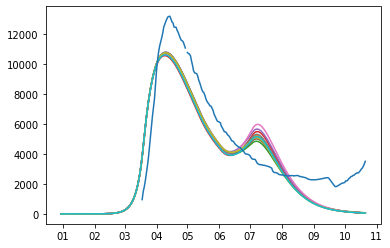

best_error: 9.11879683540926
vector: [9.066407539980094, 9.057242674163485, 8.963992995579812, 9.256388090831843, 9.162878236669837, 9.046446824401102, 9.315705741474998, 9.120113956086499, 9.04059806333587, 9.158194231569034]
[0.50000001 0.5        0.5        0.05       0.5        0.1
 0.75      ]


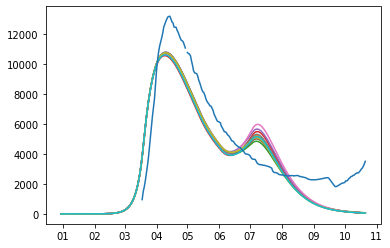

best_error: 7.832929606981712
vector: [7.936752072478022, 8.499312029743649, 6.542454423373961, 6.93362687263116, 8.888723776394354, 7.70031083975025, 7.1331145248747525, 9.300947277947628, 8.20810777854711, 7.185946474076235]
[1.         0.         0.         0.05371543 0.         0.10748894
 0.79236682]


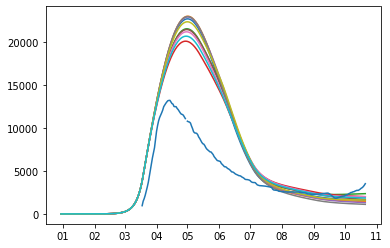

best_error: 7.832929308106076
vector: [7.936751720169218, 8.4993116914629, 6.54245413433404, 6.933626638477067, 8.888723469158144, 7.700310571532975, 7.133114243998802, 9.300947000194524, 8.208107425852358, 7.18594618588072]
[1.00000001 0.         0.         0.05371543 0.         0.10748894
 0.79236682]


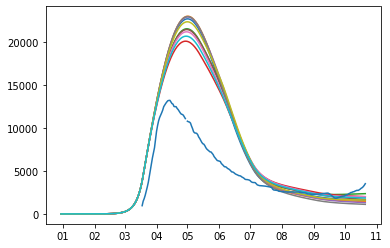

best_error: 7.832929106907583
vector: [7.936751491136247, 8.499311444314646, 6.542453958250955, 6.93362649419714, 8.888723229931546, 7.700310389114284, 7.133114081189012, 9.300946762804767, 8.208107192210697, 7.185946025926551]
[1.00000000e+00 1.00000000e-08 0.00000000e+00 5.37154280e-02
 0.00000000e+00 1.07488943e-01 7.92366821e-01]


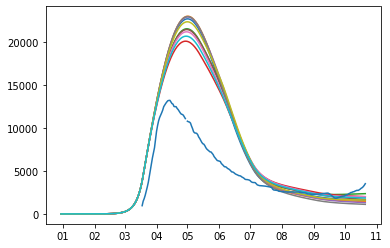

best_error: 7.556705821542868
vector: [7.480321655355658, 7.519604912102722, 7.169677398477319, 7.685229708589198, 7.696308002231307, 7.4743275149107475, 7.64775364900027, 7.724050668290922, 7.547986580514521, 7.621798125956021]
[0.64585594 0.35414406 0.35414406 0.05108383 0.35414406 0.10218461
 0.76235891]


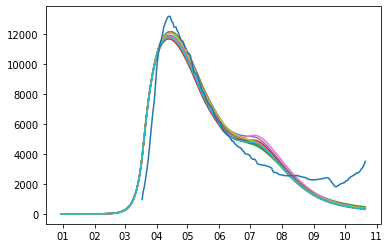

best_error: 7.556705672433789
vector: [7.480321504787868, 7.519604759157113, 7.169677207348554, 7.685229572434269, 7.696307864907543, 7.474327362137668, 7.647753506400122, 7.724050537040251, 7.547986425025036, 7.62179798509948]
[0.64585595 0.35414406 0.35414406 0.05108383 0.35414406 0.10218461
 0.76235891]


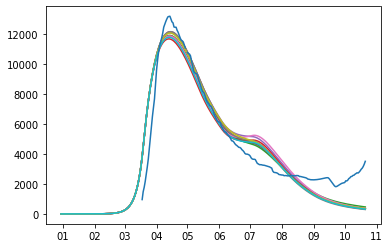

best_error: 6.296292671705738
vector: [6.258722149041348, 6.460723266061944, 5.303252320902351, 6.093702736489786, 6.858258370253887, 6.245179504092576, 6.149208608431652, 7.034700447509346, 6.4003112934532975, 6.158868020821195]
[0.82292797 0.17707203 0.17707203 0.05239963 0.17707203 0.10483678
 0.77736286]


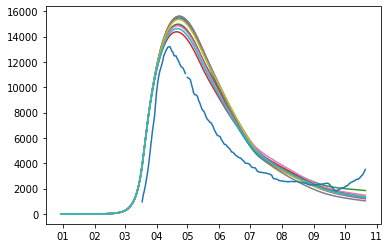

best_error: 6.296292387466109
vector: [6.258721857738477, 6.460722970491736, 5.303252013938193, 6.093702460428323, 6.858258106841521, 6.245179237428538, 6.149208335058809, 7.034700168466379, 6.400310989445127, 6.158867734823995]
[0.82292798 0.17707203 0.17707203 0.05239963 0.17707203 0.10483678
 0.77736286]


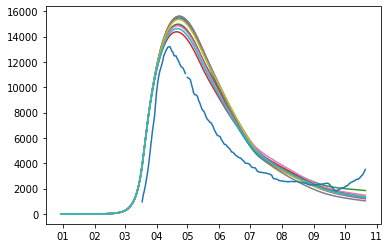

best_error: 6.276674463425364
vector: [6.239296124613468, 6.4636052131223884, 5.263537184935855, 6.0235131489404425, 6.879905349105309, 6.239891549095313, 6.094944378501921, 7.070634883385341, 6.389726286020166, 6.10169051653344]
[0.84209807 0.15790193 0.15790193 0.05278332 0.15790193 0.10565433
 0.7822536 ]


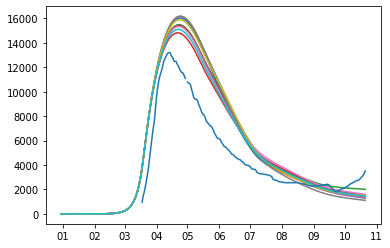

best_error: 6.276674179787497
vector: [6.239295827431097, 6.463604909089588, 5.263536908748349, 6.023512880642565, 6.879905077796808, 6.239891293430777, 6.094944110911356, 7.070634594920707, 6.389725970788911, 6.101690224114813]
[0.84209808 0.15790193 0.15790193 0.05278332 0.15790193 0.10565433
 0.7822536 ]


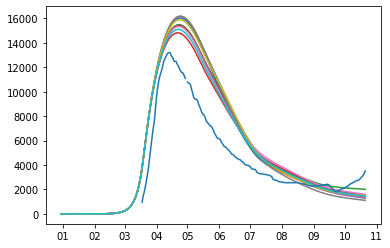

best_error: 6.27667416454701
vector: [6.239295817590809, 6.463604891465051, 5.263536890716144, 6.023512879601618, 6.8799050422018, 6.239891265582662, 6.094944095900761, 7.070634572651594, 6.389725958862462, 6.1016902308971925]
[0.84209807 0.15790194 0.15790193 0.05278332 0.15790193 0.10565433
 0.7822536 ]


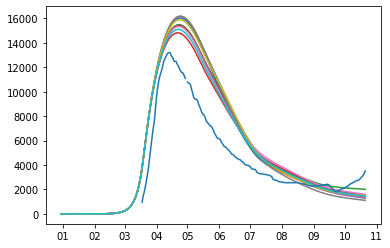

best_error: 4.860576698942642
vector: [4.8201169752832715, 4.926509270367939, 3.9737957516322417, 4.714405869371021, 5.410282156037704, 5.018167779847358, 4.752115178544254, 5.43710186964672, 4.842785723399249, 4.710486415296666]
[0.88983766 0.16876913 0.11016234 0.04630834 0.11016234 0.09194383
 0.70106825]


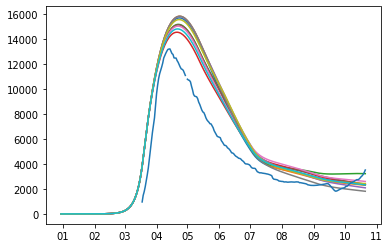

best_error: 4.860576503641851
vector: [4.820116778336484, 4.926509064711118, 3.973795582382292, 4.714405694194463, 5.410281966900053, 5.0181676199151735, 4.752115006387312, 5.437101593466672, 4.842785509386326, 4.7104862207386144]
[0.88983767 0.16876913 0.11016234 0.04630834 0.11016234 0.09194383
 0.70106825]


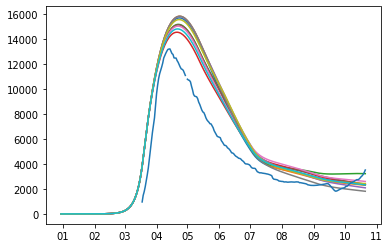

best_error: 4.860576441512911
vector: [4.820116718402916, 4.926509002262081, 3.9737955077639846, 4.714405637269237, 5.410281893527401, 5.018167539735831, 4.752114937654731, 5.437101562619653, 4.84278544721259, 4.71048616868068]
[0.88983766 0.16876914 0.11016234 0.04630834 0.11016234 0.09194383
 0.70106825]


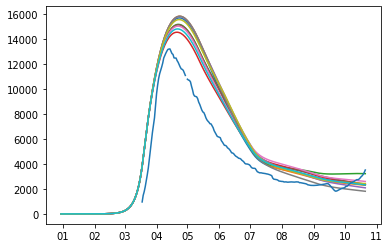

best_error: 4.362039695318275
vector: [4.157648321650603, 4.216502943818789, 5.107224059895675, 4.088567489971146, 4.705995259851084, 4.404202085576862, 4.113413537743536, 4.635965821741948, 4.1317654031092514, 4.059112029823863]
[0.90290644 0.18680553 0.09664919 0.04243889 0.09664919 0.08364183
 0.67640405]


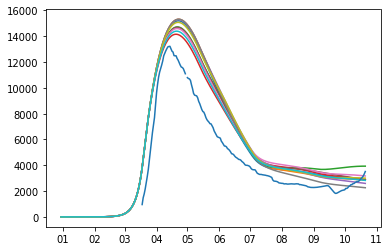

best_error: 4.362039641888575
vector: [4.157648166220476, 4.216502780451315, 5.107224972146707, 4.088567343877438, 4.705995091771886, 4.404201955548352, 4.113413394746617, 4.635965607219985, 4.131765235519826, 4.059111871383151]
[0.90290645 0.18680553 0.09664919 0.04243889 0.09664919 0.08364183
 0.67640405]


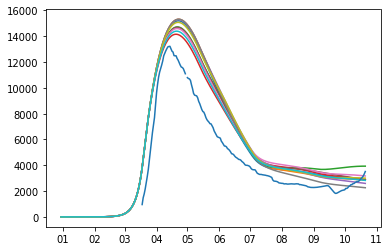

best_error: 4.362039518727539
vector: [4.157648092336103, 4.216502704617556, 5.107224400765436, 4.088567274665312, 4.70599501277387, 4.404201864791949, 4.113413316289392, 4.635965557546094, 4.131765156824446, 4.059111806665246]
[0.90290644 0.18680554 0.09664919 0.04243889 0.09664919 0.08364183
 0.67640405]


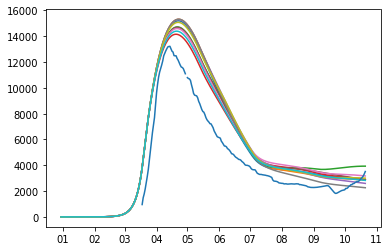

best_error: 2.9644533829794915
vector: [2.857607501110726, 2.7458744001455364, 2.6344599130306623, 3.236439954532975, 3.1384508098178427, 3.084262115403284, 2.933911011918359, 3.243009455275632, 2.6334063418907916, 3.1371123266691043]
[0.82997432 0.36226055 0.15578064 0.0267651  0.1608006  0.05004112
 0.56419854]


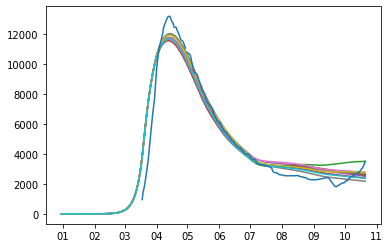

best_error: 2.9644532699884665
vector: [2.8576072745200816, 2.745874182898345, 2.634460838578267, 3.2364397106271365, 3.1384505970525747, 3.0842619159865143, 2.933910818773191, 3.243009183200762, 2.6334061140016796, 3.1371120642461108]
[0.82997433 0.36226055 0.15578064 0.0267651  0.1608006  0.05004112
 0.56419854]


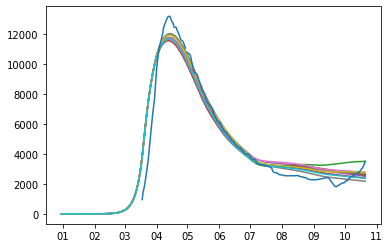

best_error: 2.580553781386692
vector: [2.3285026565052487, 2.207154781123268, 3.972967968600358, 2.608026299915618, 2.544128261082423, 2.559363725364838, 2.2363242544098636, 2.7093769043112057, 2.1029238809154878, 2.536769081638607]
[0.85930997 0.34824916 0.07328627 0.02441921 0.10471129 0.0447327
 0.5367934 ]


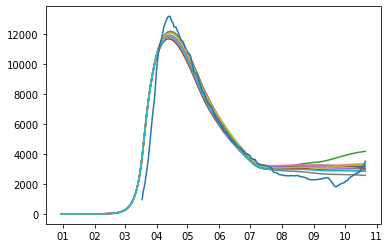

best_error: 2.5805537607195745
vector: [2.3285025842147045, 2.207154688453836, 3.9729681548979014, 2.608026281594442, 2.5441281498495103, 2.559363664997118, 2.236324196259678, 2.7093768082403855, 2.102924020350519, 2.536769058337649]
[0.85930997 0.34824917 0.07328627 0.02441921 0.10471129 0.0447327
 0.5367934 ]


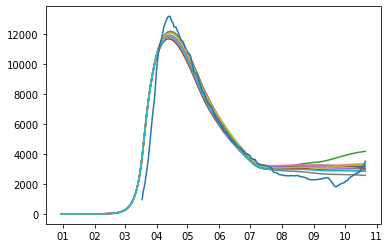

best_error: 2.5312524215772885
vector: [2.133451339447798, 2.1452775940922373, 4.259004992631791, 2.47461720907396, 2.242633247169685, 2.3746387874933124, 2.411881412747478, 2.5266118078152964, 2.3228620500520596, 2.4215457752492675]
[0.86945996 0.36316083 0.0041421  0.02025795 0.06483088 0.03558029
 0.5       ]


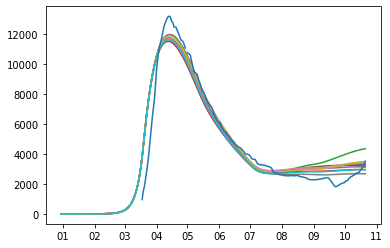

best_error: 2.5312524215204846
vector: [2.1334513394831447, 2.1452775938983546, 4.259004992385268, 2.474617209112628, 2.24263324722067, 2.374638787520408, 2.411881412557625, 2.526611807875686, 2.322862049861879, 2.4215457752891836]
[0.86945996 0.36316083 0.0041421  0.02025796 0.06483088 0.03558029
 0.5       ]


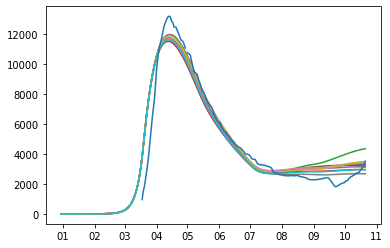

best_error: 2.48272124598362
vector: [2.2092157916943043, 2.0284723792305055, 3.9414575897421518, 2.5632288423060077, 2.3010765239583226, 2.4433927961685615, 2.1455544472755252, 2.624181420469705, 2.0583700162678316, 2.5122626527232823]
[0.86640896 0.36587385 0.         0.01966465 0.04736161 0.03413827
 0.5       ]


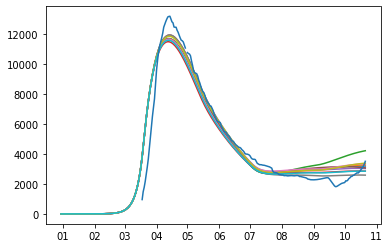

best_error: 2.4827212459539476
vector: [2.209215791725218, 2.028472379273359, 3.941457589516287, 2.563228842342957, 2.301076524003924, 2.4433927961943955, 2.14555444710302, 2.624181420526236, 2.0583700160922693, 2.512262652761804]
[0.86640896 0.36587385 0.         0.01966466 0.04736161 0.03413827
 0.5       ]


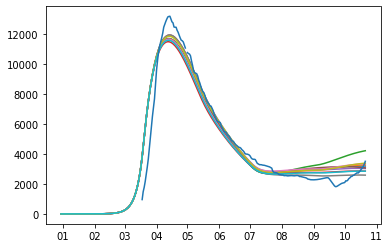

best_error: 2.4827212431604466
vector: [2.209215779619501, 2.0284723676526557, 3.9414576108960597, 2.5632288306552216, 2.301076512174814, 2.443392784202404, 2.145554463473049, 2.6241814089138193, 2.05837003382425, 2.5122626401926906]
[0.86640896 0.36587385 0.         0.01966465 0.04736161 0.03413827
 0.50000001]


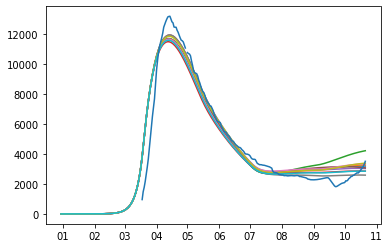

best_error: 2.468206410414018
vector: [2.2546105074363334, 2.1288454177685225, 3.644896438905685, 2.5199512850122856, 2.430271182606297, 2.464358188163928, 2.073413840512303, 2.7186953748785014, 1.9755541113357666, 2.4714677575205544]
[0.86735841 0.34238729 0.         0.02189313 0.01369061 0.0386099
 0.52858279]


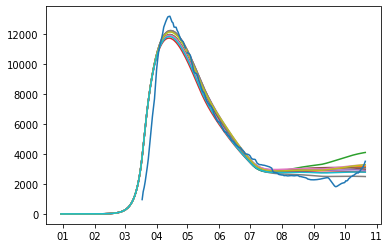

best_error: 2.468206285688182
vector: [2.2546102766316647, 2.1288451697114135, 3.644897439284545, 2.519951027719059, 2.4302709477225566, 2.4643579754127485, 2.0734136052438927, 2.7186950619425154, 1.9755538575836462, 2.471467495629783]
[0.86735842 0.34238729 0.         0.02189313 0.01369061 0.0386099
 0.52858279]


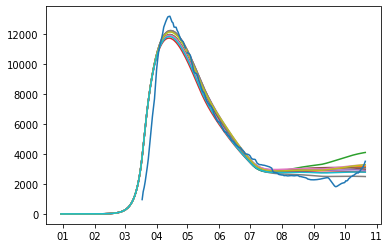

best_error: 2.448152946444035
vector: [2.2025381993944286, 2.064143261313279, 3.812070502351263, 2.5042501294141557, 2.3604932840071435, 2.4222456089860183, 2.040387277740182, 2.6486535282667316, 1.9739626172750424, 2.4527850556921043]
[0.8679133  0.3490265  0.         0.02135118 0.0273648  0.03756609
 0.5235468 ]


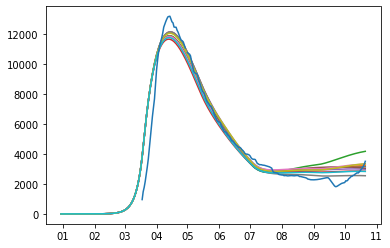

best_error: 2.4481529310337136
vector: [2.202537963294988, 2.0641430189304337, 3.812071517758396, 2.504249866770686, 2.360493050827488, 2.42224539739883, 2.0403870364778833, 2.6486532152289306, 1.9739634534523534, 2.452784790197145]
[0.86791331 0.3490265  0.         0.02135118 0.0273648  0.03756609
 0.5235468 ]


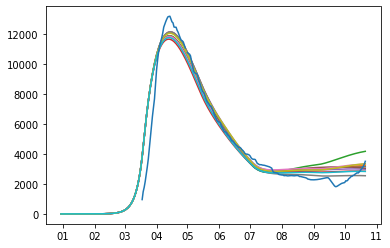

best_error: 2.4479358756386813
vector: [2.192390288024572, 2.055787576761846, 3.843303623652788, 2.489062354069657, 2.3528929697623293, 2.4117085413698147, 2.0583947460793257, 2.638082437690035, 2.0006217757573146, 2.437114443219131]
[0.86825196 0.34817621 0.         0.02149326 0.02741562 0.03786024
 0.52915045]


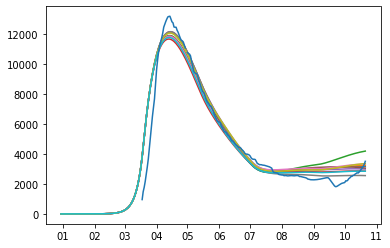

best_error: 2.447935875613994
vector: [2.19239028807992, 2.0557875768310394, 3.84330362339213, 2.4890623541150885, 2.3528929698311196, 2.411708541413856, 2.0583947458736365, 2.6380824377777508, 2.0006217755582894, 2.437114443267111]
[0.86825196 0.34817621 0.         0.02149327 0.02741562 0.03786024
 0.52915045]


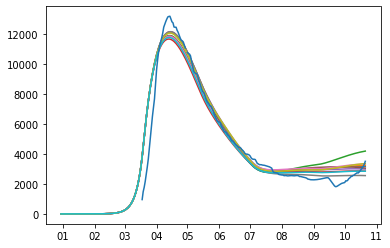

best_error: 2.4479358724840132
vector: [2.1923902746035857, 2.055787563994219, 3.843303647117081, 2.489062341034283, 2.3528929567115604, 2.411708528099747, 2.0583947640703206, 2.6380824248228842, 2.000621795142697, 2.4371144292437528]
[0.86825196 0.34817621 0.         0.02149326 0.02741562 0.03786024
 0.52915046]


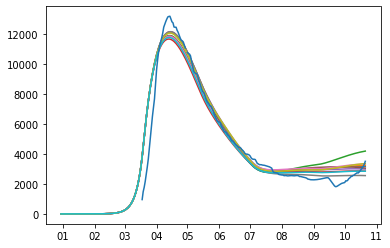

best_error: 2.431832589888097
vector: [2.173262685463758, 2.0402530579388176, 3.8296526822627506, 2.4710453689512346, 2.336121929931839, 2.391000845748547, 2.043066899099199, 2.6271704111906686, 1.9899822924818564, 2.4167697258123]
[0.86754111 0.34774235 0.         0.02165467 0.02070089 0.03807413
 0.55620688]


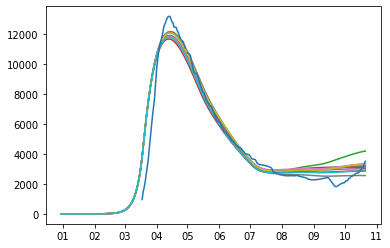

best_error: 2.4318325898641073
vector: [2.1732626855210913, 2.0402530580099727, 3.8296526819983066, 2.471045368997947, 2.336121930004186, 2.3910008457943044, 2.043066898890919, 2.627170411282368, 1.989982292280068, 2.4167697258619154]
[0.86754111 0.34774235 0.         0.02165468 0.02070089 0.03807413
 0.55620688]


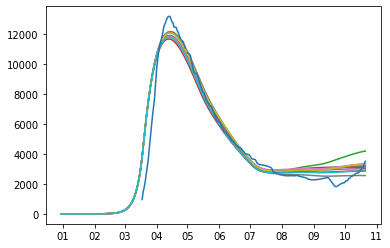

best_error: 2.431832586347733
vector: [2.1732626705153084, 2.040253043714457, 3.829652708355642, 2.471045354434147, 2.336121915362939, 2.391000830962641, 2.043066919095666, 2.627170396761132, 1.9899823140439699, 2.4167697102314247]
[0.86754111 0.34774235 0.         0.02165467 0.02070089 0.03807413
 0.55620689]


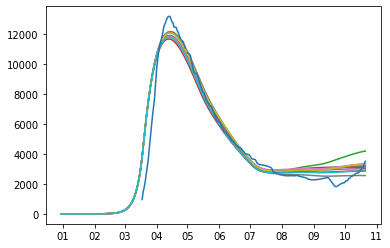

best_error: 2.3766354609818996
vector: [2.0876388699293367, 1.9680138678402028, 3.8358720409770966, 2.3891835283016185, 2.258850421506271, 2.300775067248456, 2.0331020272624496, 2.568924113327834, 1.9984138960615345, 2.3255807773641948]
[0.86534963 0.3464048  0.         0.02215229 0.         0.03873353
 0.63961943]


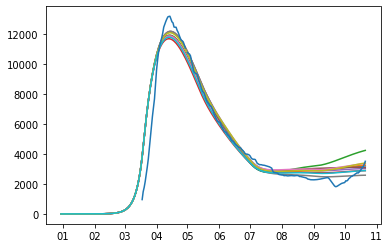

best_error: 2.3766354609595375
vector: [2.0876388699939263, 1.968013867919749, 3.835872040699096, 2.389183528351807, 2.2588504215858523, 2.3007750673015797, 2.0331020270446665, 2.5689241134296354, 1.998413895849703, 2.325580777419361]
[0.86534963 0.3464048  0.         0.0221523  0.         0.03873353
 0.63961943]


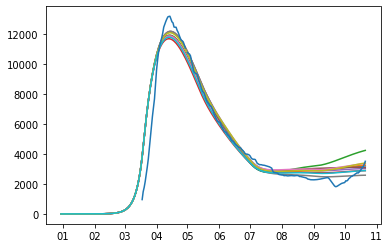

best_error: 2.3766354561343404
vector: [2.087638849523593, 1.9680138484221879, 3.8358720765142973, 2.3891835086511755, 2.2588504015484316, 2.300775046954527, 2.0331020544512683, 2.56892409360122, 1.9984139255114384, 2.3255807561652637]
[0.86534963 0.3464048  0.         0.02215229 0.         0.03873353
 0.63961944]


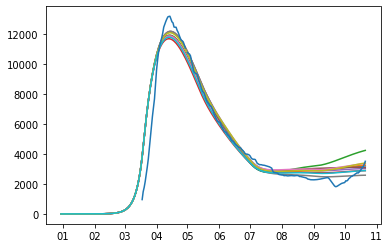

best_error: 2.355275599149147
vector: [2.0405093147133675, 1.9209956761374465, 3.8704628440770805, 2.3574599136537806, 2.2076582721955544, 2.254202791486569, 2.0573218382281646, 2.5283866352356084, 2.026556359969776, 2.28920234579412]
[0.86429449 0.34837602 0.         0.02222727 0.         0.03880668
 0.66769122]


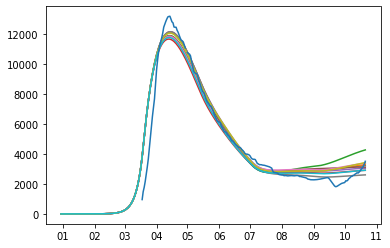

best_error: 2.3552755991261365
vector: [2.040509314778716, 1.9209956762183393, 3.870462843794079, 2.357459913705468, 2.2076582722762272, 2.254202791538864, 2.0573218380055236, 2.5283866353388404, 2.026556359755678, 2.2892023458496293]
[0.86429449 0.34837602 0.         0.02222728 0.         0.03880668
 0.66769122]


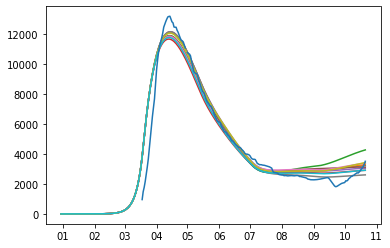

best_error: 2.3552755937496928
vector: [2.040509292031022, 1.920995654582415, 3.8704628834466104, 2.3574598918835976, 2.20765825004597, 2.2542027689245936, 2.057321868367864, 2.528386613319607, 2.0265563926344106, 2.289202322260838]
[0.86429449 0.34837602 0.         0.02222727 0.         0.03880668
 0.66769123]


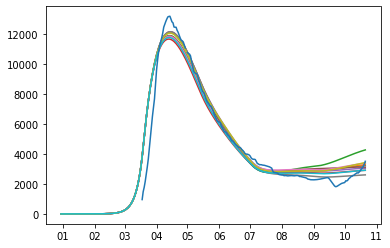

best_error: 2.3079732675513482
vector: [1.9582461009455434, 1.9783624739918801, 4.13283100799894, 2.1692561616098116, 1.9457152969853122, 2.0137670440635143, 2.2493721030776697, 2.3154869430168024, 2.239858955204114, 2.0768365886198987]
[0.86007391 0.35626091 0.         0.02252722 0.         0.03909926
 0.77997838]


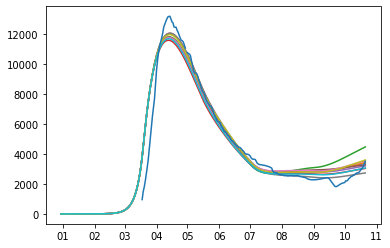

best_error: 2.307973267465476
vector: [1.9582461007220648, 1.978362473761999, 4.132831007689612, 2.169256161669293, 1.945715297071653, 2.013767044114462, 2.249372102840735, 2.3154869431288105, 2.239858954972873, 2.0768365886832605]
[0.86007391 0.35626091 0.         0.02252723 0.         0.03909926
 0.77997838]


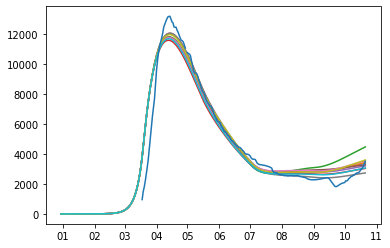

best_error: 2.282530044114447
vector: [1.9170799850219917, 1.9373698574162996, 4.083851266772121, 2.1462693455612647, 1.955170340457347, 1.9999599893163105, 2.2041596482340746, 2.3221500392241463, 2.207099047897331, 2.0521909212435863]
[0.85989375 0.3519601  0.         0.02314665 0.         0.0404013
 0.79024367]


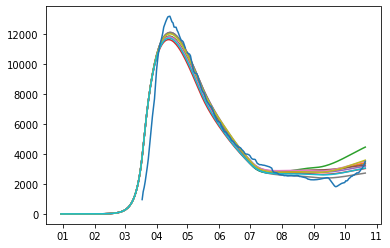

best_error: 2.2825300440267773
vector: [1.9170799847900613, 1.9373698571756681, 4.083851266450344, 2.14626934562481, 1.9551703405498535, 1.9999599893768707, 2.204159647985, 2.322150039346617, 2.207099047656767, 2.0521909213117793]
[0.85989375 0.3519601  0.         0.02314666 0.         0.0404013
 0.79024367]


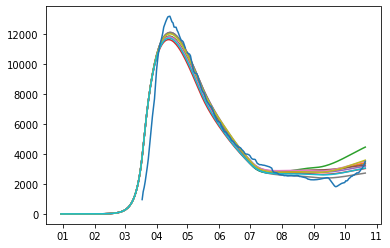

best_error: 2.2091407734835875
vector: [1.8011214873860195, 1.7916343298531738, 3.9246769915643873, 2.0592946349067027, 2.0182938906596086, 1.9887475946346738, 2.0594844685160343, 2.38607296255312, 2.0911879635293498, 1.9708934112328098]
[0.8591731  0.3347569  0.         0.02562436 0.         0.04560945
 0.83130486]


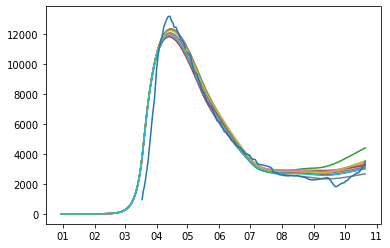

best_error: 2.2091407734334996
vector: [1.8011214875020145, 1.791634329567208, 3.924676991188621, 2.0592946350031234, 2.018293890788465, 1.9887475947336597, 2.059484468237023, 2.3860729627282398, 2.091187963241446, 1.9708934113451977]
[0.8591731  0.3347569  0.         0.02562437 0.         0.04560945
 0.83130486]


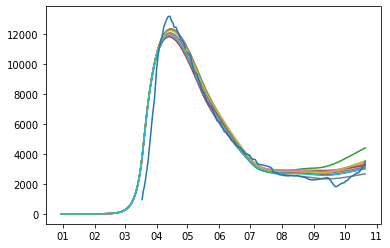

best_error: 2.209140772469691
vector: [1.8011214485015867, 1.7916343776623311, 3.924677057794277, 2.059294597533909, 2.0182938533978327, 1.9887475562962138, 2.059484519019236, 2.3860729250522614, 2.091188018643792, 1.9708933707954726]
[0.8591731  0.3347569  0.         0.02562436 0.         0.04560945
 0.83130487]


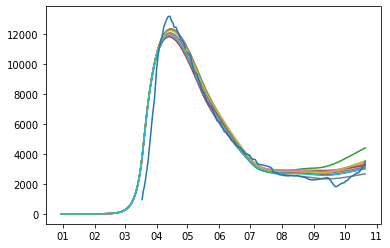

best_error: 2.067542369636647
vector: [1.6872170863160565, 1.7365311496490055, 3.5635725892696173, 1.8737606884899198, 2.00415020892426, 1.8305954612190558, 1.7632147060323657, 2.594257725474038, 1.8444338807807905, 1.7776902002113621]
[0.84807012 0.30484643 0.         0.03252429 0.         0.05950094
 1.        ]


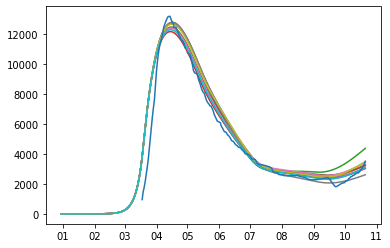

best_error: 2.0675423618570603
vector: [1.6872167498977584, 1.7365307999786683, 3.5635736128780513, 1.8737603002883179, 2.0041498517294203, 1.830595144948182, 1.7632155256114808, 2.5942571600490183, 1.8444346901131565, 1.7776897830765481]
[0.84807013 0.30484643 0.         0.03252429 0.         0.05950094
 1.        ]


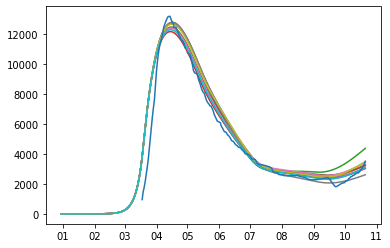

best_error: 2.0675423105037822
vector: [1.6872169345665782, 1.7365309827640099, 3.563572801203621, 1.8737605660397922, 2.004150024582555, 1.830595315961018, 1.7632148477817715, 2.5942575281532636, 1.84443404216468, 1.777690061820533]
[0.84807012 0.30484644 0.         0.03252429 0.         0.05950094
 1.        ]


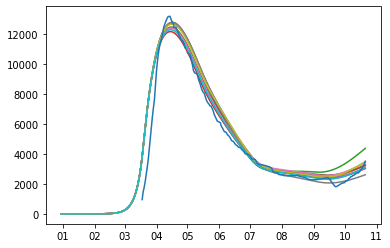

best_error: 1.9953255530766376
vector: [1.570514319320024, 1.6021925230379583, 3.59302161570889, 1.8206460715260016, 1.8462689749127428, 1.7189218008659157, 1.7525952049550717, 2.4794650432992666, 1.8621243930833686, 1.707505584057139]
[0.84538655 0.31956164 0.         0.03099504 0.         0.05616499
 1.        ]


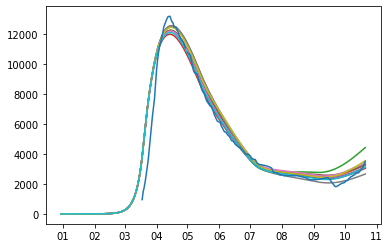

best_error: 1.9953255396020597
vector: [1.570513967213775, 1.6021921621594575, 3.5930226514360353, 1.8206456629977046, 1.8462686130982826, 1.7189214815872322, 1.752596029137297, 2.4794644644864254, 1.8621252158626977, 1.7075051480416914]
[0.84538656 0.31956164 0.         0.03099504 0.         0.05616499
 1.        ]


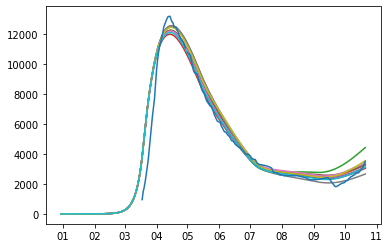

best_error: 1.995325511608753
vector: [1.5705141898134187, 1.6021923772670013, 3.5930218191185674, 1.8206459783389848, 1.846268815450913, 1.7189216770512248, 1.7525953481991907, 2.479464876670491, 1.8621245542713005, 1.7075054799064384]
[0.84538655 0.31956165 0.         0.03099504 0.         0.05616499
 1.        ]


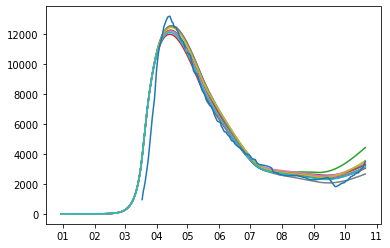

best_error: 1.985538783808316
vector: [1.6272876907024714, 1.5620573775556659, 3.712443345564731, 1.8894327081071511, 1.6091576708814652, 1.5923839263874098, 1.8259127847396706, 2.342838888365252, 1.949379002482445, 1.7444944432969]
[0.84047352 0.35047584 0.         0.02763172 0.         0.04886332
 1.        ]


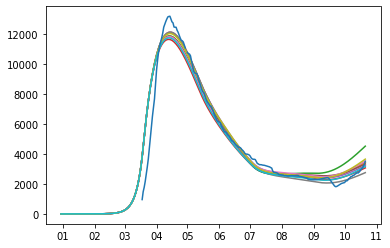

best_error: 1.9855387837203236
vector: [1.6272876903821927, 1.562057377229218, 3.712443345108513, 1.8894327082697209, 1.609157671055835, 1.5923839265106334, 1.8259127843951963, 2.342838888631683, 1.9493790021451356, 1.7444944434751086]
[0.84047352 0.35047584 0.         0.02763173 0.         0.04886332
 1.        ]


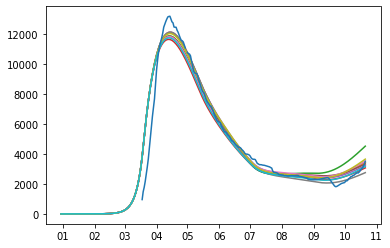

best_error: 1.9798717237376604
vector: [1.643428136965007, 1.657406335660954, 3.167844644295597, 2.0530174772627943, 1.8781978585813928, 1.7861861492816131, 1.4941110251652712, 2.6647718478729443, 1.5259801632963934, 1.9277735989946392]
[0.83774668 0.33744654 0.         0.03019422 0.         0.0540846
 1.        ]


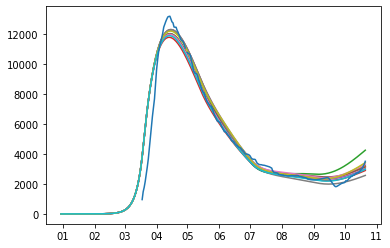

best_error: 1.9798715374616649
vector: [1.6434277380211602, 1.6574059174567588, 3.167845649939119, 2.0530169517064687, 1.878197448163124, 1.7861857854986445, 1.4941106528937045, 2.664771252891568, 1.5259809284737682, 1.9277730495723344]
[0.83774669 0.33744654 0.         0.03019422 0.         0.0540846
 1.        ]


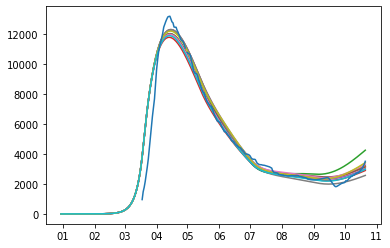

best_error: 1.9544390098630502
vector: [1.5385537955354758, 1.5474962562385126, 3.447105831697206, 1.9165390961996922, 1.7683494828327322, 1.690154137747712, 1.610732890927016, 2.4999406414925662, 1.7413616632766487, 1.7841563026829363]
[8.40447479e-01 3.37460005e-01 3.11543557e-04 2.95765894e-02
 0.00000000e+00 5.29269321e-02 1.00000000e+00]


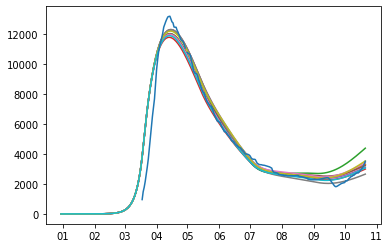

best_error: 1.9544389692572466
vector: [1.5385534184811627, 1.5474958734355528, 3.447106863969728, 1.916538629316039, 1.7683490957743007, 1.6901537933000326, 1.6107336969956094, 2.4999400437980706, 1.7413624759886361, 1.7841558015133316]
[8.40447489e-01 3.37460005e-01 3.11543557e-04 2.95765894e-02
 0.00000000e+00 5.29269321e-02 1.00000000e+00]


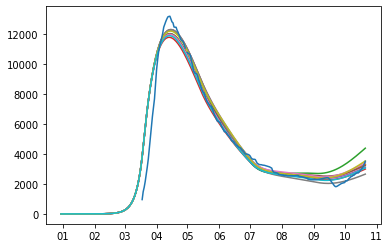

best_error: 1.951324755635087
vector: [1.4963484589818696, 1.4795913487730958, 3.5443016707903965, 1.9296846071074354, 1.6865697807830269, 1.6458559858116062, 1.6892228443085873, 2.434587382248961, 1.817603261173606, 1.7894822163722834]
[8.39713350e-01 3.46020631e-01 4.34328872e-04 2.84772072e-02
 0.00000000e+00 5.05922448e-02 1.00000000e+00]


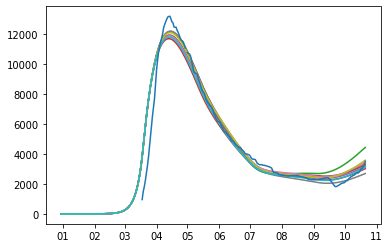

best_error: 1.9513247556033964
vector: [1.4963484586543578, 1.479591348963752, 3.544301670319758, 1.9296846072823703, 1.6865697809783837, 1.6458559859499389, 1.6892228439557284, 2.4345873825353177, 1.8176032608252317, 1.789482216569122]
[8.39713350e-01 3.46020631e-01 4.34328872e-04 2.84772172e-02
 0.00000000e+00 5.05922448e-02 1.00000000e+00]


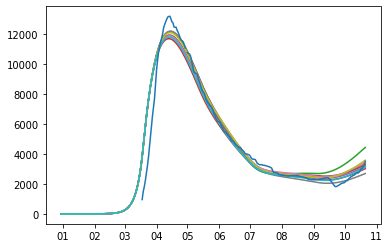

best_error: 1.9513247528199087
vector: [1.496348539639834, 1.4795912896647505, 3.5443017759700077, 1.929684544213927, 1.686569718570344, 1.6458559221791156, 1.6892229230015525, 2.434587319065631, 1.8176033489260357, 1.7894821469678932]
[8.39713350e-01 3.46020631e-01 4.34328872e-04 2.84772072e-02
 0.00000000e+00 5.05922448e-02 1.00000001e+00]


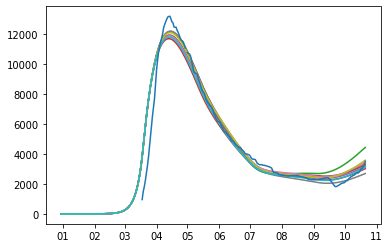

best_error: 1.9507537084669753
vector: [1.5146090718165899, 1.5181507991190029, 3.4864621967122016, 1.9199823543680363, 1.7327051569746061, 1.6695851913450683, 1.640250307896332, 2.4710299594328986, 1.7717477016787506, 1.7830143453262655]
[8.40145739e-01 3.40978567e-01 3.62010397e-04 2.91247247e-02
 0.00000000e+00 5.19673361e-02 1.00000000e+00]


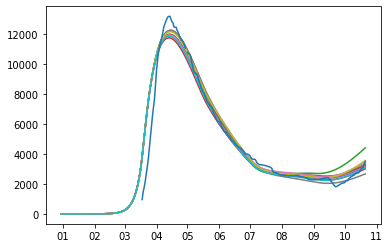

best_error: 1.9507536664250824
vector: [1.5146086900003388, 1.5181504133630257, 3.486463232840703, 1.919981879396228, 1.732704769492018, 1.6695848460648006, 1.640251117703948, 2.471029363635379, 1.771748517191405, 1.7830138345629787]
[8.40145749e-01 3.40978567e-01 3.62010397e-04 2.91247247e-02
 0.00000000e+00 5.19673361e-02 1.00000000e+00]


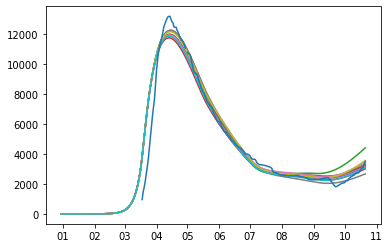

best_error: 1.9496289878301194
vector: [1.5039073878049931, 1.5063431033641057, 3.511764448507254, 1.9124140816950932, 1.7198244381906818, 1.6601952275112257, 1.6599730832074298, 2.4558584796948812, 1.791677037788849, 1.7743325905366802]
[8.40277816e-01 3.41589080e-01 3.09449375e-04 2.90027685e-02
 0.00000000e+00 5.17160118e-02 1.00000000e+00]


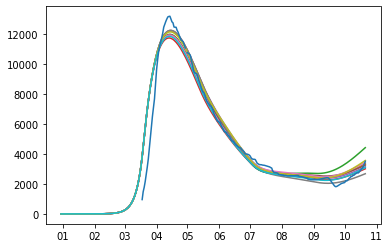

best_error: 1.949628947108792
vector: [1.5039070054146522, 1.506342716377005, 3.5117654870209307, 1.9124136076159184, 1.7198240554131854, 1.6601948819564416, 1.659973895209804, 2.4558578831808537, 1.7916778560579925, 1.774332082841136]
[8.40277826e-01 3.41589080e-01 3.09449375e-04 2.90027685e-02
 0.00000000e+00 5.17160118e-02 1.00000000e+00]


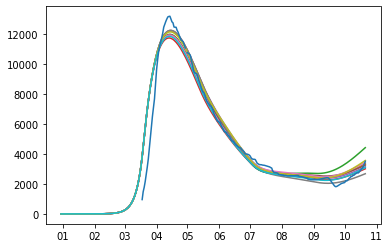

best_error: 1.9487915885648341
vector: [1.4956397282480716, 1.4976912419349442, 3.533139767780676, 1.9038745786258888, 1.7109820502317494, 1.6528429819079289, 1.6766986407039535, 2.4435055956975873, 1.808527489558889, 1.7650138109586522]
[8.40450753e-01 3.41768052e-01 2.92451987e-04 2.89361954e-02
 0.00000000e+00 5.15824838e-02 1.00000000e+00]


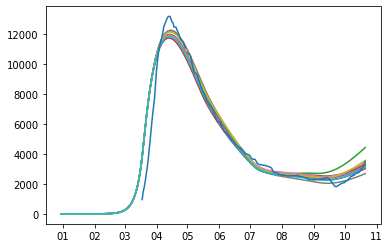

best_error: 1.9487915493595185
vector: [1.4956393456457175, 1.497690857810882, 3.53314080811508, 1.903874107270938, 1.7109816684504144, 1.6528426366344846, 1.6766994541817701, 2.4435050028698853, 1.8085283093891267, 1.7650133032268909]
[8.40450763e-01 3.41768052e-01 2.92451987e-04 2.89361954e-02
 0.00000000e+00 5.15824838e-02 1.00000000e+00]


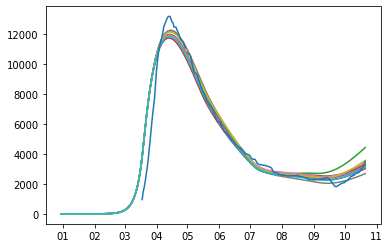

best_error: 1.9485309828284023
vector: [1.4929481760681984, 1.4932428832597604, 3.5442074107295656, 1.8994797929724312, 1.706414778654303, 1.6490412935763668, 1.6853826249346153, 2.4371212508012388, 1.8172560799636168, 1.7602155373239274]
[8.40540187e-01 3.41860607e-01 2.83661820e-04 2.89017672e-02
 0.00000000e+00 5.15134300e-02 1.00000000e+00]


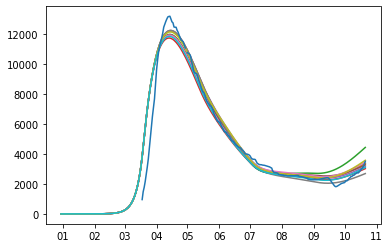

best_error: 1.9485309827997603
vector: [1.4929481757351093, 1.4932428834580866, 3.5442074102497667, 1.8994797931506677, 1.7064147788602555, 1.6490412937253152, 1.6853826245800736, 2.437121251100957, 1.8172560796070925, 1.7602155375302813]
[8.40540187e-01 3.41860607e-01 2.83661820e-04 2.89017772e-02
 0.00000000e+00 5.15134300e-02 1.00000000e+00]


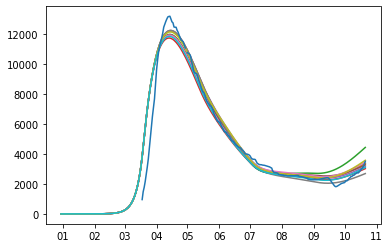

best_error: 1.9485309800352035
vector: [1.492948256466607, 1.4932428243072322, 3.5442075156251605, 1.899479730185711, 1.7064147167788621, 1.649041230147082, 1.685382703457654, 2.4371211878783376, 1.8172561674043306, 1.7602154681010576]
[8.40540187e-01 3.41860607e-01 2.83661820e-04 2.89017672e-02
 0.00000000e+00 5.15134300e-02 1.00000001e+00]


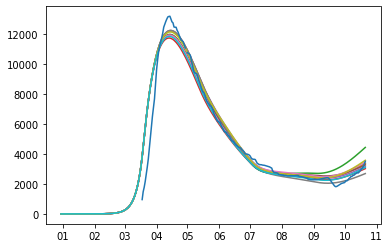

best_error: 1.9484521778422355
vector: [1.4921806185370838, 1.4940940258301108, 3.5420899348821644, 1.9003196335433208, 1.7072859779045082, 1.6497687000994734, 1.6837206018974817, 2.438342654031816, 1.8155860488355078, 1.7611335828608863]
[8.40523082e-01 3.41842905e-01 2.85343004e-04 2.89083518e-02
 0.00000000e+00 5.15266370e-02 1.00000000e+00]


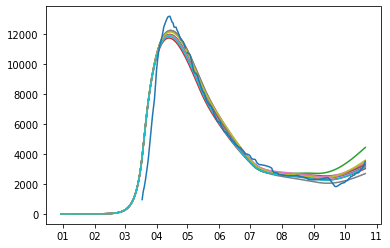

best_error: 1.9484521390339409
vector: [1.4921802360379486, 1.4940936413481065, 3.5420909759784474, 1.9003191627259821, 1.7072855974986916, 1.6497683545047859, 1.683721415992804, 2.438342060707641, 1.8155868693190955, 1.7611330762259083]
[8.40523092e-01 3.41842905e-01 2.85343004e-04 2.89083518e-02
 0.00000000e+00 5.15266370e-02 1.00000000e+00]


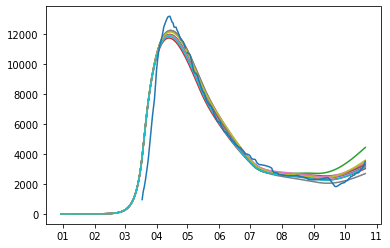

best_error: 1.9484370376810074
vector: [1.4920282319323532, 1.4939379601310492, 3.542493641050611, 1.900148879083729, 1.7071286323424624, 1.649632185184309, 1.684036900984088, 2.4381111769216703, 1.8159043514349311, 1.7609484177448713]
[8.40526640e-01 3.41844680e-01 2.85138065e-04 2.89072752e-02
 0.00000000e+00 5.15245033e-02 1.00000000e+00]


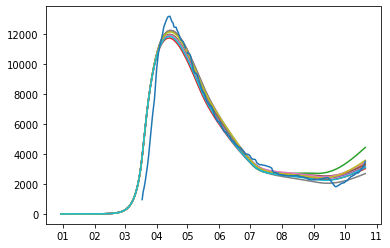

best_error: 1.9484369988699641
vector: [1.4920278494181605, 1.4939375756337658, 3.542494682180343, 1.9001484082489555, 1.7071282519213167, 1.6496318395758642, 1.6840377151067205, 2.4381105835758508, 1.8159051719470172, 1.7609479110916497]
[8.40526650e-01 3.41844680e-01 2.85138065e-04 2.89072752e-02
 0.00000000e+00 5.15245033e-02 1.00000000e+00]


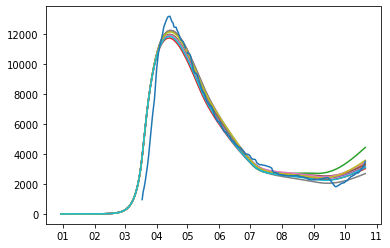

best_error: 1.948428368321191
vector: [1.4919409768682885, 1.4938485984687913, 3.542724797858402, 1.9000511067557613, 1.7070385378502666, 1.6495540180315689, 1.684218009810524, 2.4379786357287134, 1.8160866077096132, 1.7608423941299796]
[8.40528678e-01 3.41845696e-01 2.85020723e-04 2.89066588e-02
 0.00000000e+00 5.15232817e-02 1.00000000e+00]


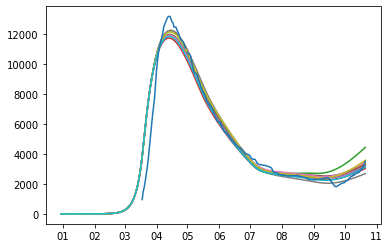

best_error: 1.948428329508586
vector: [1.4919405943454667, 1.4938482139627514, 3.542725839007294, 1.900050635911044, 1.707038157420337, 1.649553672415267, 1.684218823948808, 2.437978042370529, 1.8160874282380157, 1.7608418874663463]
[8.40528688e-01 3.41845696e-01 2.85020723e-04 2.89066588e-02
 0.00000000e+00 5.15232817e-02 1.00000000e+00]


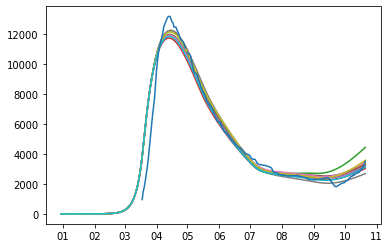

best_error: 1.9484249600575452
vector: [1.4919066740056632, 1.493813467435452, 3.5428156730038953, 1.9000126692051782, 1.7070031187185126, 1.6495232879164115, 1.6842892095226425, 2.437926529447737, 1.8161582585729947, 1.7608007127469687]
[8.40529479e-01 3.41846096e-01 2.84974593e-04 2.89064165e-02
 0.00000000e+00 5.15228014e-02 1.00000000e+00]


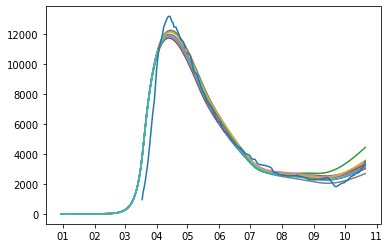

best_error: 1.9484249212443152
vector: [1.491906291479443, 1.4938130829259395, 3.5428167141603213, 1.9000121983565286, 1.7070027382851332, 1.6495229422970017, 1.684290023667067, 2.4379259360846746, 1.816159079107802, 1.7608002060792414]
[8.40529489e-01 3.41846096e-01 2.84974593e-04 2.89064165e-02
 0.00000000e+00 5.15228014e-02 1.00000000e+00]


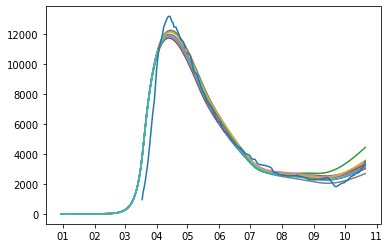

best_error: 1.9484246810681642
vector: [1.4919038660881605, 1.4938105917237423, 3.5428231117350437, 1.9000095228470792, 1.7070002194237288, 1.6495207724550116, 1.6842950376924575, 2.437922264190398, 1.8161641236692074, 1.7607973008568127]
[8.40529544e-01 3.41846128e-01 2.84970823e-04 2.89063966e-02
 0.00000000e+00 5.15227621e-02 1.00000000e+00]


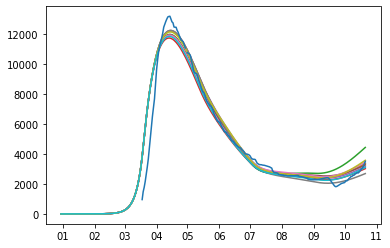

best_error: 1.9484246422548934
vector: [1.4919034835616833, 1.49381020721396, 3.54282415289213, 1.9000090519981405, 1.7069998389900536, 1.6495204268353414, 1.684295851837389, 2.4379216708269267, 1.8161649442045742, 1.7607967941887375]
[8.40529554e-01 3.41846128e-01 2.84970823e-04 2.89063966e-02
 0.00000000e+00 5.15227621e-02 1.00000000e+00]


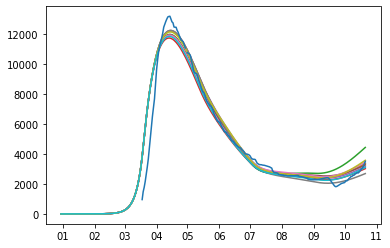

best_error: 1.948424615794925
vector: [1.4919032091391635, 1.493809918913405, 3.542824852123214, 1.9000087867155082, 1.7069995410958538, 1.6495201839299454, 1.684296401268839, 2.437921266277779, 1.8161654958849942, 1.7607965026005499]
[8.40529559e-01 3.41846136e-01 2.84969940e-04 2.89063920e-02
 0.00000000e+00 5.15227529e-02 1.00000000e+00]


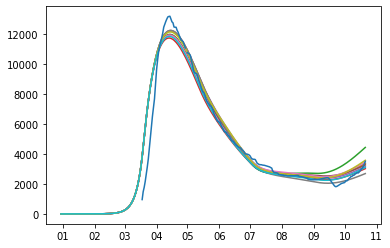

best_error: 1.9484245769816444
vector: [1.491902826612624, 1.493809534403568, 3.5428258932804253, 1.9000083158664736, 1.7069991606621406, 1.6495198383102243, 1.6842972154138947, 2.43792067291424, 1.8161663164204638, 1.76079599593239]
[8.40529569e-01 3.41846136e-01 2.84969940e-04 2.89063920e-02
 0.00000000e+00 5.15227529e-02 1.00000000e+00]


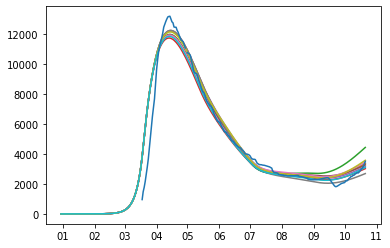

best_error: 1.9484245746762674
vector: [1.4919027952962982, 1.4938094950787637, 3.542825948475126, 1.9000083229917801, 1.7069991137853886, 1.649519813190504, 1.6842972602493627, 2.437920637645948, 1.8161663603078908, 1.7607959997416098]
[8.40529569e-01 3.41846141e-01 2.84969385e-04 2.89063891e-02
 0.00000000e+00 5.15227471e-02 1.00000000e+00]


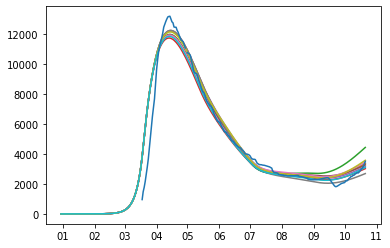

best_error: 1.9484245668899676
vector: [1.4919026993885347, 1.4938093824475778, 3.5428261505330245, 1.9000082979665727, 1.706998986413534, 1.6495197334868987, 1.6842974220102807, 2.4379205125533483, 1.8161665197946018, 1.7607959643053008]
[8.40529569e-01 3.41846151e-01 2.84969385e-04 2.89063891e-02
 0.00000000e+00 5.15227471e-02 1.00000000e+00]


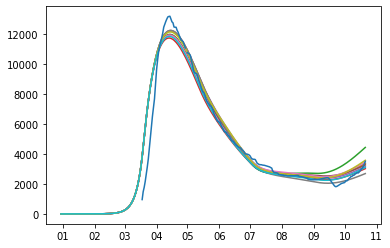

best_error: 1.948424557437141
vector: [1.4919027312153594, 1.4938094361361582, 3.5428260533545566, 1.900008260215165, 1.706999051920436, 1.6495197497715335, 1.684297338759937, 2.4379205747340196, 1.8161664477342292, 1.7607959305300156]
[8.40529569e-01 3.41846141e-01 2.84969385e-04 2.89063891e-02
 0.00000000e+00 5.15227471e-02 1.00000001e+00]


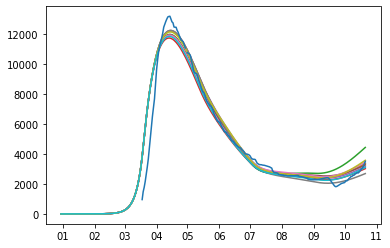

best_error: 1.948424557397616
vector: [1.4919026818654695, 1.493809345039542, 3.5428260367949793, 1.9000084373850532, 1.706998921053911, 1.6495197229796605, 1.6842973354358457, 2.4379205587122295, 1.8161664353101292, 1.7607960993993392]
[8.40529564e-01 3.41846166e-01 2.84969409e-04 2.89063865e-02
 0.00000000e+00 5.15227414e-02 1.00000001e+00]


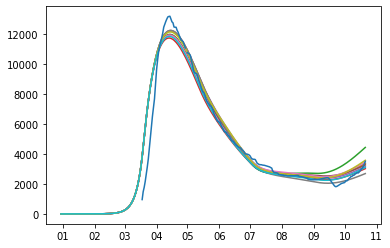

In [36]:
from scipy.optimize import minimize, Bounds, shgo, differential_evolution

bounds = Bounds(lb,ub)

result = minimize(error_grad, grad_0, bounds = bounds)